# MSSDS 434 FX_RL Learning Project

### Project overview
#### The application will follow this trajectory:
- User uses front end (VueJS or React) to select trading pair and set certain model criteria.
- Front end tells flask backend what the model parameters will be based on user selection.
- Flask backend triggers a callout to a Financial Data API (Quandl, IEX, IBKR, Yahoo, Google)
- Data is loaded into your classes to train a model based on the user inputs in step 1.
- The model trains on each hour up to the penultimate hour (h - 1), when it is then tested on on the last hour of data. 
- Results are fed back into Flask and through to the front end to display results.
- The user is given the option of productionalizing the model with the connected trading account using the current incoming data from whichever real-time financial data api has been chosen.
- The results of the productionalized model are published in real time.

#### Things that must be configurable via REST API
- Currency Pair
- Which side of the currency pair (right,left)
- Amount of hist data to train on: (1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max)
   - Window Size must infer this same value
- Price prediction in time interval window
- Return buy or sell command



### Imports

In [1]:
import gym
import gym_anytrading
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
#set alphavantage api-key
os.environ['ALPHAVANTAGE_API_KEY'] = '95O0QW8Y4UM8U9WA'
os.environ['WINDOW_SIZE'] = "15"
os.environ['HISTORICAL_PERIOD'] = "7d"
os.environ['HISTORICAL_INTERVAL'] = "1m"

In [3]:
curr_pairs = {
"EUR/USD":"EURUSD=X",
"USD/JPY":"JPY=X",
"GBP/USD":"GBPUSD=X",
"AUD/USD":"AUDUSD=X",
"NZD/USD":"NZDUSD=X",
"EUR/JPY":"EURJPY=X",
"GBP/JPY":"GBPJPY=X",
"EUR/GBP":"EURGBP=X",
"EUR/CAD":"EURCAD=X",
"EUR/SEK":"EURSEK=X",
"EUR/CHF":"EURCHF=X",
"EUR/HUF":"EURHUF=X",
"EUR/JPY":"EURJPY=X",
"USD/CNY":"CNY=X",
"USD/HKD":"HKD=X",
"USD/SGD":"SGD=X",
"USD/INR":"INR=X",
"USD/MXN":"MXN=X",
"USD/PHP":"PHP=X",
"USD/IDR":"IDR=X",
"USD/THB":"THB=X",
"USD/MYR":"MYR=X",
"USD/ZAR":"ZAR=X",
"USD/RUB":"RUB=X"
}

curr_list = list()
for key in curr_pairs:
    curr_list.append(key)
    

In [8]:
curr = yf.Ticker("EURUSD=X")
df = curr.history(period="10m", interval="1m")
df

Open    High     Low   Close  Volume  Dividends  \
Datetime                                                                       
2020-05-04 03:57:00+01:00  1.0951  1.0951  1.0951  1.0951       0          0   
2020-05-04 03:58:00+01:00  1.0948  1.0948  1.0948  1.0948       0          0   
2020-05-04 03:59:00+01:00  1.0947  1.0947  1.0947  1.0947       0          0   
2020-05-04 04:00:00+01:00  1.0947  1.0947  1.0947  1.0947       0          0   
2020-05-04 04:01:00+01:00  1.0948  1.0948  1.0948  1.0948       0          0   
2020-05-04 04:02:00+01:00  1.0948  1.0948  1.0948  1.0948       0          0   
2020-05-04 04:03:00+01:00  1.0948  1.0948  1.0948  1.0948       0          0   
2020-05-04 04:05:08+01:00  1.0948  1.0948  1.0948  1.0948       0          0   

                           Stock Splits  
Datetime                                 
2020-05-04 03:57:00+01:00             0  
2020-05-04 03:58:00+01:00             0  
2020-05-04 03:59:00+01:00             0  
2020-05-04 04:00:00+01:00             0  
2020-05-04 04:01:00+01:00             0  
2020-05-04 04:02:00+01:00             0  
2020-05-04 04:03:00+01:00             0  
2020-05-04 04:05:08+01:00             0

In [4]:
# yfinance:
curr = yf.Ticker("EURUSD=X")
# This will be a configurable call in custom function
df = curr.history(period="7d", interval="1m")
df = df[["Open","High","Low","Close"]]
df.index.rename('Time', inplace=True)
df.reset_index(inplace=True)
df['Time'] = df['Time'].dt.tz_localize(None)
df.set_index('Time', inplace=True)
# print("df.shape", df.shape)
# print("\nhead")
# print(df.head(10))
# print("\ntail")
# print(df.tail(10))
# print("\ndf start Time: {}".format(str(min(df.index))))
# print("\ndf end Time: {}".format(str(max(df.index))))

In [5]:
start_window = 1
end_window = 1000
results_dict = dict()

x = 1
env = gym.make('forex-v0',
                 df = df,
                 window_size = x,
                 frame_bound = (x, df.shape[0]),
                 unit_side = 'right'
        )

#     print("custom env information:")
#     print("> shape:", custom_env.shape)
#     print("> df.shape:", custom_env.df.shape)
#     print("> prices.shape:", custom_env.prices.shape)
#     print("> signal_features.shape:", custom_env.signal_features.shape)
#     print("> max_possible_profit:", custom_env.max_possible_profit())

results_dict[x] = env.max_possible_profit()
results_dict

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


{1: 0.928882280609772}

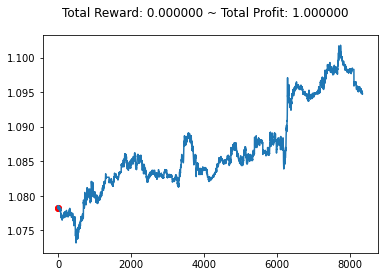

{'total_reward': -0.9999999999998899, 'total_profit': 0.999629045720115, 'position': 1}


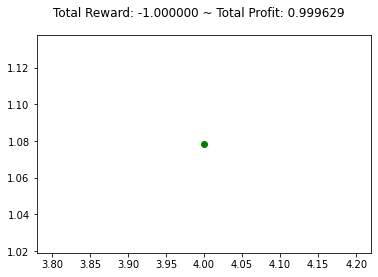

{'total_reward': 1.9999999999997797, 'total_profit': 0.999629045720115, 'position': 0}


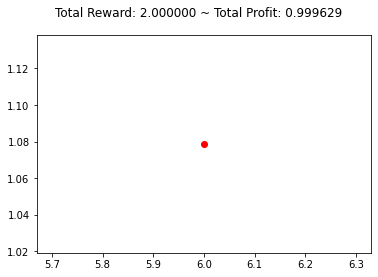

{'total_reward': 1.9999999999997797, 'total_profit': 0.999629045720115, 'position': 0}


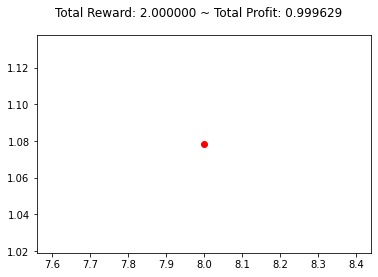

{'total_reward': 5.999999999999339, 'total_profit': 0.9997217584863662, 'position': 1}


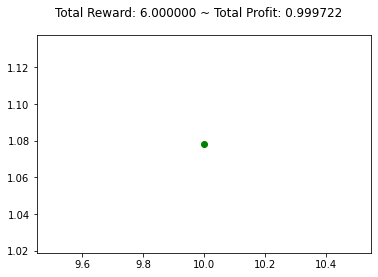

{'total_reward': 5.999999999999339, 'total_profit': 0.9994435943910722, 'position': 1}


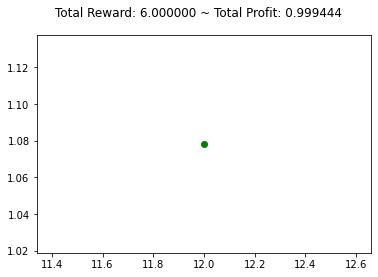

{'total_reward': 5.999999999999339, 'total_profit': 0.9991655076925773, 'position': 1}


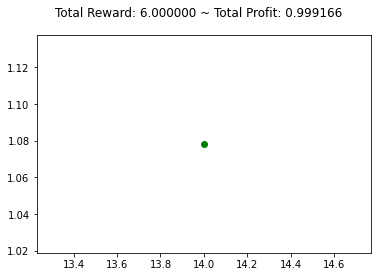

{'total_reward': 5.999999999999339, 'total_profit': 0.9991655076925773, 'position': 0}


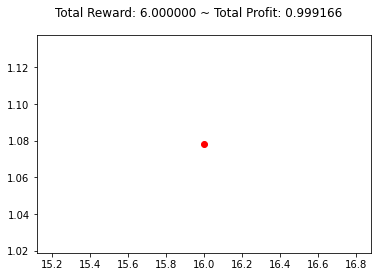

{'total_reward': 4.999999999999449, 'total_profit': 0.9988874983693462, 'position': 0}


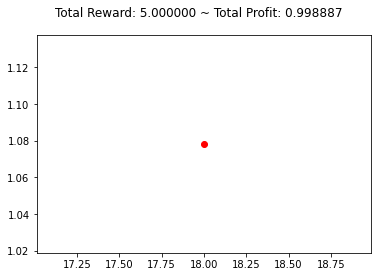

{'total_reward': 6.999999999999229, 'total_profit': 0.9986095406200551, 'position': 0}


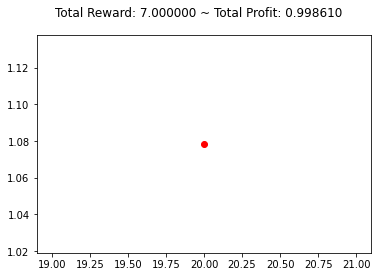

{'total_reward': 7.999999999999119, 'total_profit': 0.998424304199981, 'position': 1}


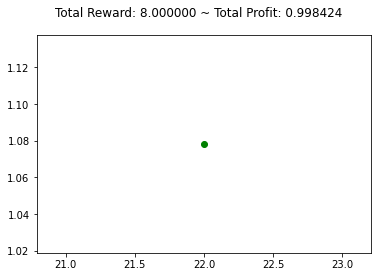

{'total_reward': 7.999999999999119, 'total_profit': 0.998424304199981, 'position': 0}


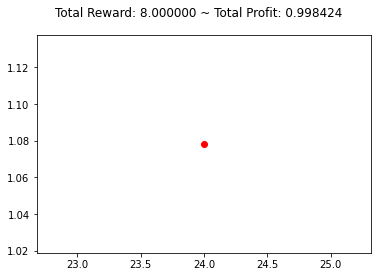

{'total_reward': 7.999999999999119, 'total_profit': 0.998424304199981, 'position': 0}


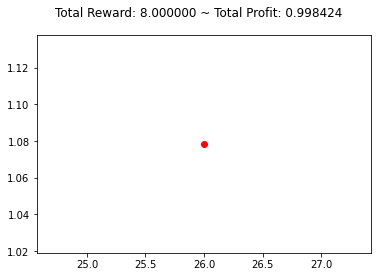

{'total_reward': 7.999999999999119, 'total_profit': 0.9981465011103315, 'position': 0}


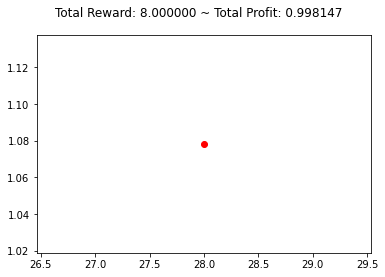

{'total_reward': 7.999999999999119, 'total_profit': 0.9978687753170344, 'position': 0}


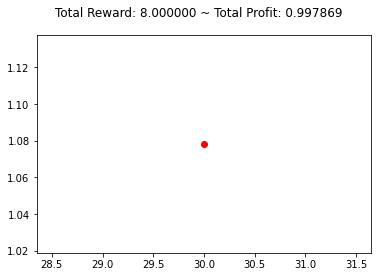

{'total_reward': 7.999999999999119, 'total_profit': 0.9978687753170344, 'position': 0}


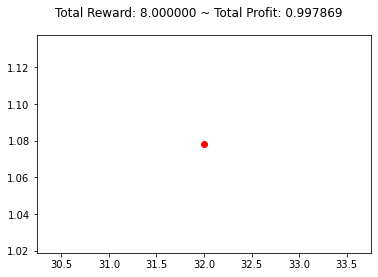

{'total_reward': 8.999999999999009, 'total_profit': 0.997683659135731, 'position': 0}


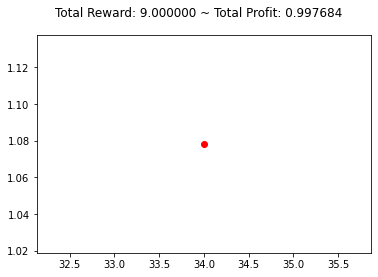

{'total_reward': 7.999999999999119, 'total_profit': 0.9973135297871367, 'position': 1}


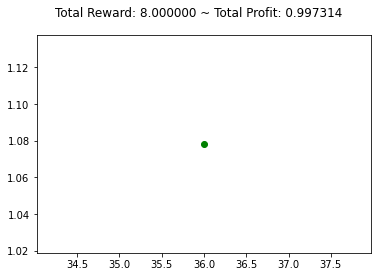

{'total_reward': 6.999999999999229, 'total_profit': 0.9973135297871367, 'position': 0}


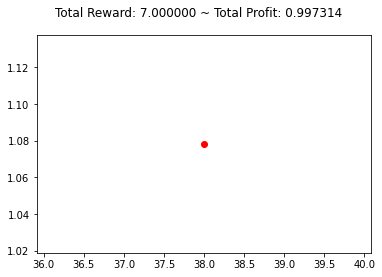

{'total_reward': 9.999999999998899, 'total_profit': 0.9973135297871368, 'position': 1}


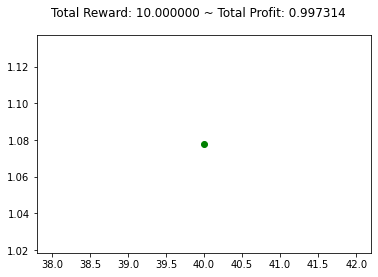

{'total_reward': 9.999999999998899, 'total_profit': 0.9973135297871368, 'position': 1}


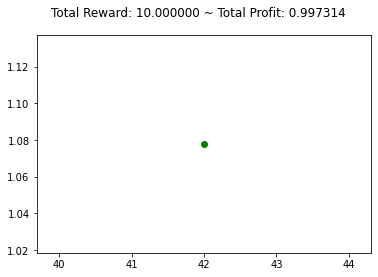

{'total_reward': 9.999999999998899, 'total_profit': 0.9973135297871368, 'position': 1}


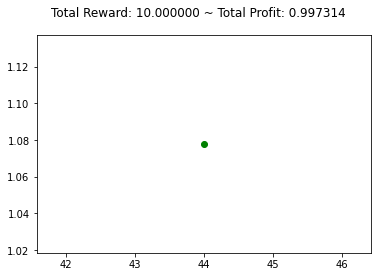

{'total_reward': 12.999999999998568, 'total_profit': 0.9973135297871368, 'position': 0}


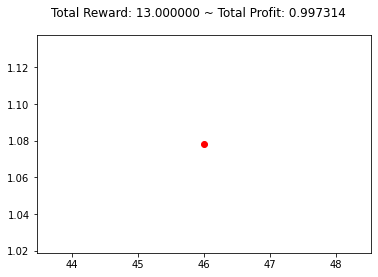

{'total_reward': 10.999999999998789, 'total_profit': 0.9968510826343097, 'position': 1}


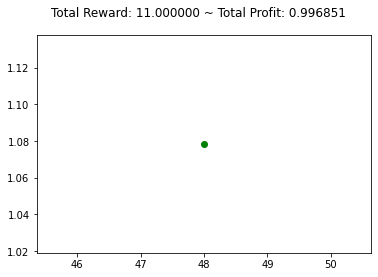

{'total_reward': 6.999999999999229, 'total_profit': 0.9968510826343097, 'position': 0}


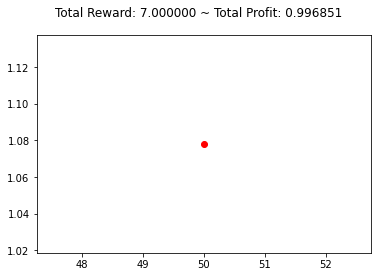

{'total_reward': 6.999999999999229, 'total_profit': 0.9965736400841748, 'position': 1}


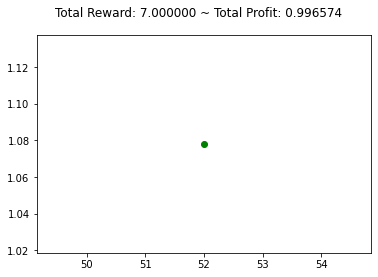

{'total_reward': 5.999999999999339, 'total_profit': 0.9965736400841748, 'position': 0}


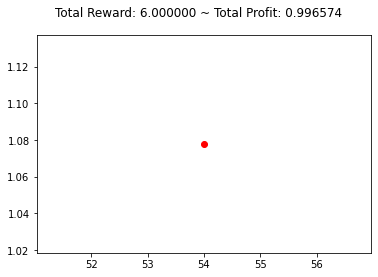

{'total_reward': 5.999999999999339, 'total_profit': 0.9962962490171631, 'position': 0}


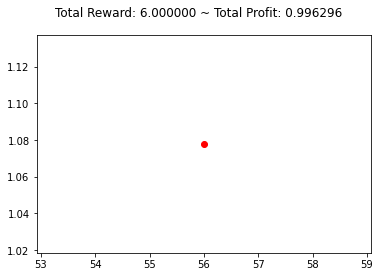

{'total_reward': 3.9999999999995595, 'total_profit': 0.9959265315112658, 'position': 0}


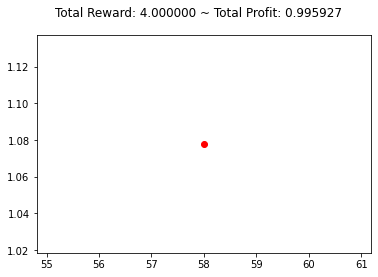

{'total_reward': 3.9999999999995595, 'total_profit': 0.9959265315112658, 'position': 0}


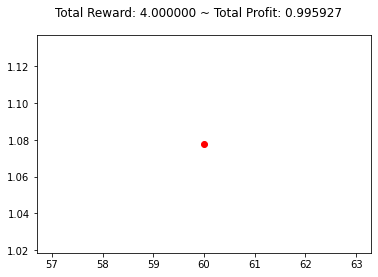

{'total_reward': 4.999999999999449, 'total_profit': 0.995649320563545, 'position': 0}


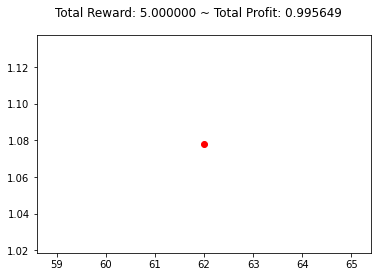

{'total_reward': 1.9999999999997797, 'total_profit': 0.9950952586155409, 'position': 1}


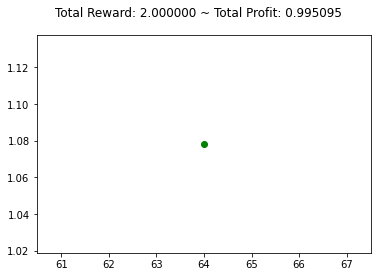

{'total_reward': 1.9999999999997797, 'total_profit': 0.9950952586155409, 'position': 1}


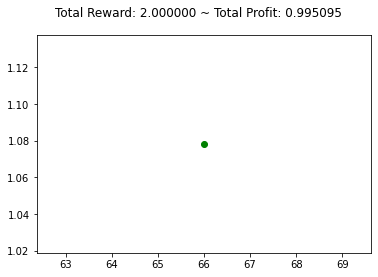

{'total_reward': 1.9999999999997797, 'total_profit': 0.9950952586155409, 'position': 1}


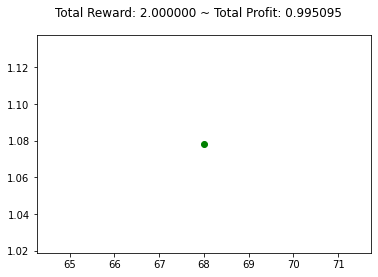

{'total_reward': 1.9999999999997797, 'total_profit': 0.9950952586155409, 'position': 1}


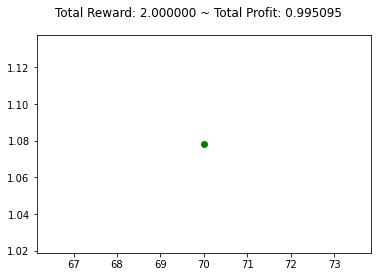

{'total_reward': -0.9999999999998899, 'total_profit': 0.9950952586155409, 'position': 0}


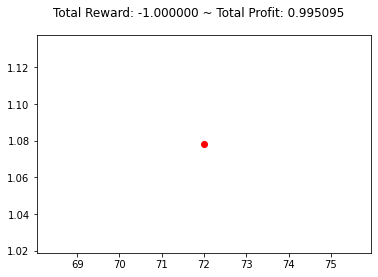

{'total_reward': -0.9999999999998899, 'total_profit': 0.9948183047445096, 'position': 1}


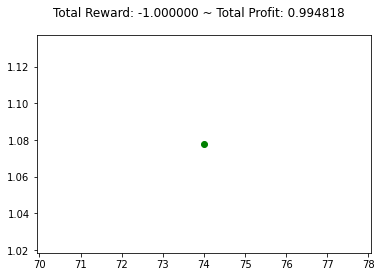

{'total_reward': 2.220446049250313e-12, 'total_profit': 0.9947259867874995, 'position': 1}


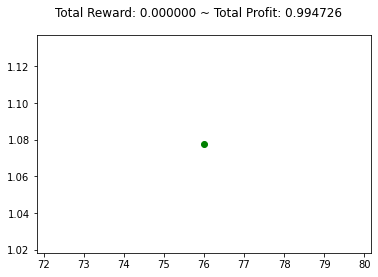

{'total_reward': -3.999999999997339, 'total_profit': 0.9947259867874995, 'position': 0}


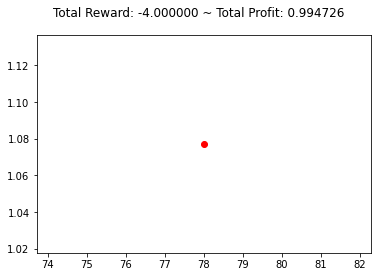

{'total_reward': -2.999999999997449, 'total_profit': 0.9945412823056895, 'position': 1}


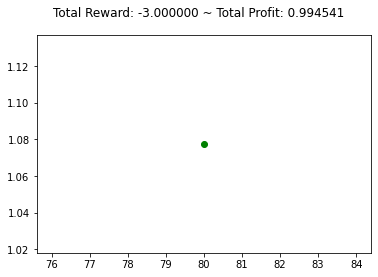

{'total_reward': -1.9999999999975593, 'total_profit': 0.9945412823056895, 'position': 0}


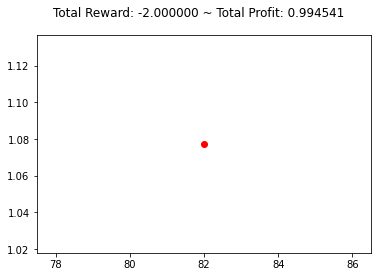

{'total_reward': -1.9999999999975593, 'total_profit': 0.9945412823056895, 'position': 0}


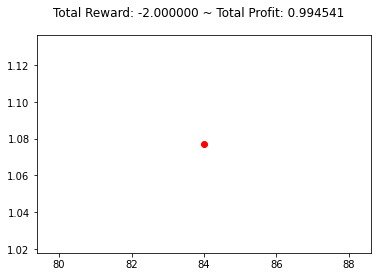

{'total_reward': 1.0000000000021103, 'total_profit': 0.9945412823056896, 'position': 1}


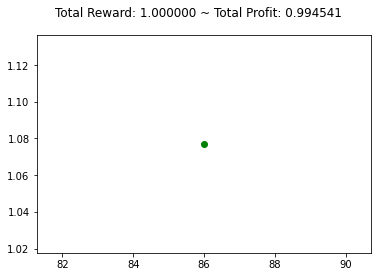

{'total_reward': 3.00000000000189, 'total_profit': 0.9945412823056896, 'position': 0}


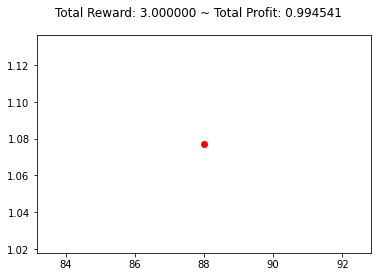

{'total_reward': 3.00000000000189, 'total_profit': 0.9945412823056896, 'position': 0}


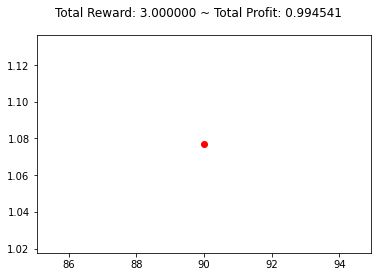

{'total_reward': 6.00000000000156, 'total_profit': 0.9945412823056895, 'position': 1}


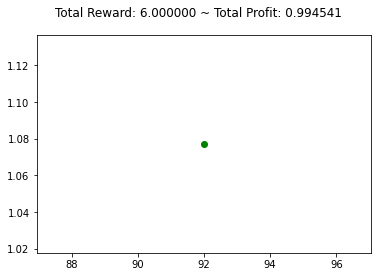

{'total_reward': 8.00000000000134, 'total_profit': 0.9945412823056895, 'position': 0}


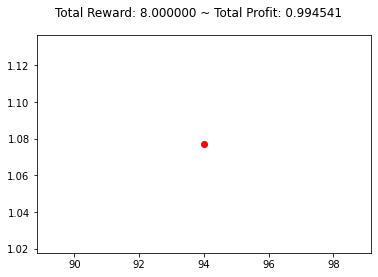

{'total_reward': 8.00000000000134, 'total_profit': 0.9945412823056895, 'position': 0}


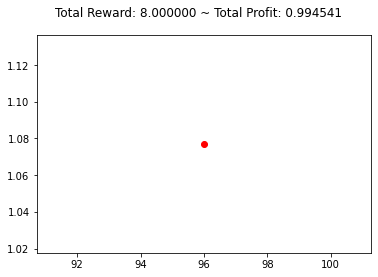

{'total_reward': 10.000000000001119, 'total_profit': 0.994448921488239, 'position': 1}


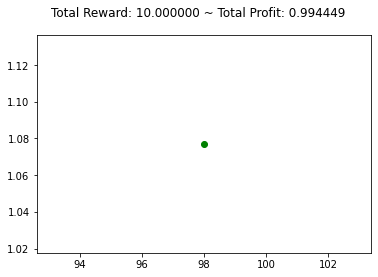

{'total_reward': 10.000000000001119, 'total_profit': 0.9940795811274263, 'position': 1}


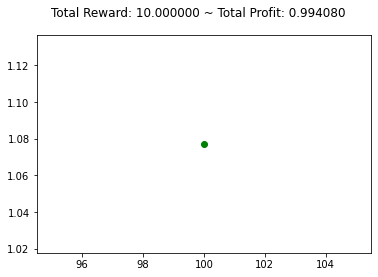

{'total_reward': 11.000000000001009, 'total_profit': 0.9940795811274263, 'position': 0}


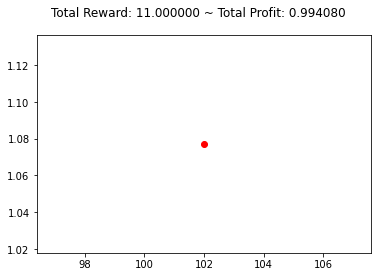

{'total_reward': 11.000000000001009, 'total_profit': 0.9940795811274263, 'position': 0}


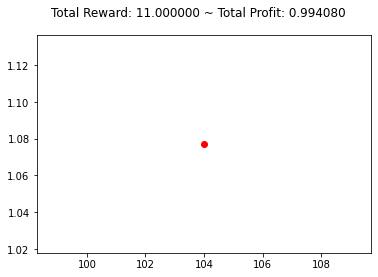

{'total_reward': 11.000000000001009, 'total_profit': 0.9940795811274263, 'position': 0}


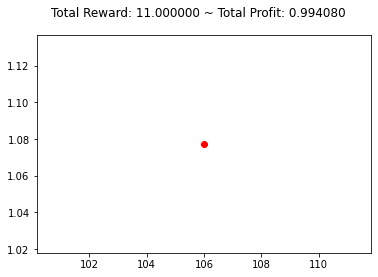

{'total_reward': 10.000000000001119, 'total_profit': 0.9937104464890575, 'position': 1}


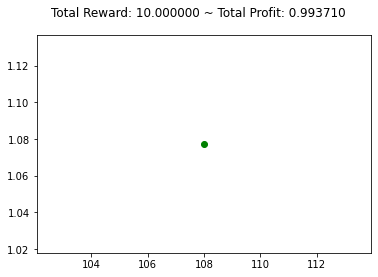

{'total_reward': 8.00000000000134, 'total_profit': 0.9934336469217904, 'position': 1}


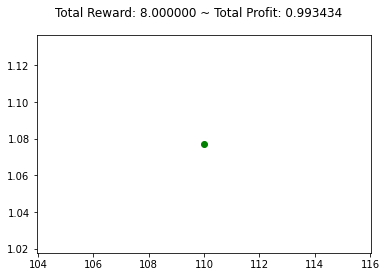

{'total_reward': 8.00000000000134, 'total_profit': 0.9934336469217904, 'position': 0}


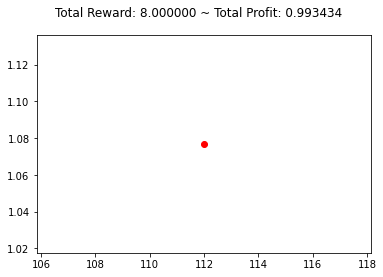

{'total_reward': 8.00000000000134, 'total_profit': 0.9934336469217904, 'position': 0}


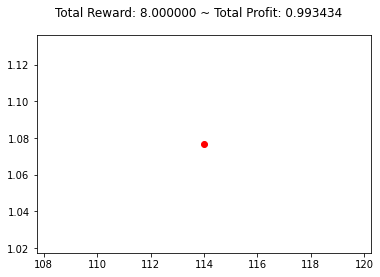

{'total_reward': 8.00000000000134, 'total_profit': 0.9931569244574668, 'position': 1}


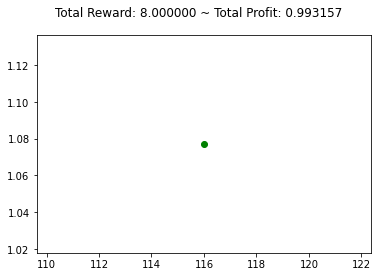

{'total_reward': 7.0000000000014495, 'total_profit': 0.9931569244574668, 'position': 0}


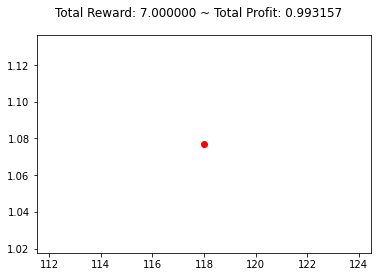

{'total_reward': 6.00000000000156, 'total_profit': 0.9927880639469905, 'position': 0}


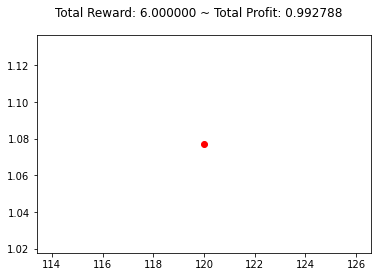

{'total_reward': 7.0000000000014495, 'total_profit': 0.9926036850698529, 'position': 1}


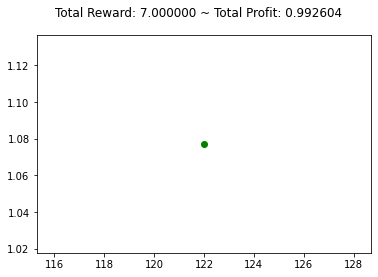

{'total_reward': 7.0000000000014495, 'total_profit': 0.9922350642602455, 'position': 1}


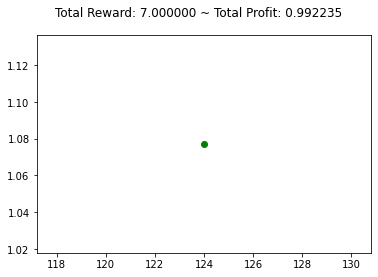

{'total_reward': 7.0000000000014495, 'total_profit': 0.9922350642602455, 'position': 0}


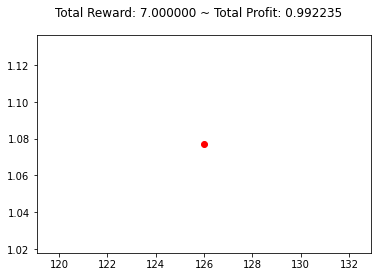

{'total_reward': 7.0000000000014495, 'total_profit': 0.9922350642602455, 'position': 0}


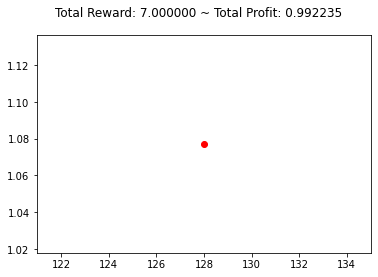

{'total_reward': 10.000000000001119, 'total_profit': 0.9920508051953876, 'position': 0}


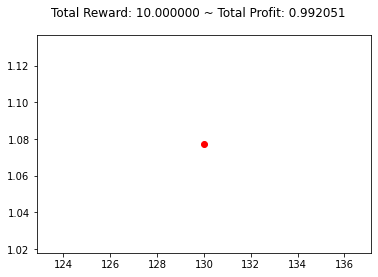

{'total_reward': 10.000000000001119, 'total_profit': 0.9920508051953876, 'position': 0}


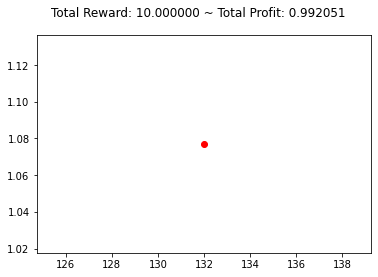

{'total_reward': 13.000000000000789, 'total_profit': 0.9920508051953876, 'position': 1}


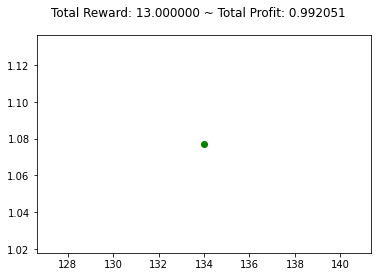

{'total_reward': 13.000000000000789, 'total_profit': 0.9920508051953876, 'position': 0}


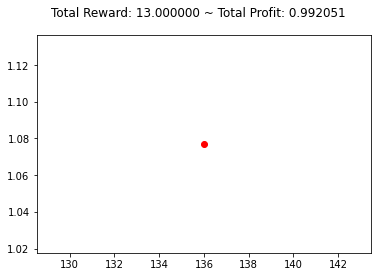

{'total_reward': 13.000000000000789, 'total_profit': 0.991774442263306, 'position': 1}


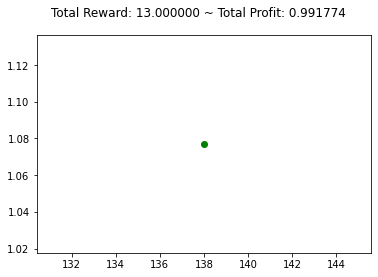

{'total_reward': 13.000000000000789, 'total_profit': 0.991774442263306, 'position': 1}


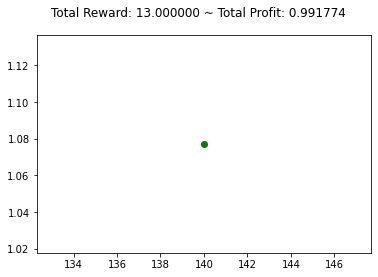

{'total_reward': 14.000000000000679, 'total_profit': 0.991774442263306, 'position': 0}


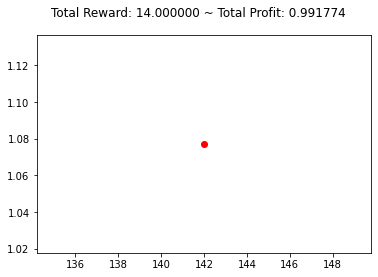

{'total_reward': 14.000000000000679, 'total_profit': 0.9914981819729819, 'position': 1}


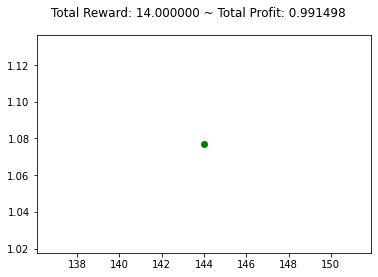

{'total_reward': 14.000000000000679, 'total_profit': 0.9914981819729819, 'position': 1}


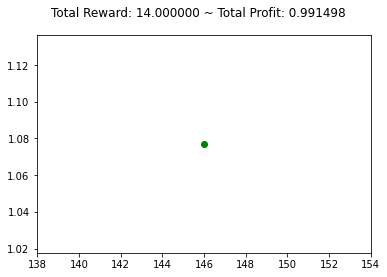

{'total_reward': 14.000000000000679, 'total_profit': 0.9914981819729819, 'position': 1}


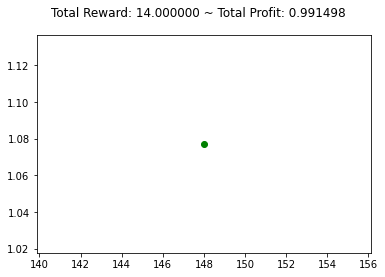

{'total_reward': 13.000000000000789, 'total_profit': 0.9911299717113634, 'position': 1}


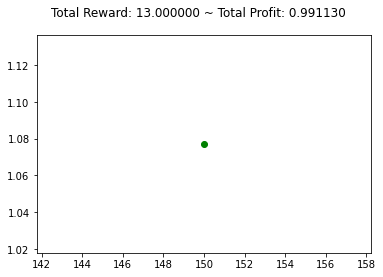

{'total_reward': 13.000000000000789, 'total_profit': 0.9911299717113634, 'position': 1}


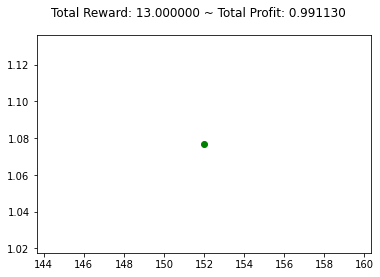

{'total_reward': 13.000000000000789, 'total_profit': 0.9911299717113634, 'position': 1}


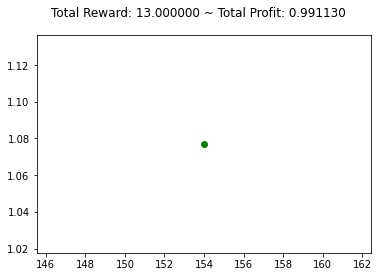

{'total_reward': 12.000000000000899, 'total_profit': 0.9911299717113634, 'position': 0}


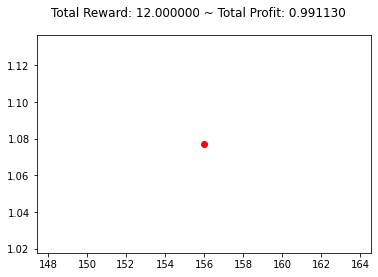

{'total_reward': 12.000000000000899, 'total_profit': 0.9911299717113634, 'position': 0}


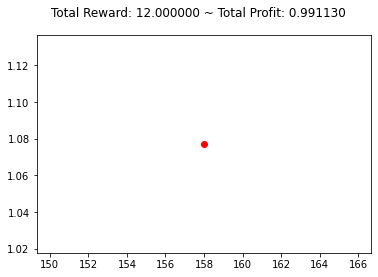

{'total_reward': 12.000000000000899, 'total_profit': 0.9911299717113634, 'position': 0}


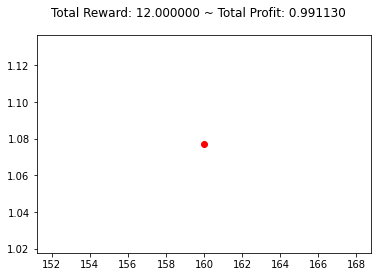

{'total_reward': 14.000000000000679, 'total_profit': 0.990853890939299, 'position': 0}


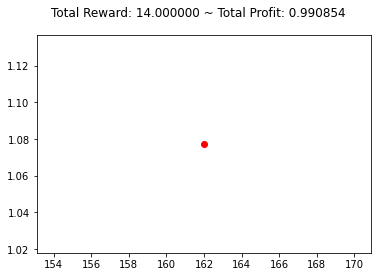

{'total_reward': 15.000000000000568, 'total_profit': 0.9906699054428848, 'position': 1}


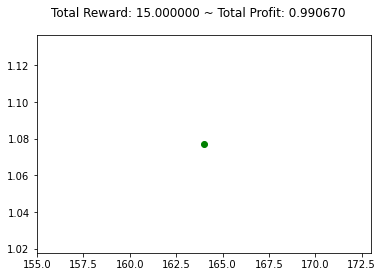

{'total_reward': 20.999999999999908, 'total_profit': 0.9906699054428848, 'position': 1}


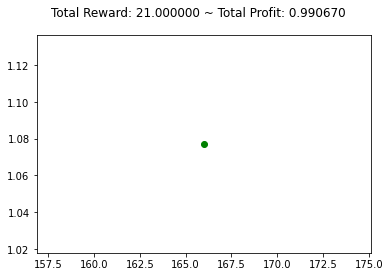

{'total_reward': 21.999999999999797, 'total_profit': 0.9906699054428848, 'position': 0}


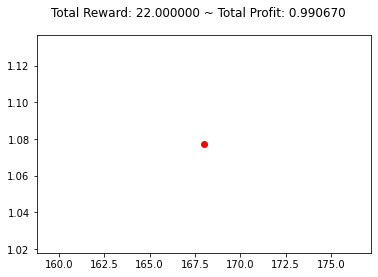

{'total_reward': 21.999999999999797, 'total_profit': 0.9906699054428848, 'position': 0}


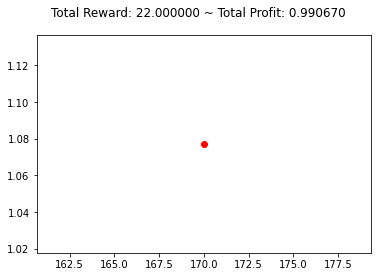

{'total_reward': 23.999999999999577, 'total_profit': 0.9905779212362512, 'position': 1}


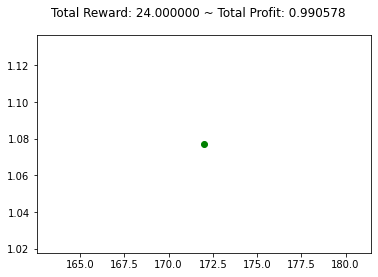

{'total_reward': 23.999999999999577, 'total_profit': 0.9905779212362512, 'position': 0}


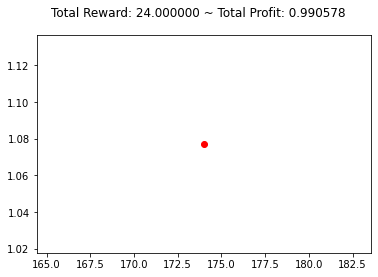

{'total_reward': 23.999999999999577, 'total_profit': 0.9903019942386925, 'position': 0}


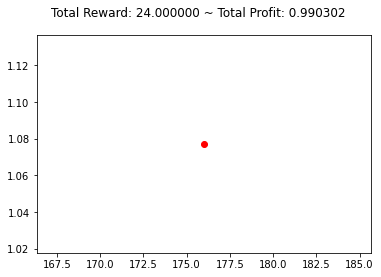

{'total_reward': 24.999999999999467, 'total_profit': 0.9901180770701088, 'position': 1}


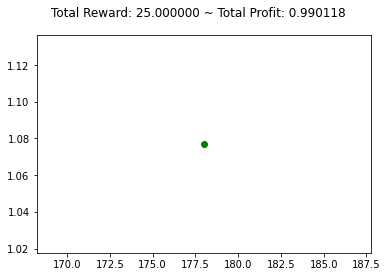

{'total_reward': 24.999999999999467, 'total_profit': 0.9901180770701088, 'position': 1}


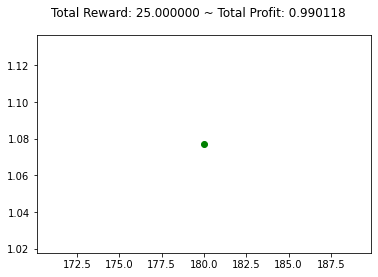

{'total_reward': 27.999999999999137, 'total_profit': 0.9901180770701088, 'position': 0}


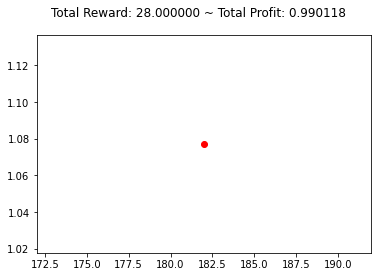

{'total_reward': 28.999999999999027, 'total_profit': 0.9899342282023955, 'position': 1}


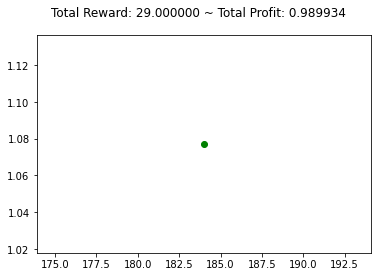

{'total_reward': 22.999999999997467, 'total_profit': 0.9891075224351298, 'position': 1}


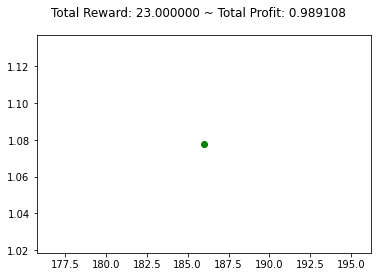

{'total_reward': 17.999999999995797, 'total_profit': 0.9891075224351298, 'position': 0}


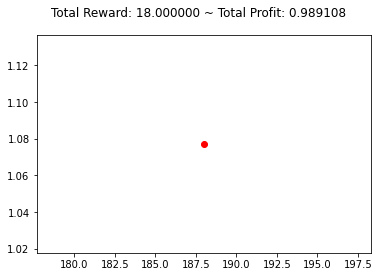

{'total_reward': 19.999999999995577, 'total_profit': 0.9890156832965564, 'position': 1}


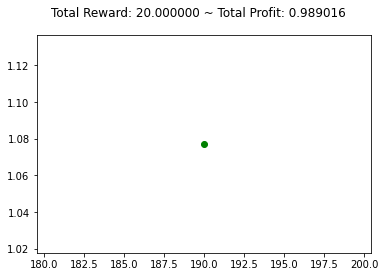

{'total_reward': 19.999999999995577, 'total_profit': 0.9890156832965564, 'position': 1}


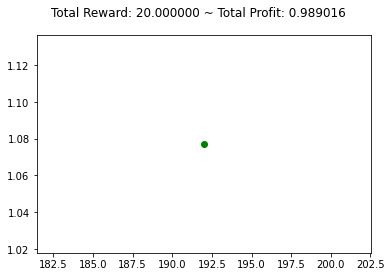

{'total_reward': 20.999999999995467, 'total_profit': 0.9890156832965564, 'position': 0}


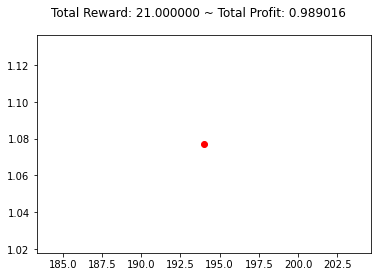

{'total_reward': 20.999999999995467, 'total_profit': 0.9887402170399516, 'position': 1}


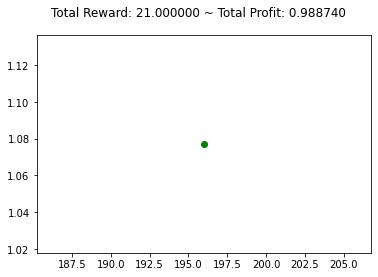

{'total_reward': 19.999999999995577, 'total_profit': 0.9887402170399516, 'position': 0}


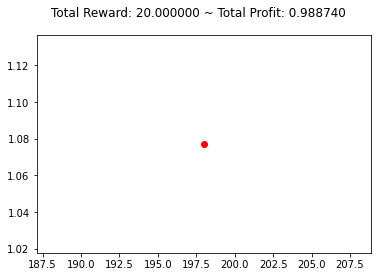

{'total_reward': 20.999999999995467, 'total_profit': 0.9884648019377121, 'position': 0}


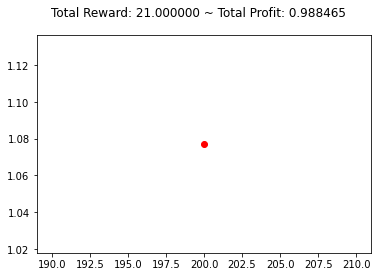

{'total_reward': 20.999999999995467, 'total_profit': 0.9884648019377121, 'position': 0}


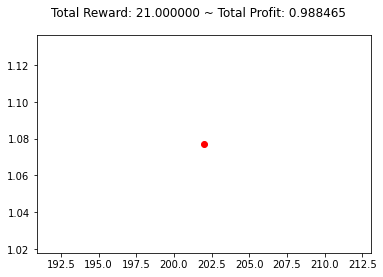

{'total_reward': 20.999999999995467, 'total_profit': 0.9884648019377121, 'position': 0}


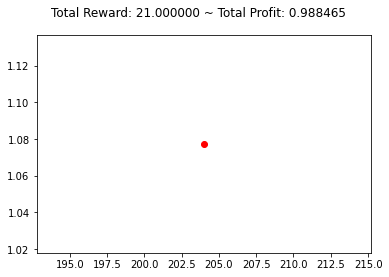

{'total_reward': 19.999999999995577, 'total_profit': 0.9880977522526257, 'position': 1}


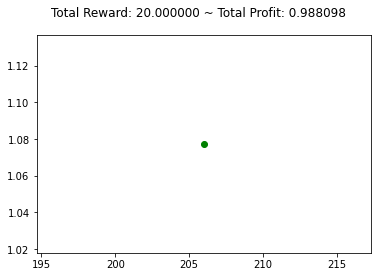

{'total_reward': 23.999999999995136, 'total_profit': 0.9880060239057772, 'position': 1}


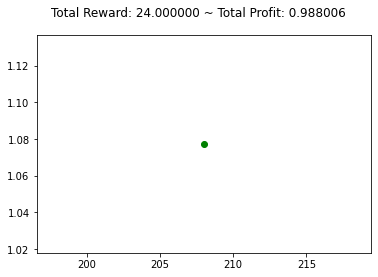

{'total_reward': 23.999999999995136, 'total_profit': 0.9880060239057772, 'position': 0}


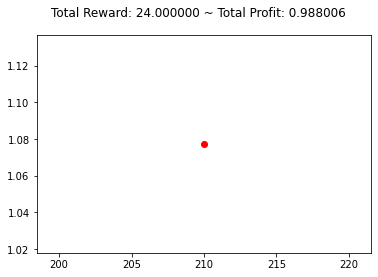

{'total_reward': 23.999999999995136, 'total_profit': 0.9880060239057772, 'position': 0}


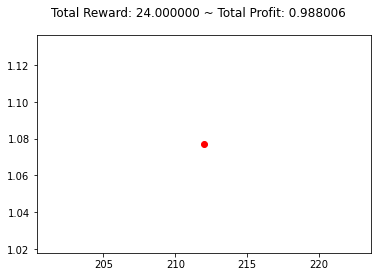

{'total_reward': 25.999999999994916, 'total_profit': 0.9878225672120802, 'position': 0}


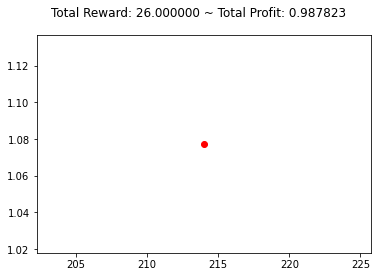

{'total_reward': 25.999999999994916, 'total_profit': 0.9875474588105172, 'position': 1}


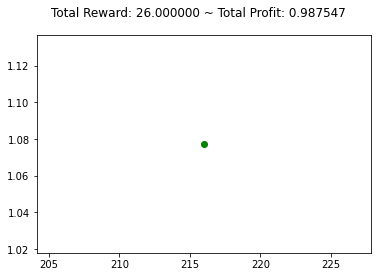

{'total_reward': 30.999999999994365, 'total_profit': 0.9875474588105172, 'position': 1}


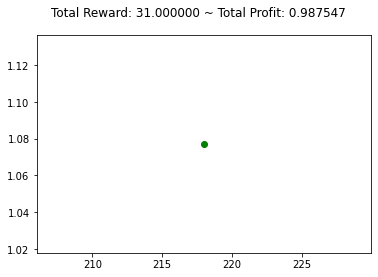

{'total_reward': 31.999999999994255, 'total_profit': 0.9875474588105172, 'position': 0}


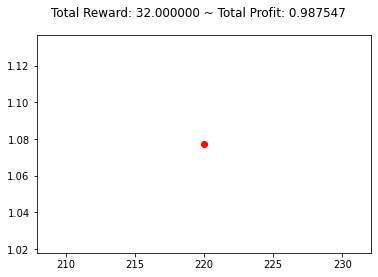

{'total_reward': 26.999999999992585, 'total_profit': 0.986814380990114, 'position': 1}


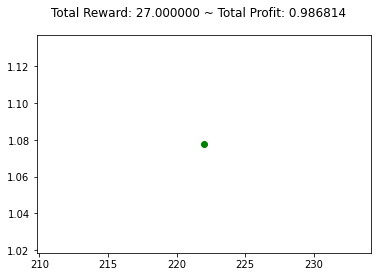

{'total_reward': 26.999999999992585, 'total_profit': 0.986814380990114, 'position': 1}


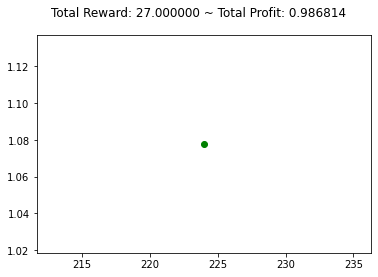

{'total_reward': 26.999999999992585, 'total_profit': 0.986814380990114, 'position': 0}


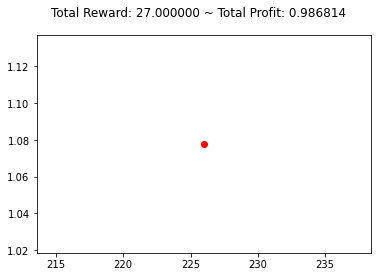

{'total_reward': 27.999999999994696, 'total_profit': 0.9866312305853276, 'position': 1}


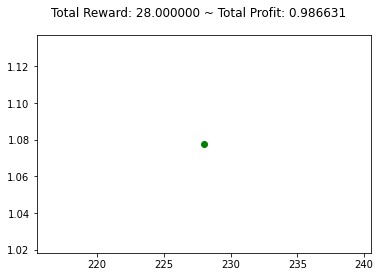

{'total_reward': 27.999999999994696, 'total_profit': 0.9866312305853276, 'position': 1}


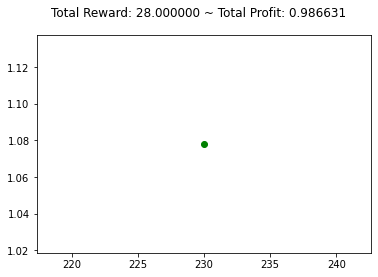

{'total_reward': 24.999999999992806, 'total_profit': 0.9860820342421128, 'position': 1}


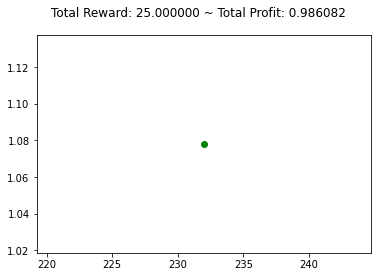

{'total_reward': 20.999999999991026, 'total_profit': 0.9858074870400038, 'position': 1}


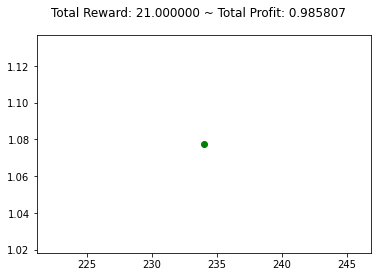

{'total_reward': 21.999999999990916, 'total_profit': 0.9858074870400038, 'position': 0}


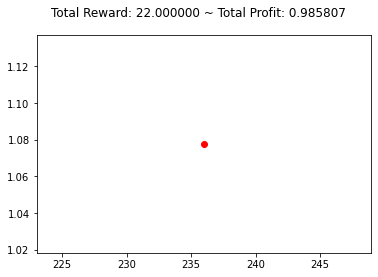

{'total_reward': 23.999999999990695, 'total_profit': 0.9857159882942232, 'position': 1}


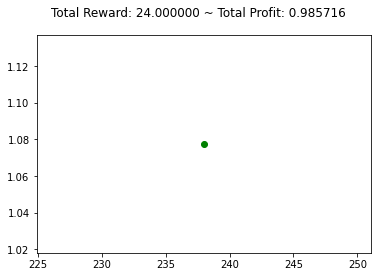

{'total_reward': 21.999999999990916, 'total_profit': 0.9857159882942232, 'position': 0}


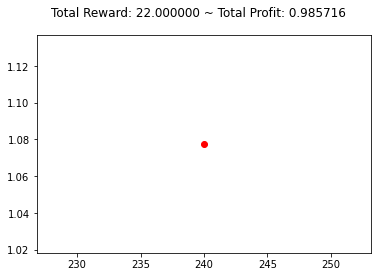

{'total_reward': 22.999999999990806, 'total_profit': 0.9855329568229961, 'position': 0}


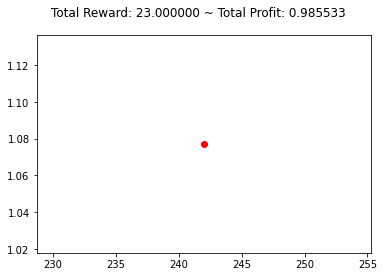

{'total_reward': 24.999999999990585, 'total_profit': 0.9853499423463344, 'position': 0}


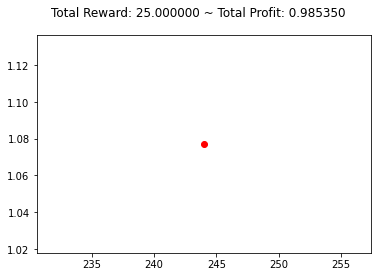

{'total_reward': 24.999999999990585, 'total_profit': 0.9850754970926868, 'position': 1}


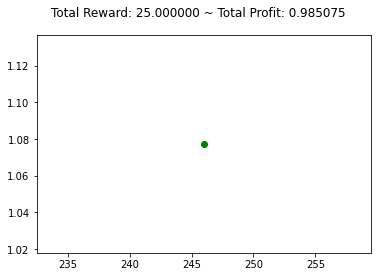

{'total_reward': 25.999999999990475, 'total_profit': 0.9848011537496422, 'position': 1}


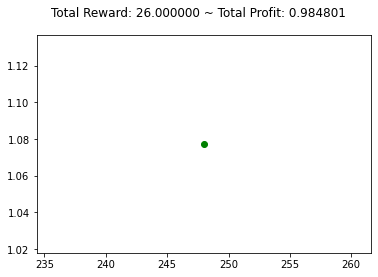

{'total_reward': 23.999999999990695, 'total_profit': 0.984344127040087, 'position': 1}


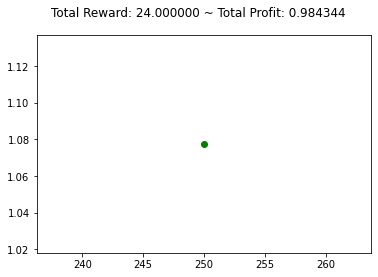

{'total_reward': 18.999999999991246, 'total_profit': 0.9837960003800182, 'position': 1}


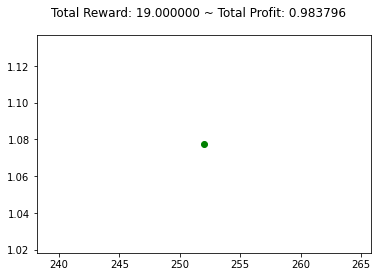

{'total_reward': 15.999999999991577, 'total_profit': 0.9835220133765704, 'position': 1}


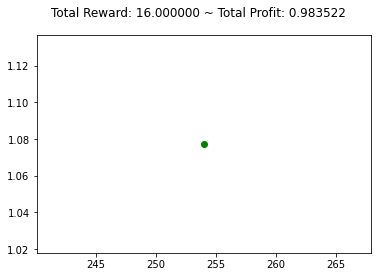

{'total_reward': 15.999999999991577, 'total_profit': 0.9832481026784522, 'position': 1}


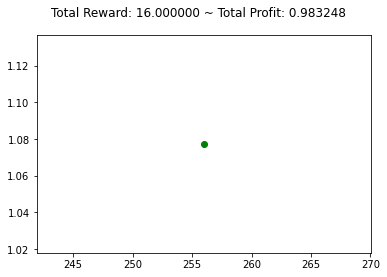

{'total_reward': 17.999999999991356, 'total_profit': 0.9832481026784522, 'position': 0}


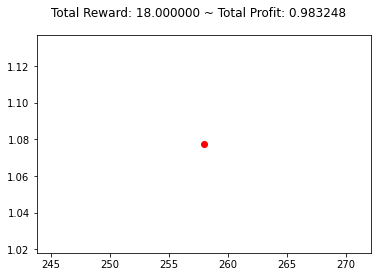

{'total_reward': 17.999999999991356, 'total_profit': 0.9832481026784522, 'position': 0}


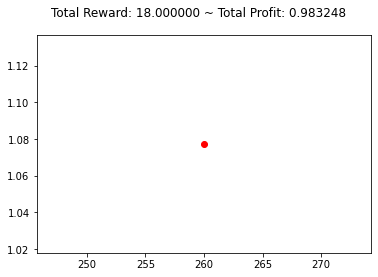

{'total_reward': 17.999999999991356, 'total_profit': 0.9832481026784522, 'position': 0}


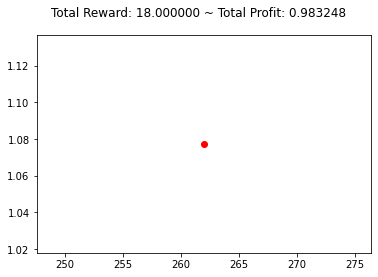

{'total_reward': 17.999999999991356, 'total_profit': 0.9829743190968635, 'position': 0}


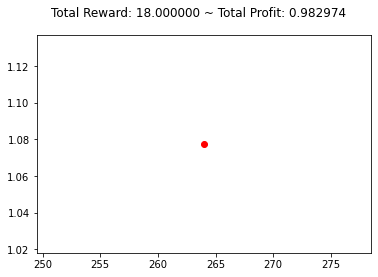

{'total_reward': 17.999999999991356, 'total_profit': 0.9829743190968635, 'position': 0}


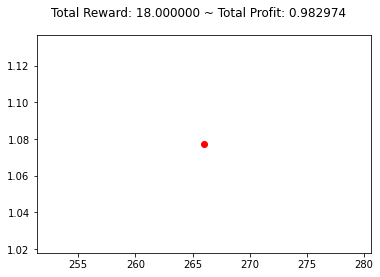

{'total_reward': 15.999999999991577, 'total_profit': 0.982518224850809, 'position': 1}


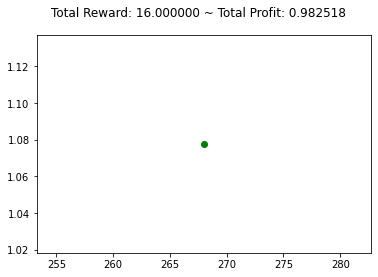

{'total_reward': 11.999999999992017, 'total_profit': 0.9822445937076089, 'position': 1}


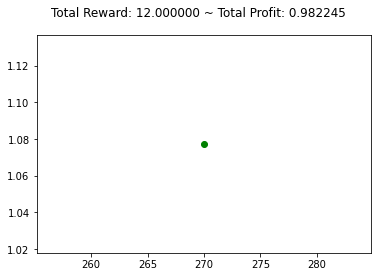

{'total_reward': 10.999999999992127, 'total_profit': 0.9822445937076089, 'position': 0}


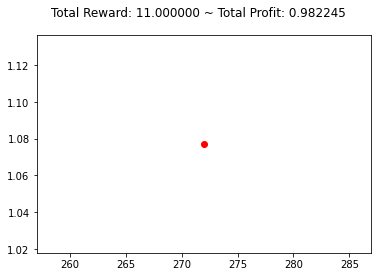

{'total_reward': 11.999999999992017, 'total_profit': 0.9820621898833364, 'position': 1}


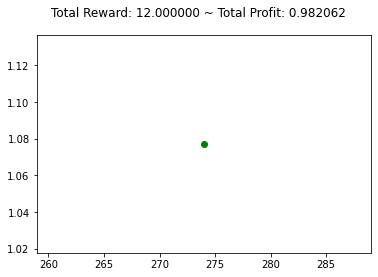

{'total_reward': 11.999999999992017, 'total_profit': 0.9816975176999412, 'position': 1}


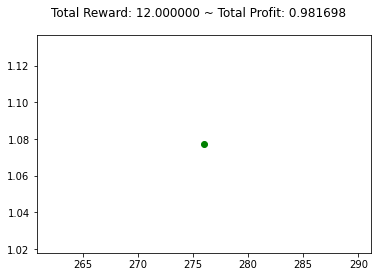

{'total_reward': 9.999999999992237, 'total_profit': 0.9813329809313932, 'position': 1}


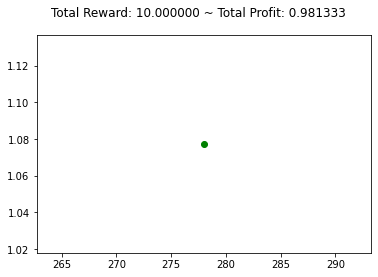

{'total_reward': 9.999999999992237, 'total_profit': 0.9813329809313932, 'position': 1}


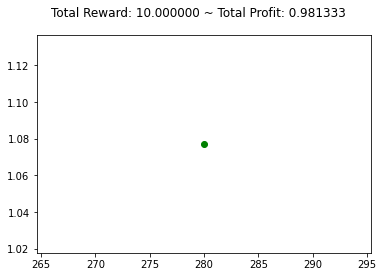

{'total_reward': 8.999999999992347, 'total_profit': 0.9813329809313932, 'position': 0}


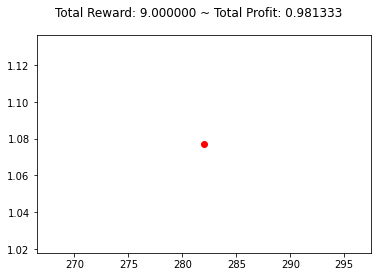

{'total_reward': 8.999999999992347, 'total_profit': 0.9810596545046183, 'position': 1}


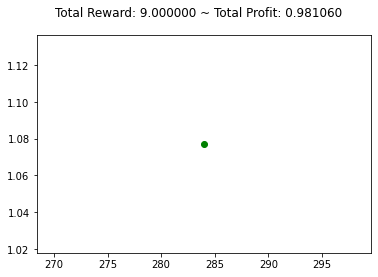

{'total_reward': 8.999999999992347, 'total_profit': 0.9810596545046183, 'position': 0}


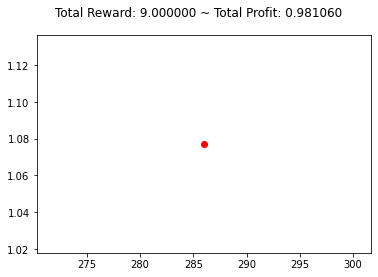

{'total_reward': 8.999999999992347, 'total_profit': 0.9807864042062696, 'position': 0}


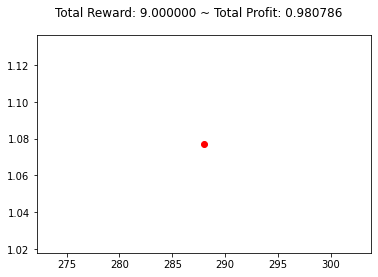

{'total_reward': 7.999999999992458, 'total_profit': 0.9804222057643067, 'position': 1}


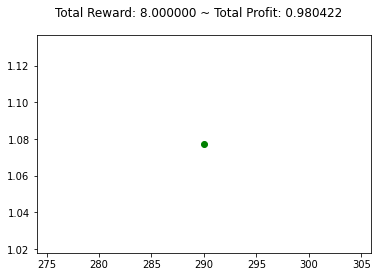

{'total_reward': 7.999999999992458, 'total_profit': 0.9801491583620329, 'position': 1}


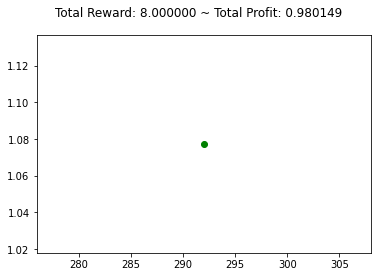

{'total_reward': 9.999999999992237, 'total_profit': 0.9801491583620329, 'position': 0}


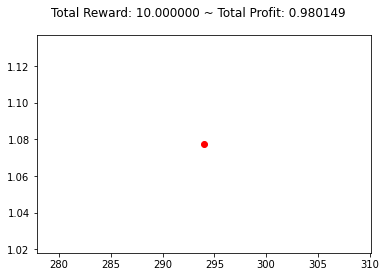

{'total_reward': 8.999999999992347, 'total_profit': 0.9797852978856108, 'position': 0}


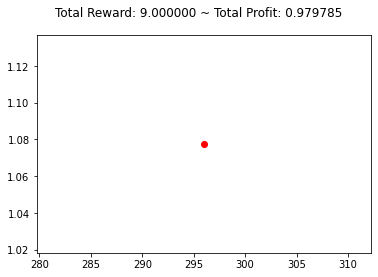

{'total_reward': 8.999999999992347, 'total_profit': 0.9795125038351554, 'position': 1}


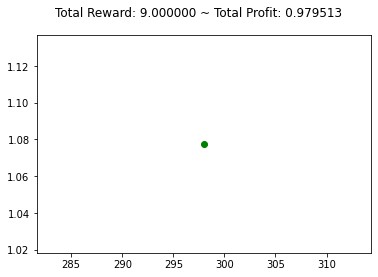

{'total_reward': 8.999999999992347, 'total_profit': 0.9795125038351554, 'position': 0}


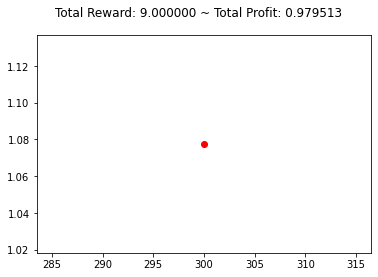

{'total_reward': 11.999999999994237, 'total_profit': 0.9792397857366398, 'position': 0}


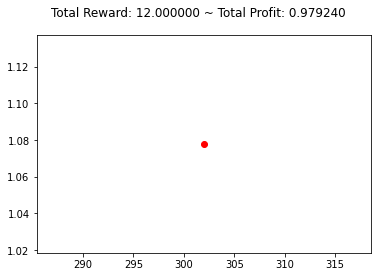

{'total_reward': 11.999999999994237, 'total_profit': 0.9792397857366398, 'position': 0}


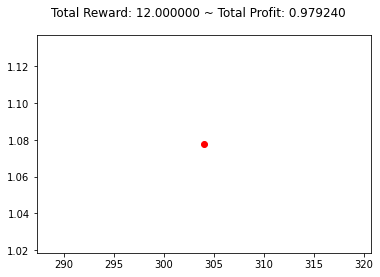

{'total_reward': 13.999999999996238, 'total_profit': 0.979148913447689, 'position': 1}


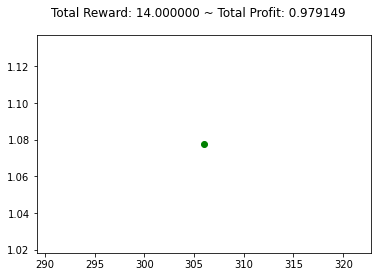

{'total_reward': 13.999999999996238, 'total_profit': 0.979148913447689, 'position': 0}


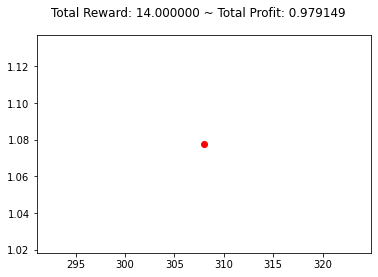

{'total_reward': 14.999999999996128, 'total_profit': 0.9789671688697869, 'position': 1}


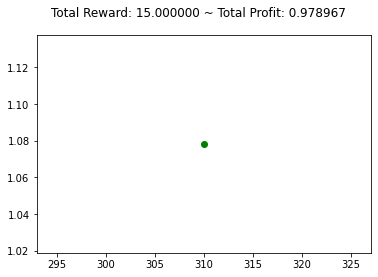

{'total_reward': 16.999999999998128, 'total_profit': 0.9789671688697869, 'position': 0}


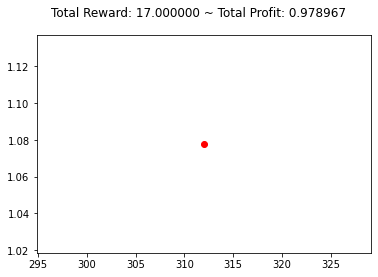

{'total_reward': 16.999999999998128, 'total_profit': 0.9786946531876296, 'position': 1}


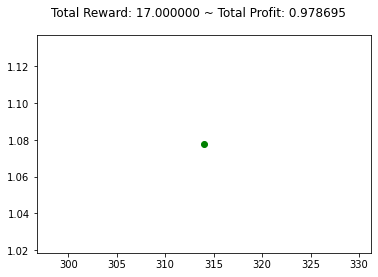

{'total_reward': 15.999999999996017, 'total_profit': 0.9786946531876296, 'position': 0}


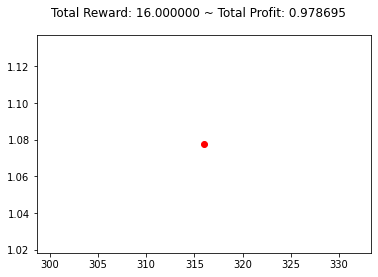

{'total_reward': 15.999999999996017, 'total_profit': 0.9786946531876296, 'position': 0}


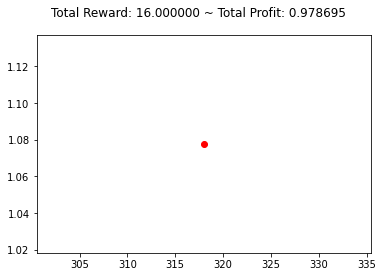

{'total_reward': 9.999999999994458, 'total_profit': 0.9778777127425646, 'position': 1}


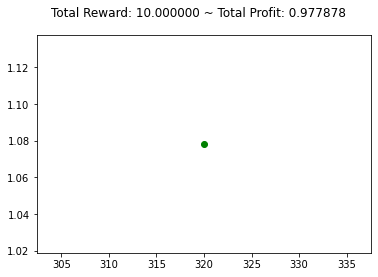

{'total_reward': 3.999999999992898, 'total_profit': 0.9778777127425646, 'position': 0}


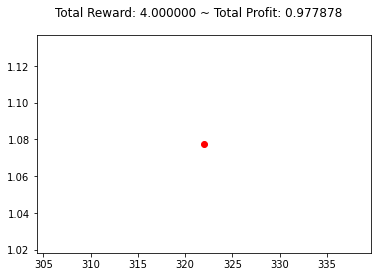

{'total_reward': 5.999999999992678, 'total_profit': 0.9777869500070214, 'position': 1}


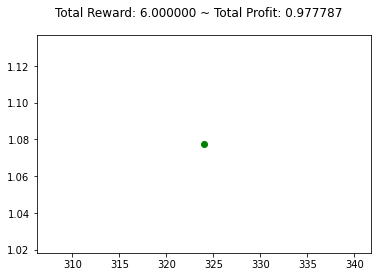

{'total_reward': 5.999999999992678, 'total_profit': 0.9777869500070214, 'position': 1}


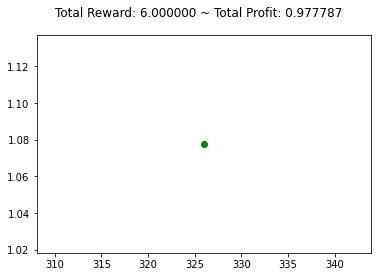

{'total_reward': 6.999999999992568, 'total_profit': 0.9777869500070214, 'position': 0}


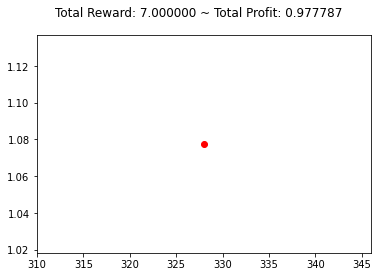

{'total_reward': 4.999999999992788, 'total_profit': 0.9774240001369371, 'position': 0}


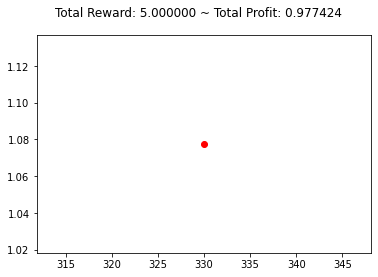

{'total_reward': 7.999999999992458, 'total_profit': 0.9774240001369371, 'position': 1}


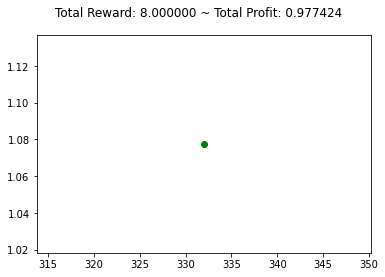

{'total_reward': 7.999999999992458, 'total_profit': 0.9774240001369371, 'position': 1}


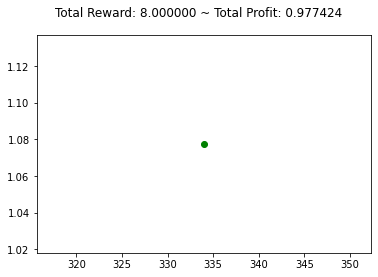

{'total_reward': 9.999999999992237, 'total_profit': 0.9774240001369371, 'position': 0}


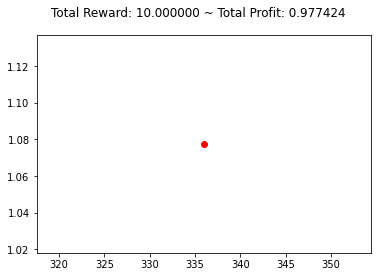

{'total_reward': 9.999999999992237, 'total_profit': 0.9771518382657276, 'position': 1}


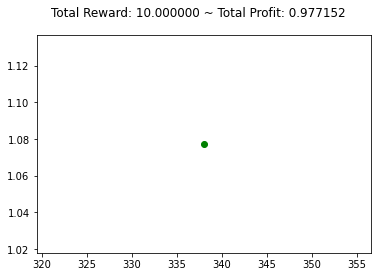

{'total_reward': 4.999999999992788, 'total_profit': 0.9766077165924474, 'position': 1}


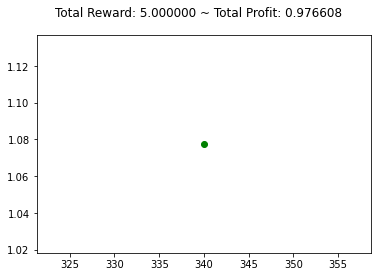

{'total_reward': 1.9999999999931184, 'total_profit': 0.9766077165924474, 'position': 0}


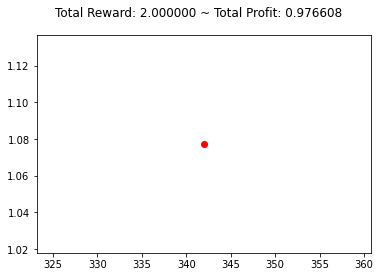

{'total_reward': -6.0000000000060005, 'total_profit': 0.9759733203400212, 'position': 0}


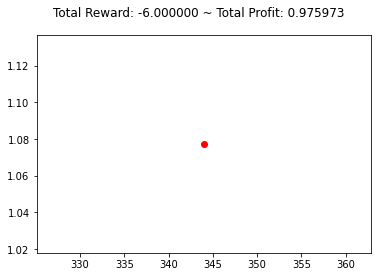

{'total_reward': -8.00000000000578, 'total_profit': 0.975520390453099, 'position': 1}


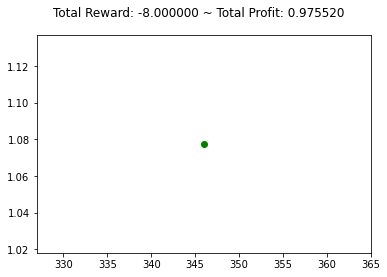

{'total_reward': -2.000000000006441, 'total_profit': 0.9756109512023055, 'position': 1}


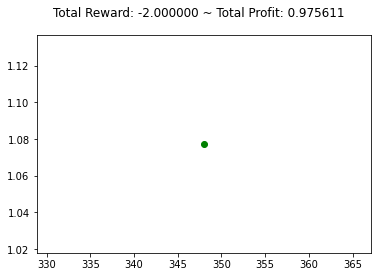

{'total_reward': -6.661338147750939e-12, 'total_profit': 0.9756109512023055, 'position': 0}


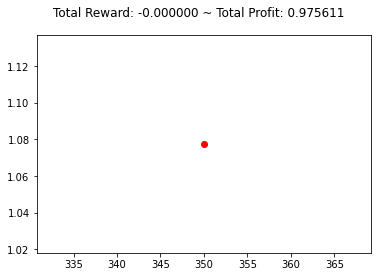

{'total_reward': 1.9999999999931184, 'total_profit': 0.9755203820460482, 'position': 1}


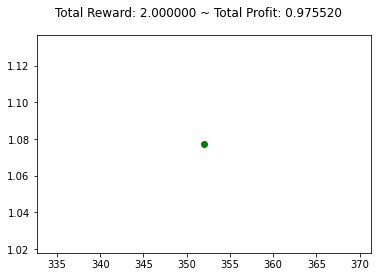

{'total_reward': 1.9999999999931184, 'total_profit': 0.97524869980077, 'position': 1}


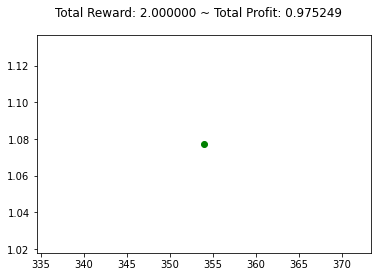

{'total_reward': 4.999999999992788, 'total_profit': 0.97524869980077, 'position': 0}


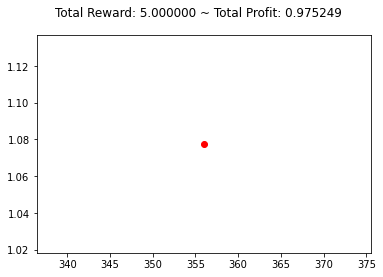

{'total_reward': 3.999999999992898, 'total_profit': 0.9748866921171023, 'position': 1}


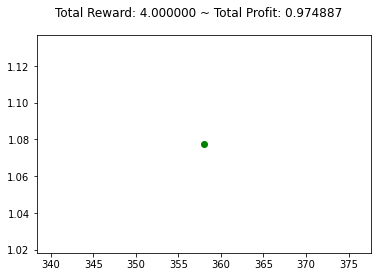

{'total_reward': 3.999999999992898, 'total_profit': 0.9748866921171023, 'position': 1}


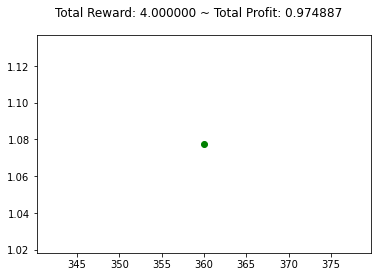

{'total_reward': 3.999999999992898, 'total_profit': 0.9748866921171023, 'position': 1}


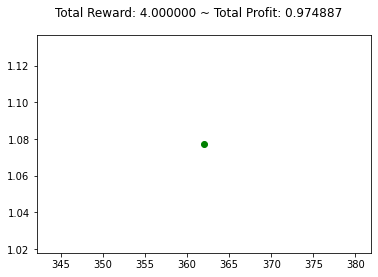

{'total_reward': 3.999999999992898, 'total_profit': 0.9748866921171023, 'position': 1}


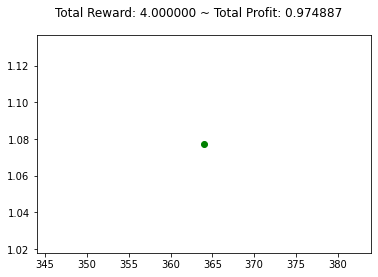

{'total_reward': 1.9999999999931184, 'total_profit': 0.9747961733898863, 'position': 1}


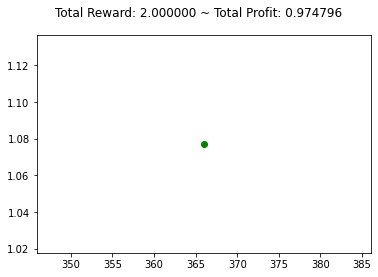

{'total_reward': 0.9999999999932285, 'total_profit': 0.9747961733898863, 'position': 0}


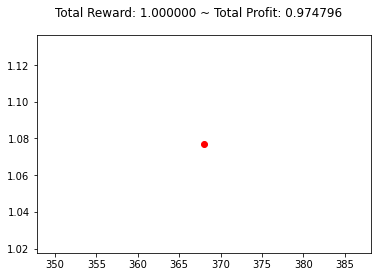

{'total_reward': 0.9999999999932285, 'total_profit': 0.9745246172082382, 'position': 1}


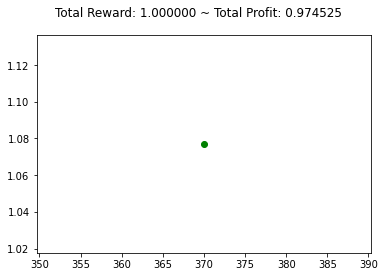

{'total_reward': 1.9999999999931184, 'total_profit': 0.9745246172082382, 'position': 0}


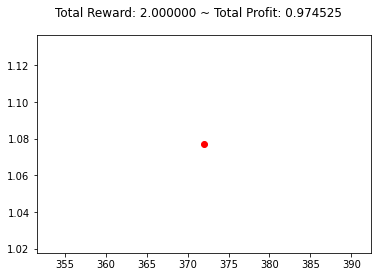

{'total_reward': 3.999999999992898, 'total_profit': 0.9742531618831106, 'position': 0}


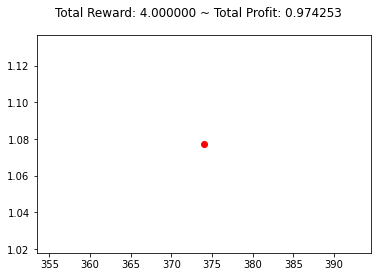

{'total_reward': 3.999999999992898, 'total_profit': 0.9742531618831106, 'position': 0}


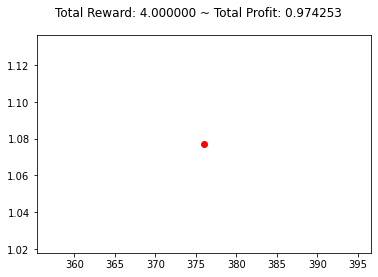

{'total_reward': 4.999999999992788, 'total_profit': 0.974072258872827, 'position': 1}


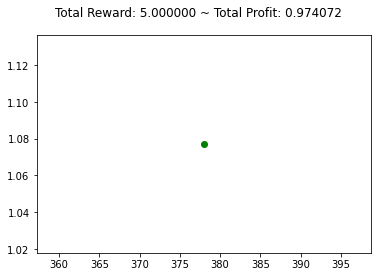

{'total_reward': 3.999999999992898, 'total_profit': 0.9738009295528068, 'position': 1}


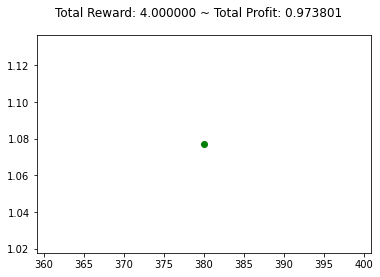

{'total_reward': 4.999999999992788, 'total_profit': 0.9735297009956945, 'position': 1}


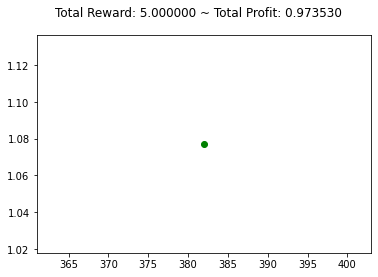

{'total_reward': 4.999999999992788, 'total_profit': 0.9735297009956945, 'position': 1}


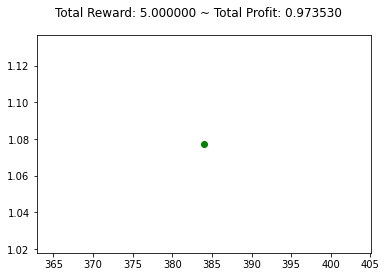

{'total_reward': 5.999999999992678, 'total_profit': 0.9735297009956945, 'position': 0}


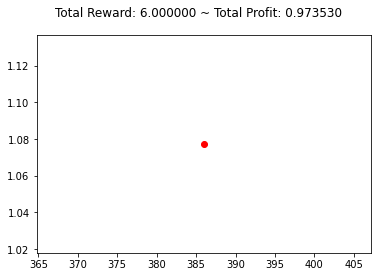

{'total_reward': 5.999999999992678, 'total_profit': 0.9732585731547192, 'position': 1}


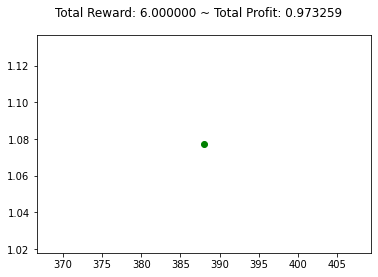

{'total_reward': 5.999999999992678, 'total_profit': 0.9732585731547192, 'position': 1}


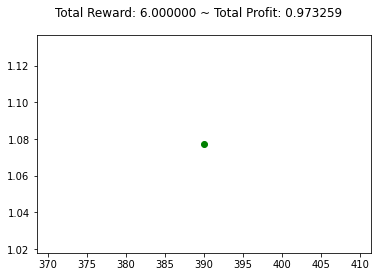

{'total_reward': 4.999999999992788, 'total_profit': 0.9732585731547192, 'position': 0}


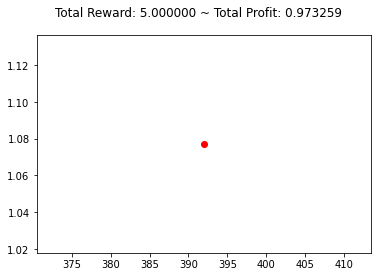

{'total_reward': 4.999999999992788, 'total_profit': 0.9732585731547192, 'position': 0}


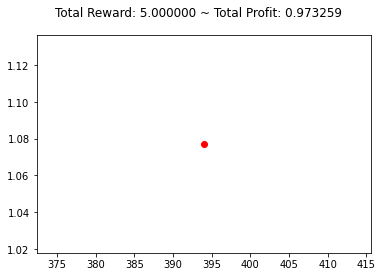

{'total_reward': 5.999999999992678, 'total_profit': 0.9729874956577862, 'position': 0}


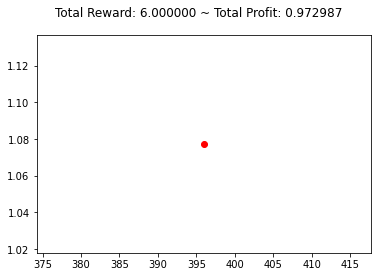

{'total_reward': 5.999999999992678, 'total_profit': 0.9729874956577862, 'position': 0}


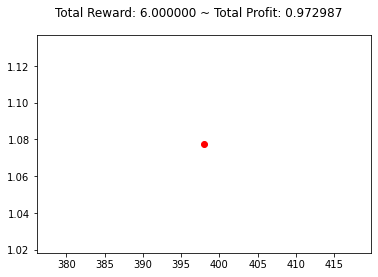

{'total_reward': 7.999999999992458, 'total_profit': 0.9728971532719313, 'position': 1}


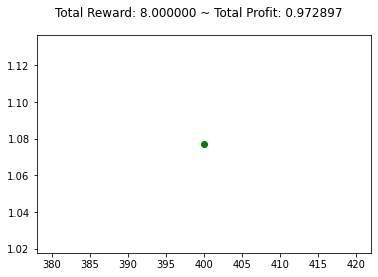

{'total_reward': 7.999999999992458, 'total_profit': 0.9728971532719313, 'position': 0}


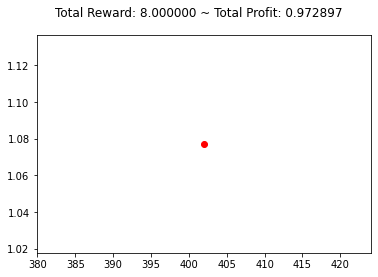

{'total_reward': 6.999999999992568, 'total_profit': 0.9726261512793763, 'position': 0}


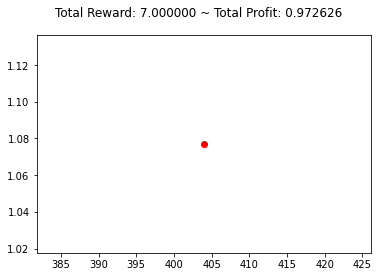

{'total_reward': 7.999999999992458, 'total_profit': 0.9724455000625711, 'position': 1}


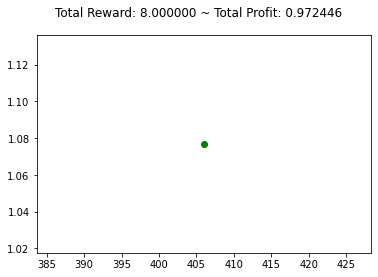

{'total_reward': 10.999999999992127, 'total_profit': 0.9724455000625711, 'position': 1}


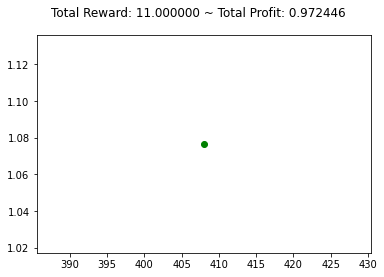

{'total_reward': 10.999999999992127, 'total_profit': 0.9724455000625711, 'position': 0}


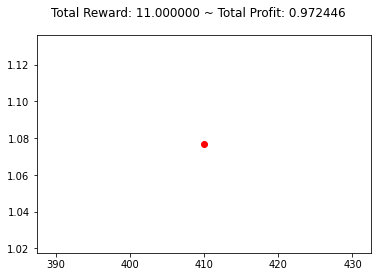

{'total_reward': 8.999999999992347, 'total_profit': 0.9719939139661363, 'position': 0}


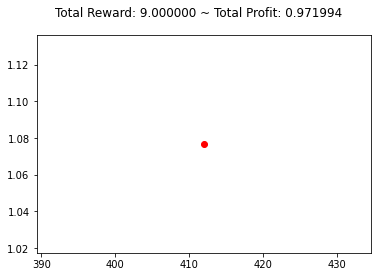

{'total_reward': 8.999999999992347, 'total_profit': 0.9719939139661363, 'position': 0}


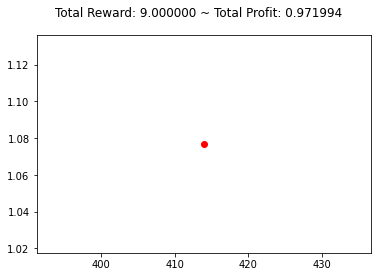

{'total_reward': 8.999999999992347, 'total_profit': 0.9719939139661363, 'position': 0}


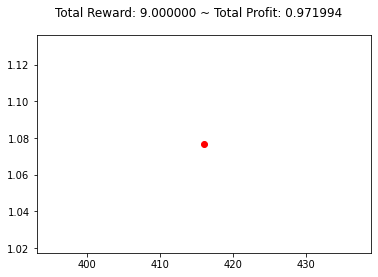

{'total_reward': 9.999999999992237, 'total_profit': 0.9719036219165343, 'position': 0}


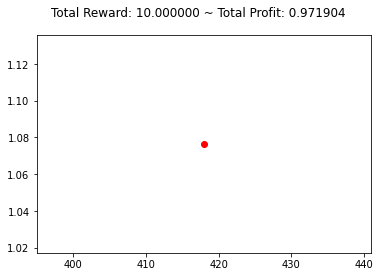

{'total_reward': -1.0000000000065512, 'total_profit': 0.9710914461879134, 'position': 0}


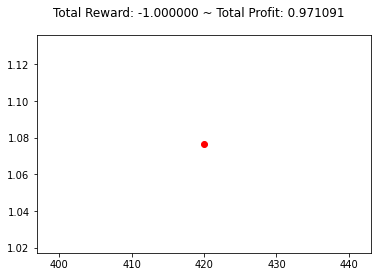

{'total_reward': -3.000000000006331, 'total_profit': 0.9706404888896002, 'position': 1}


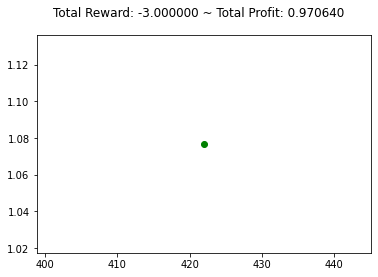

{'total_reward': -3.000000000006331, 'total_profit': 0.9706404888896002, 'position': 1}


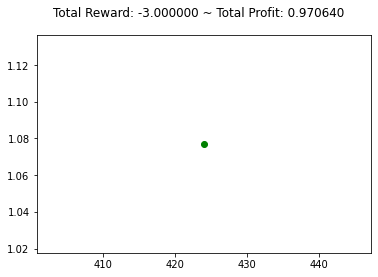

{'total_reward': -3.000000000006331, 'total_profit': 0.9706404888896002, 'position': 0}


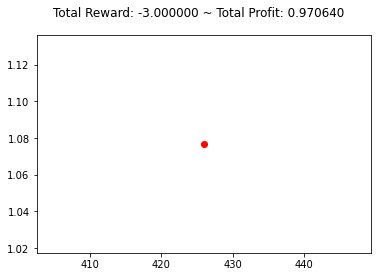

{'total_reward': -4.000000000006221, 'total_profit': 0.9702799240720336, 'position': 1}


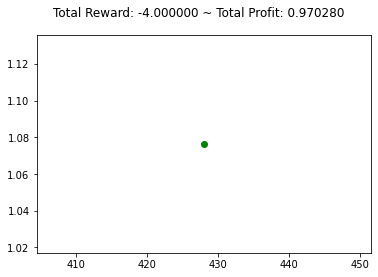

{'total_reward': -15.00000000000501, 'total_profit': 0.9700093244836525, 'position': 1}


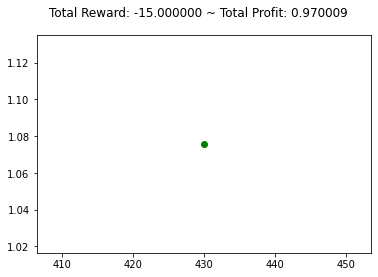

{'total_reward': -15.00000000000501, 'total_profit': 0.9700093244836525, 'position': 0}


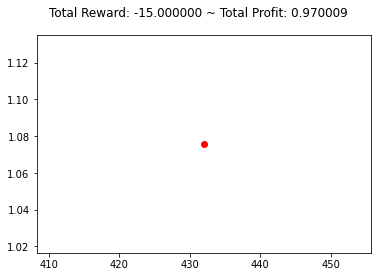

{'total_reward': -22.00000000000424, 'total_profit': 0.9691081638328874, 'position': 1}


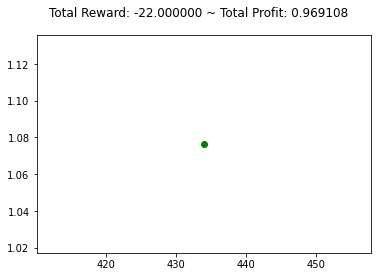

{'total_reward': -22.00000000000424, 'total_profit': 0.9691081638328874, 'position': 1}


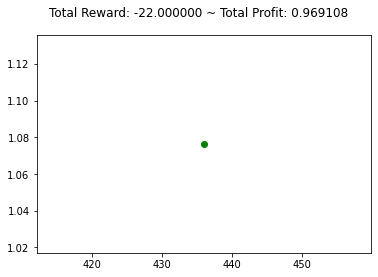

{'total_reward': -21.00000000000435, 'total_profit': 0.969018106388056, 'position': 1}


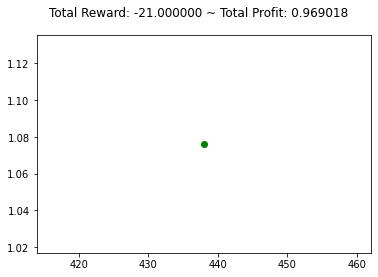

{'total_reward': -21.00000000000435, 'total_profit': 0.9686579770165469, 'position': 1}


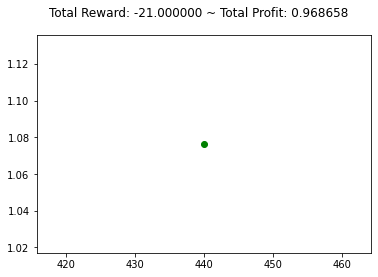

{'total_reward': -20.00000000000446, 'total_profit': 0.9686579770165469, 'position': 0}


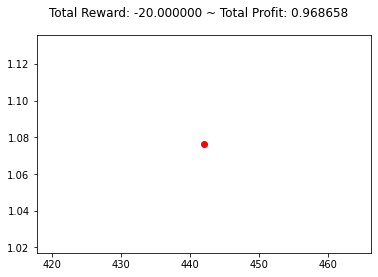

{'total_reward': -20.00000000000446, 'total_profit': 0.9684779792506792, 'position': 0}


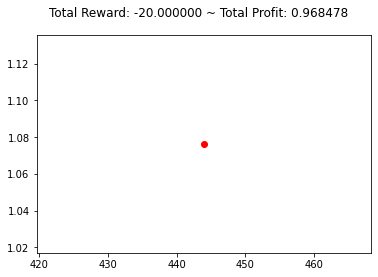

{'total_reward': -19.00000000000457, 'total_profit': 0.9682979814848116, 'position': 1}


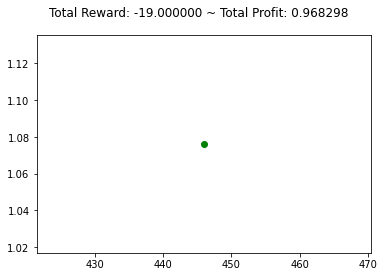

{'total_reward': -16.0000000000049, 'total_profit': 0.9682979814848116, 'position': 0}


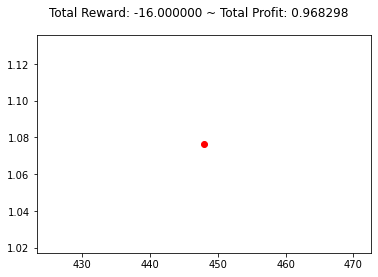

{'total_reward': -19.00000000000457, 'total_profit': 0.9677583894081971, 'position': 1}


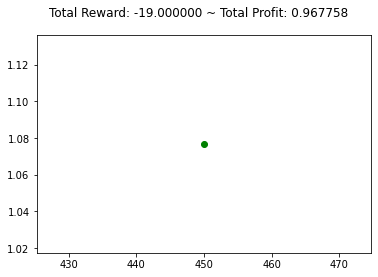

{'total_reward': -21.00000000000435, 'total_profit': 0.9677583894081971, 'position': 0}


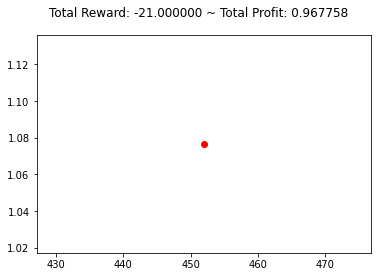

{'total_reward': -21.00000000000435, 'total_profit': 0.9677583894081971, 'position': 0}


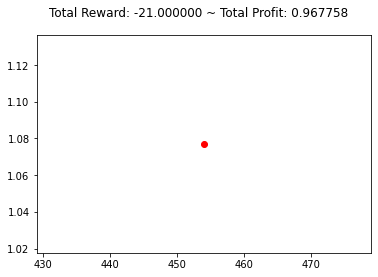

{'total_reward': -23.00000000000413, 'total_profit': 0.9673089799211495, 'position': 0}


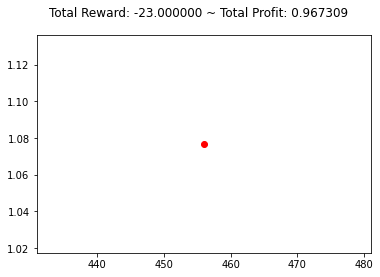

{'total_reward': -26.000000000003798, 'total_profit': 0.966770089124536, 'position': 1}


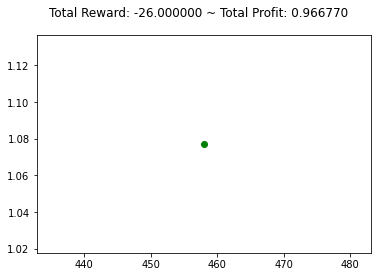

{'total_reward': -34.00000000000291, 'total_profit': 0.966770089124536, 'position': 0}


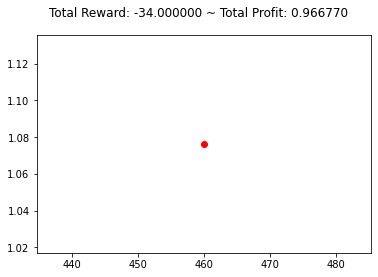

{'total_reward': -33.00000000000303, 'total_profit': 0.9665904087808646, 'position': 1}


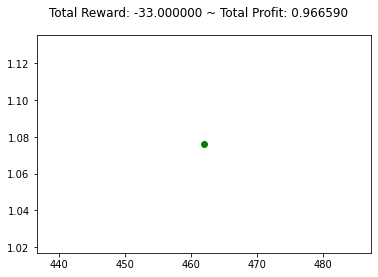

{'total_reward': -32.00000000000314, 'total_profit': 0.9665904087808646, 'position': 0}


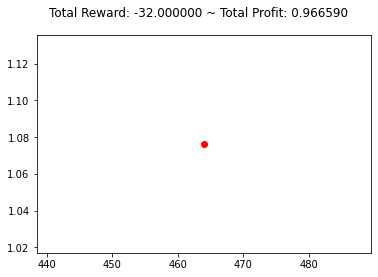

{'total_reward': -32.00000000000314, 'total_profit': 0.9665904087808646, 'position': 0}


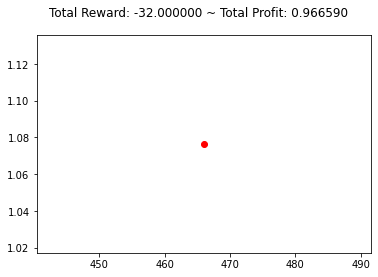

{'total_reward': -33.00000000000303, 'total_profit': 0.9662311816476189, 'position': 1}


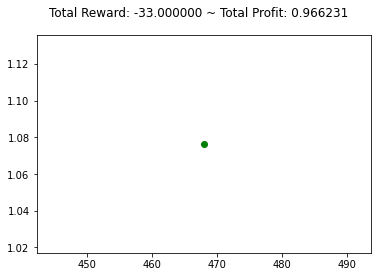

{'total_reward': -34.00000000000292, 'total_profit': 0.9661413665164005, 'position': 1}


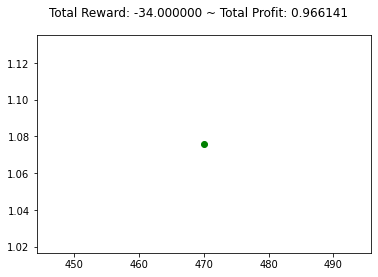

{'total_reward': -35.00000000000503, 'total_profit': 0.9659617028499168, 'position': 1}


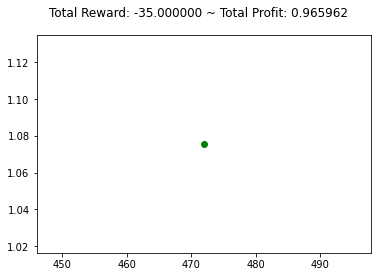

{'total_reward': -37.00000000000481, 'total_profit': 0.9659617028499168, 'position': 0}


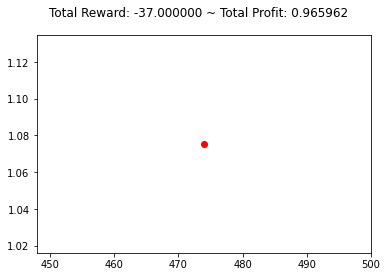

{'total_reward': -31.00000000000547, 'total_profit': 0.9662313488077235, 'position': 1}


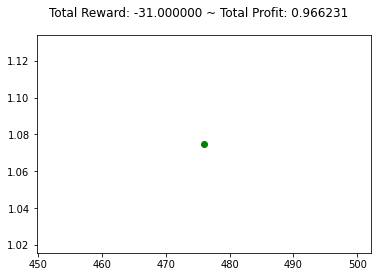

{'total_reward': -30.00000000000558, 'total_profit': 0.9662313488077235, 'position': 1}


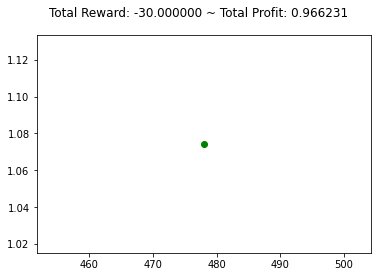

{'total_reward': -30.00000000000558, 'total_profit': 0.9662313488077235, 'position': 1}


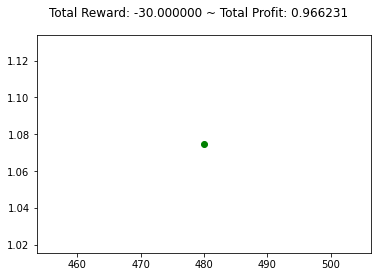

{'total_reward': -25.000000000006132, 'total_profit': 0.9662313488077235, 'position': 0}


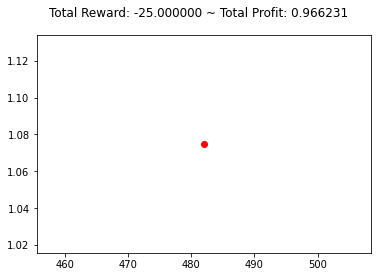

{'total_reward': -25.000000000006132, 'total_profit': 0.9659616275788762, 'position': 1}


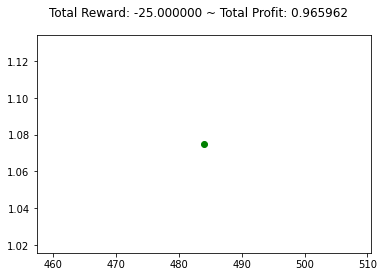

{'total_reward': -23.000000000006352, 'total_profit': 0.9659616275788763, 'position': 1}


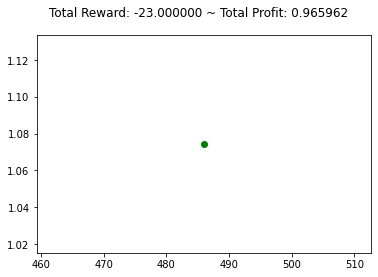

{'total_reward': -23.000000000004132, 'total_profit': 0.9661416260187495, 'position': 1}


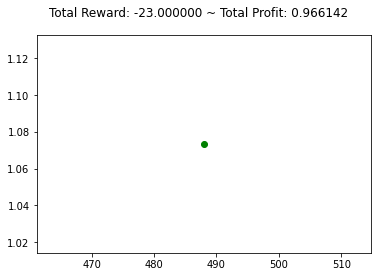

{'total_reward': -23.000000000004132, 'total_profit': 0.9661416260187495, 'position': 0}


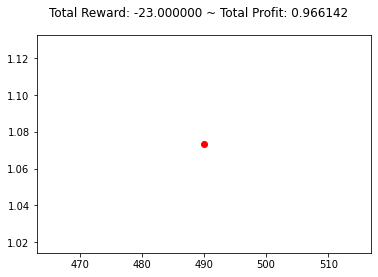

{'total_reward': -22.000000000004242, 'total_profit': 0.9658715780472544, 'position': 0}


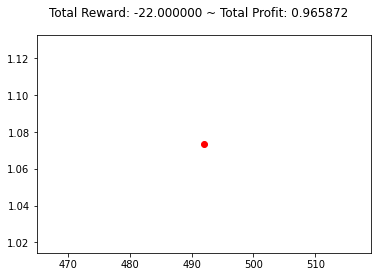

{'total_reward': -20.000000000004462, 'total_profit': 0.965781578832006, 'position': 1}


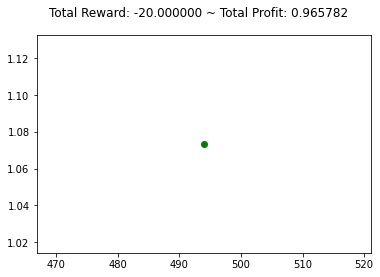

{'total_reward': -19.000000000004572, 'total_profit': 0.965781578832006, 'position': 0}


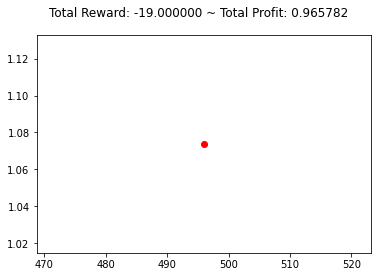

{'total_reward': -24.000000000006242, 'total_profit': 0.9650620544670723, 'position': 1}


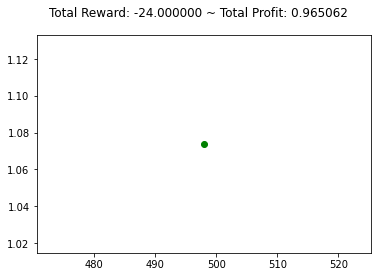

{'total_reward': -24.000000000006242, 'total_profit': 0.9650620544670723, 'position': 1}


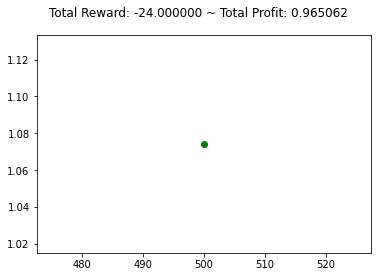

{'total_reward': -22.000000000006462, 'total_profit': 0.9647026941786839, 'position': 1}


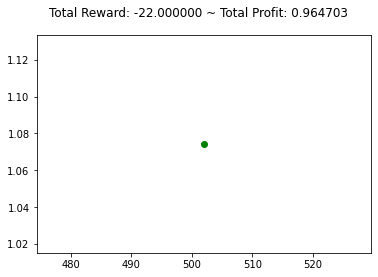

{'total_reward': -26.000000000006022, 'total_profit': 0.9647026941786839, 'position': 0}


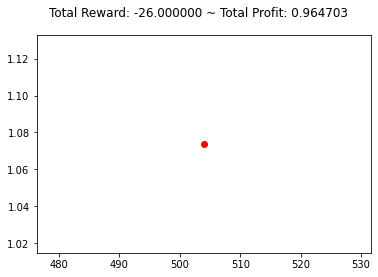

{'total_reward': -26.000000000006022, 'total_profit': 0.9643433673534009, 'position': 0}


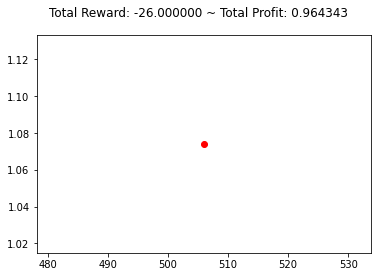

{'total_reward': -23.000000000006352, 'total_profit': 0.9643433673534009, 'position': 1}


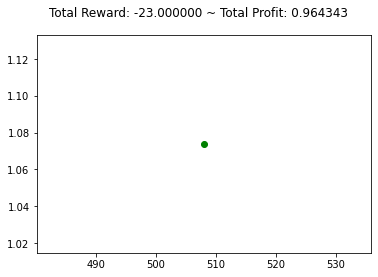

{'total_reward': -19.000000000006793, 'total_profit': 0.9643433673534009, 'position': 0}


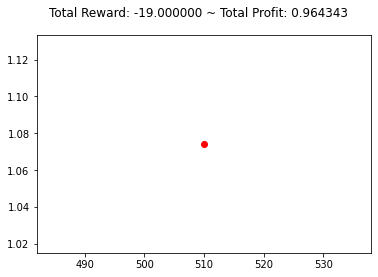

{'total_reward': -19.000000000006793, 'total_profit': 0.9638945432971069, 'position': 0}


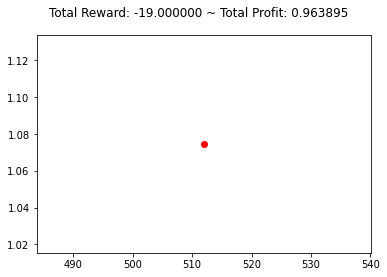

{'total_reward': -21.000000000006573, 'total_profit': 0.9634460951053803, 'position': 1}


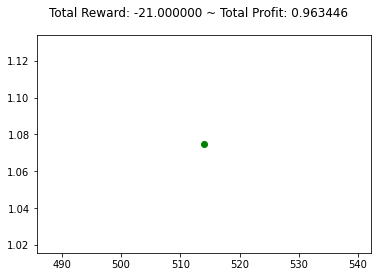

{'total_reward': -25.000000000006132, 'total_profit': 0.9634460951053803, 'position': 0}


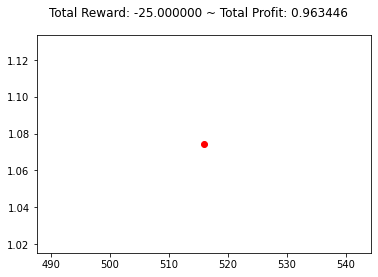

{'total_reward': -30.00000000000558, 'total_profit': 0.9627289785478027, 'position': 1}


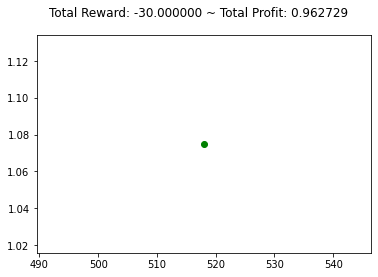

{'total_reward': -30.00000000000558, 'total_profit': 0.9627289785478027, 'position': 1}


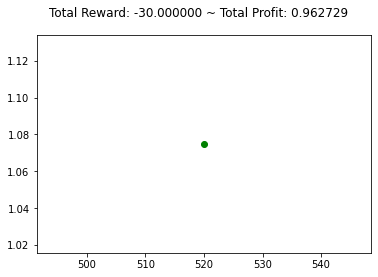

{'total_reward': -30.00000000000558, 'total_profit': 0.9627289785478027, 'position': 0}


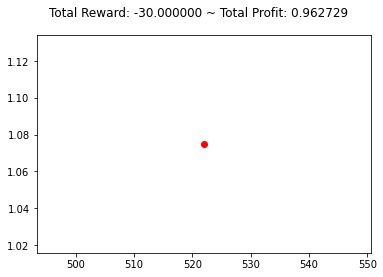

{'total_reward': -32.00000000000536, 'total_profit': 0.9622811976275479, 'position': 1}


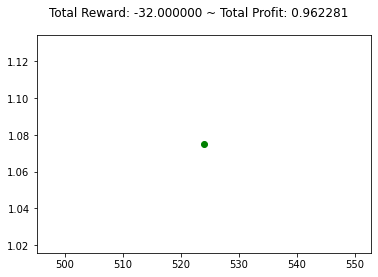

{'total_reward': -35.00000000000503, 'total_profit': 0.9619231061966697, 'position': 1}


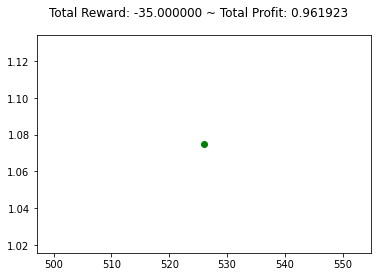

{'total_reward': -35.00000000000503, 'total_profit': 0.9619231061966697, 'position': 1}


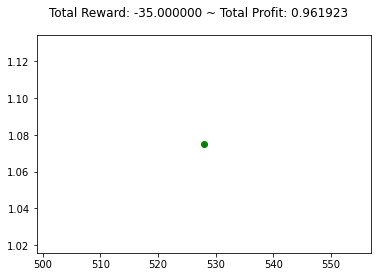

{'total_reward': -35.00000000000503, 'total_profit': 0.9619231061966697, 'position': 1}


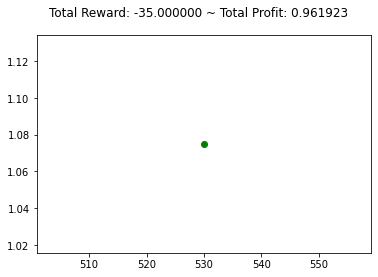

{'total_reward': -35.00000000000503, 'total_profit': 0.9619231061966697, 'position': 1}


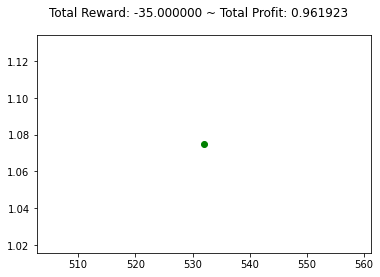

{'total_reward': -26.000000000006022, 'total_profit': 0.9621021019365649, 'position': 1}


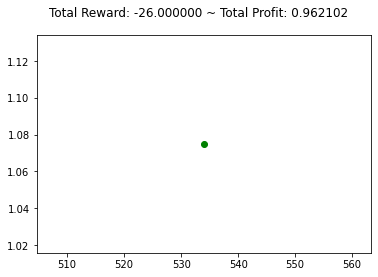

{'total_reward': -27.00000000000591, 'total_profit': 0.9619230229040964, 'position': 1}


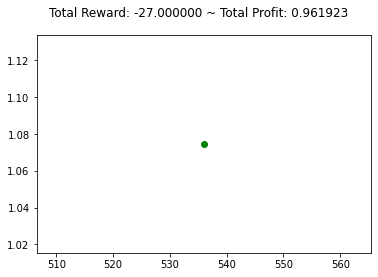

{'total_reward': -30.00000000000558, 'total_profit': 0.9619230229040964, 'position': 0}


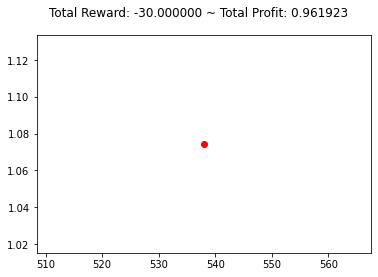

{'total_reward': -26.000000000006022, 'total_profit': 0.962012604113158, 'position': 0}


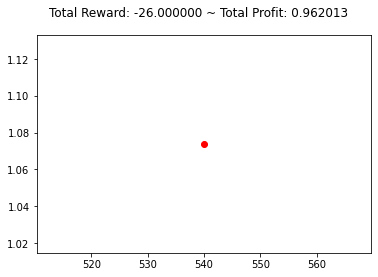

{'total_reward': -26.000000000006022, 'total_profit': 0.9616542792769114, 'position': 0}


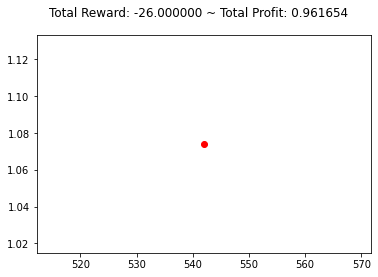

{'total_reward': -28.0000000000058, 'total_profit': 0.9612066651085643, 'position': 1}


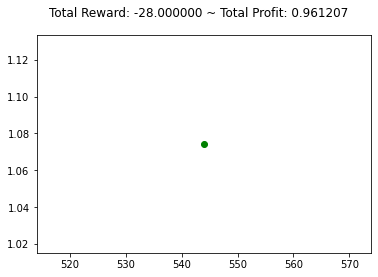

{'total_reward': -28.0000000000058, 'total_profit': 0.9612066651085643, 'position': 1}


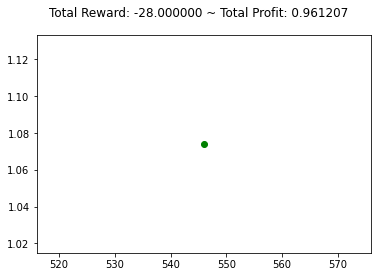

{'total_reward': -29.00000000000569, 'total_profit': 0.9612066651085643, 'position': 0}


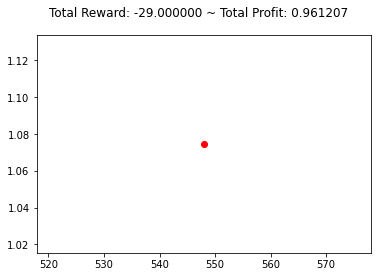

{'total_reward': -35.00000000000503, 'total_profit': 0.9604017093082503, 'position': 1}


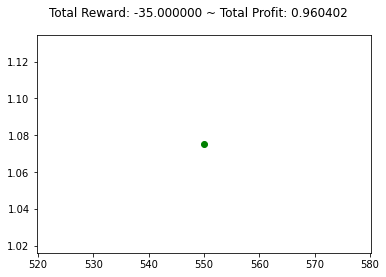

{'total_reward': -33.00000000000525, 'total_profit': 0.9604017093082503, 'position': 0}


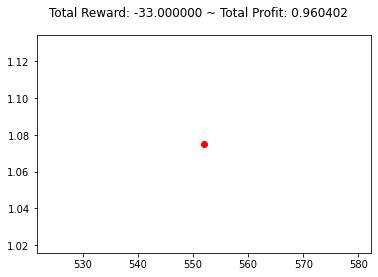

{'total_reward': -34.000000000005144, 'total_profit': 0.9600443505326939, 'position': 1}


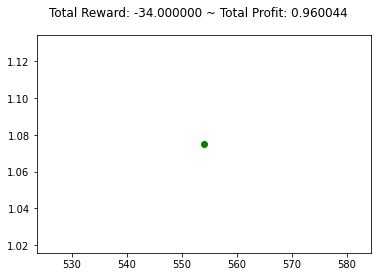

{'total_reward': -29.000000000005695, 'total_profit': 0.9600443505326939, 'position': 0}


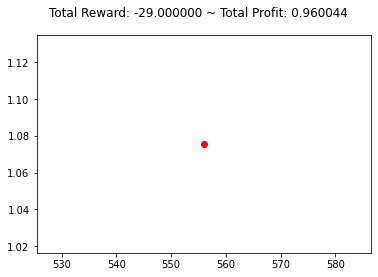

{'total_reward': -28.000000000005805, 'total_profit': 0.9598658040661638, 'position': 1}


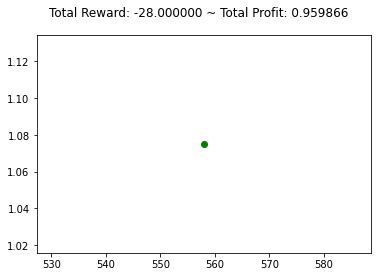

{'total_reward': -28.000000000005805, 'total_profit': 0.9598658040661638, 'position': 1}


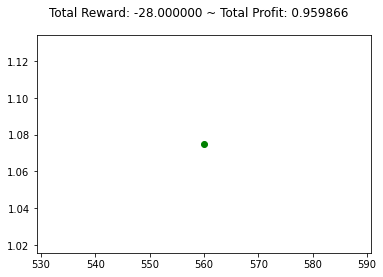

{'total_reward': -33.00000000000526, 'total_profit': 0.9598658040661638, 'position': 0}


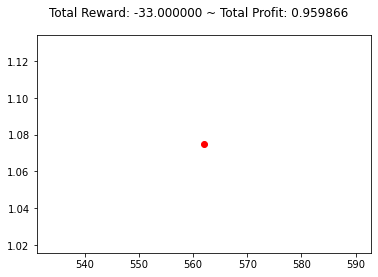

{'total_reward': -33.00000000000526, 'total_profit': 0.9598658040661638, 'position': 0}


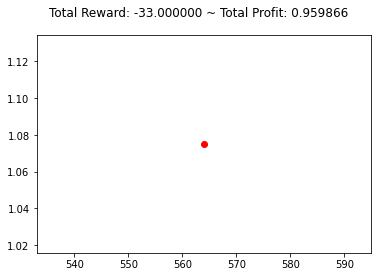

{'total_reward': -36.00000000000493, 'total_profit': 0.9593301646665734, 'position': 1}


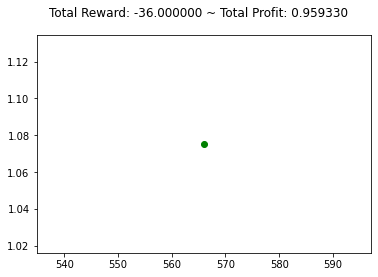

{'total_reward': -36.00000000000493, 'total_profit': 0.9590624944197357, 'position': 1}


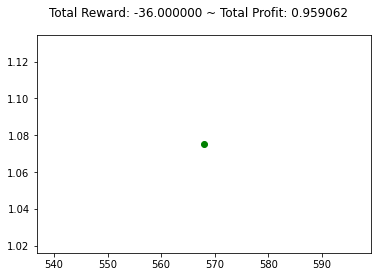

{'total_reward': -35.000000000005045, 'total_profit': 0.9590624944197357, 'position': 0}


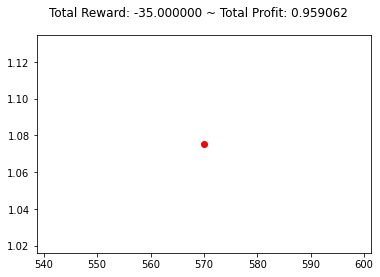

{'total_reward': -37.000000000004825, 'total_profit': 0.9586166262214931, 'position': 1}


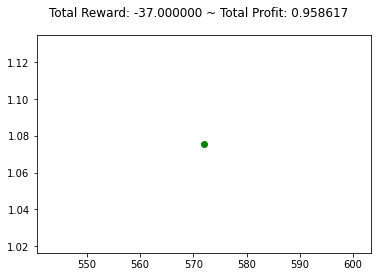

{'total_reward': -37.000000000004825, 'total_profit': 0.9586166262214931, 'position': 1}


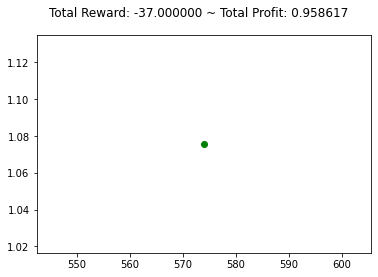

{'total_reward': -37.000000000004825, 'total_profit': 0.9586166262214931, 'position': 0}


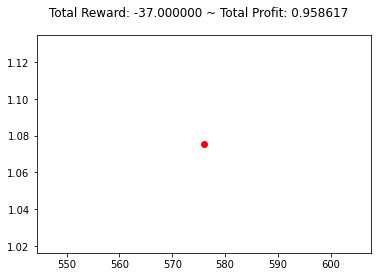

{'total_reward': -38.00000000000472, 'total_profit': 0.9582601306371789, 'position': 1}


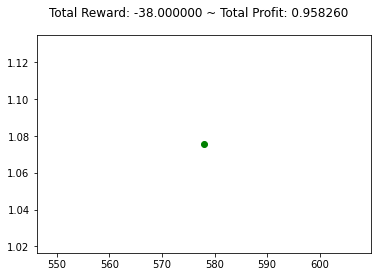

{'total_reward': -39.000000000004604, 'total_profit': 0.9582601306371789, 'position': 0}


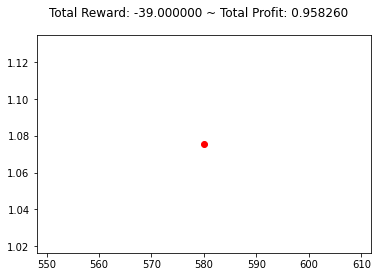

{'total_reward': -41.00000000000661, 'total_profit': 0.957814718286785, 'position': 1}


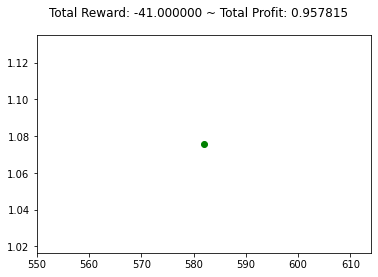

{'total_reward': -41.00000000000661, 'total_profit': 0.957814718286785, 'position': 0}


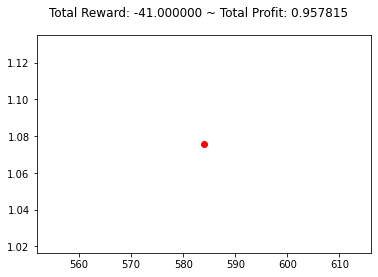

{'total_reward': -38.0000000000025, 'total_profit': 0.9576366196035783, 'position': 0}


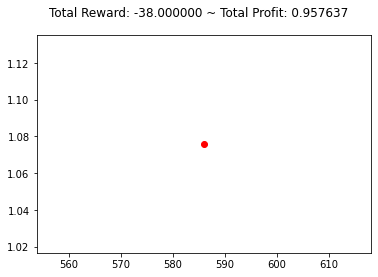

{'total_reward': -38.0000000000025, 'total_profit': 0.9576366196035783, 'position': 0}


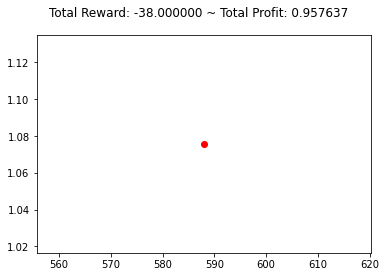

{'total_reward': -37.000000000002615, 'total_profit': 0.9574585705899865, 'position': 1}


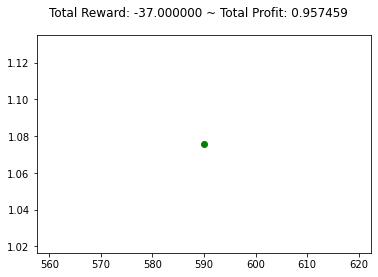

{'total_reward': -32.00000000000316, 'total_profit': 0.9573695709087642, 'position': 1}


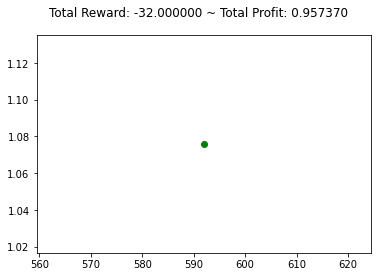

{'total_reward': -29.000000000003492, 'total_profit': 0.9573695709087642, 'position': 0}


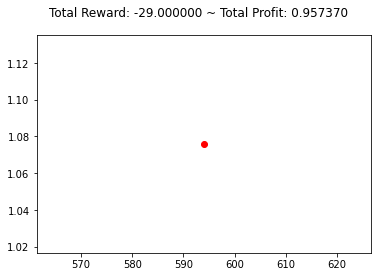

{'total_reward': -30.000000000003382, 'total_profit': 0.9570137375800488, 'position': 0}


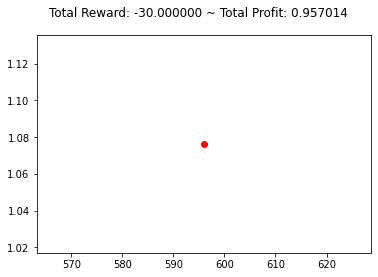

{'total_reward': -29.000000000003492, 'total_profit': 0.9568358705160994, 'position': 1}


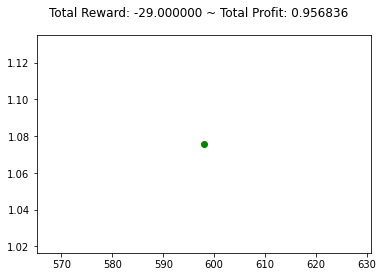

{'total_reward': -35.00000000000505, 'total_profit': 0.9568358705160994, 'position': 0}


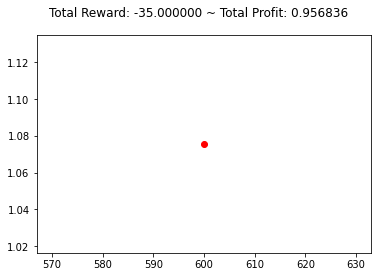

{'total_reward': -38.00000000000916, 'total_profit': 0.9563911201811937, 'position': 0}


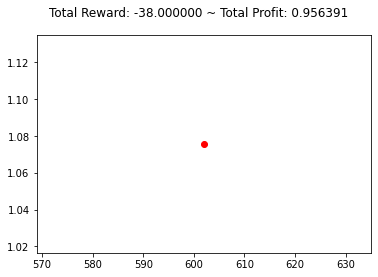

{'total_reward': -35.00000000000949, 'total_profit': 0.9563911201811937, 'position': 1}


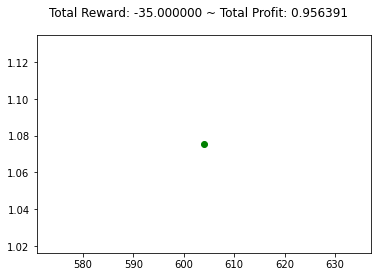

{'total_reward': -32.00000000000982, 'total_profit': 0.9563911201811937, 'position': 0}


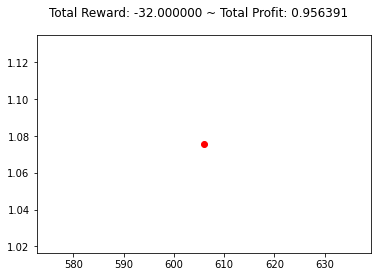

{'total_reward': -33.00000000001193, 'total_profit': 0.9560354852940759, 'position': 1}


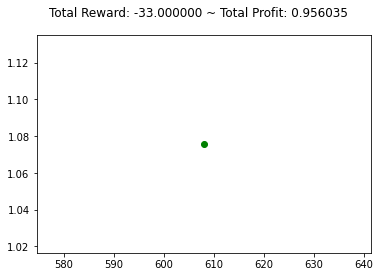

{'total_reward': -32.00000000001204, 'total_profit': 0.9557688830951653, 'position': 1}


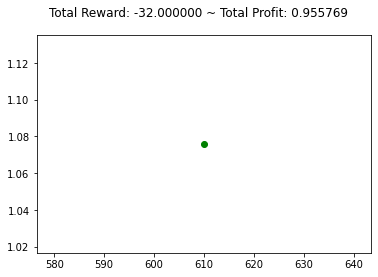

{'total_reward': -33.00000000001192, 'total_profit': 0.9555023304643868, 'position': 1}


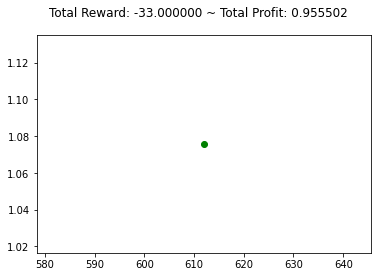

{'total_reward': -33.00000000001192, 'total_profit': 0.9555023304643868, 'position': 1}


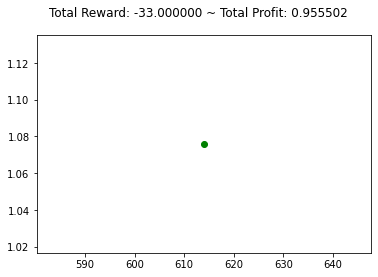

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


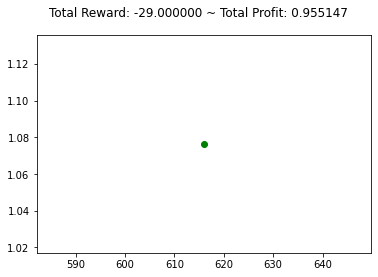

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


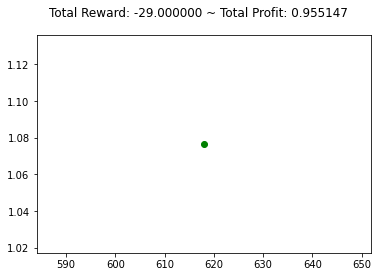

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


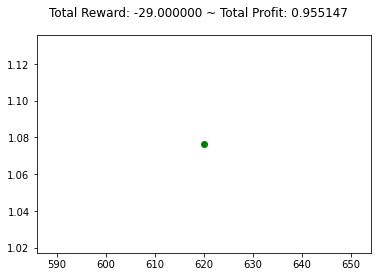

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


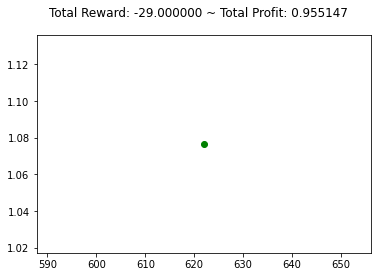

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


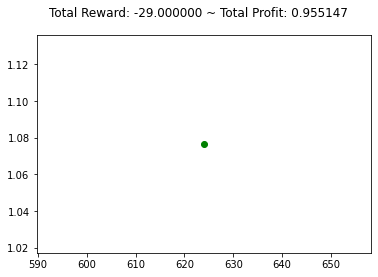

{'total_reward': -29.000000000012363, 'total_profit': 0.9551472241444149, 'position': 1}


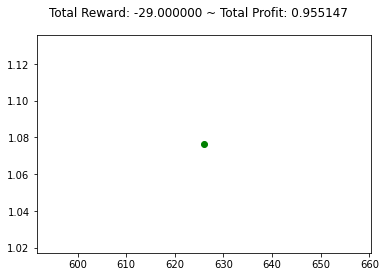

{'total_reward': -27.000000000012584, 'total_profit': 0.9548810428464648, 'position': 1}


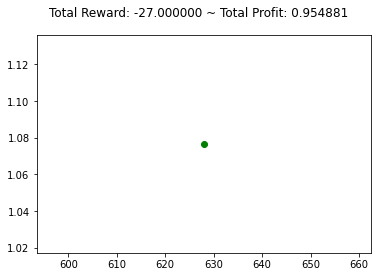

{'total_reward': -24.000000000012914, 'total_profit': 0.9545263980766056, 'position': 1}


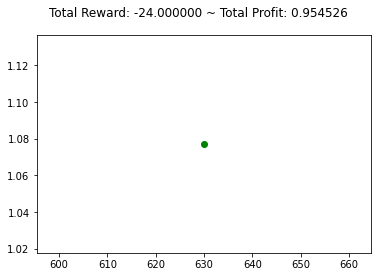

{'total_reward': -27.000000000012584, 'total_profit': 0.9545263980766056, 'position': 0}


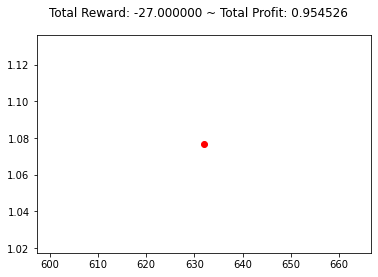

{'total_reward': -28.000000000012474, 'total_profit': 0.9541718191768744, 'position': 1}


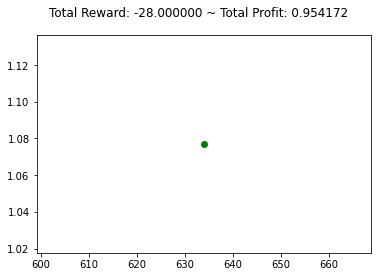

{'total_reward': -28.000000000012474, 'total_profit': 0.9541718191768744, 'position': 0}


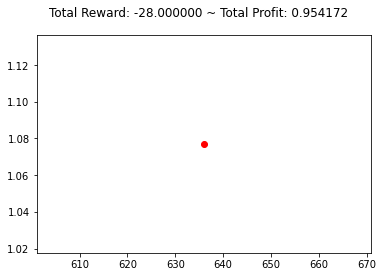

{'total_reward': -28.000000000012474, 'total_profit': 0.9541718191768744, 'position': 0}


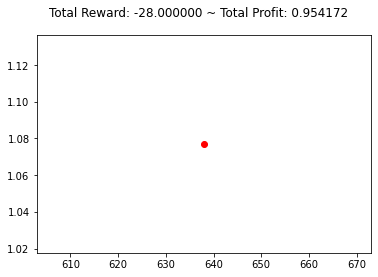

{'total_reward': -28.000000000012474, 'total_profit': 0.9541718191768744, 'position': 0}


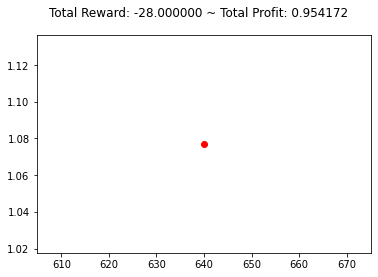

{'total_reward': -28.000000000012474, 'total_profit': 0.9539059837889167, 'position': 0}


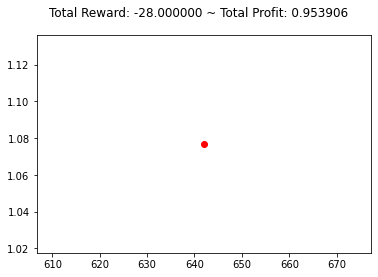

{'total_reward': -25.000000000012804, 'total_profit': 0.9539059837889167, 'position': 1}


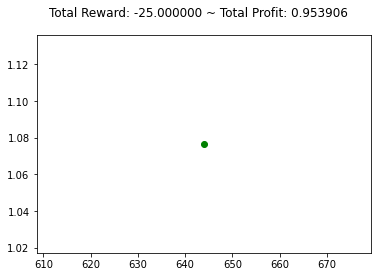

{'total_reward': -25.000000000012804, 'total_profit': 0.9539059837889167, 'position': 0}


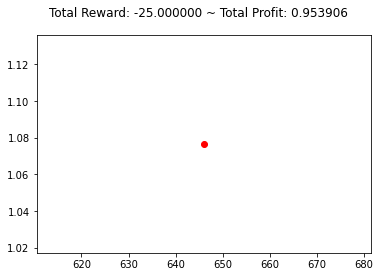

{'total_reward': -25.000000000012804, 'total_profit': 0.9539059837889167, 'position': 0}


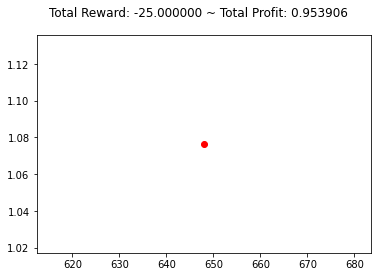

{'total_reward': -24.000000000012914, 'total_profit': 0.9537287437324712, 'position': 1}


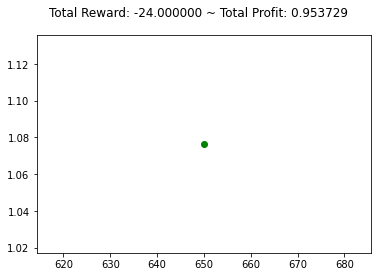

{'total_reward': -20.000000000013355, 'total_profit': 0.9537287437324712, 'position': 0}


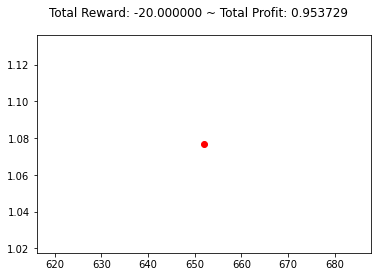

{'total_reward': -20.000000000013355, 'total_profit': 0.9537287437324712, 'position': 0}


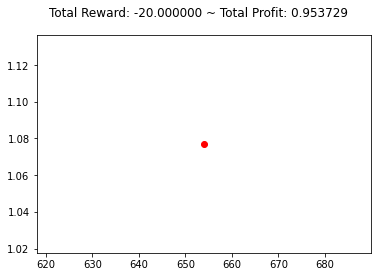

{'total_reward': -22.000000000013134, 'total_profit': 0.9533744940365914, 'position': 0}


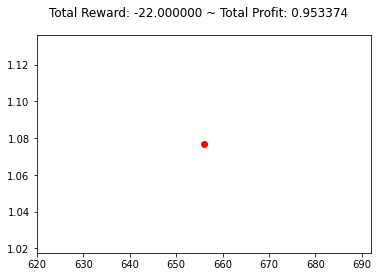

{'total_reward': -22.000000000013134, 'total_profit': 0.9533744940365914, 'position': 0}


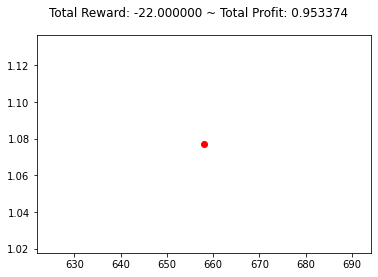

{'total_reward': -25.000000000012804, 'total_profit': 0.9528434154956741, 'position': 1}


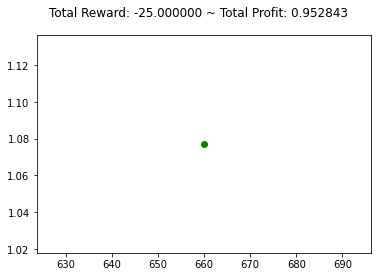

{'total_reward': -27.000000000012584, 'total_profit': 0.9528434154956741, 'position': 0}


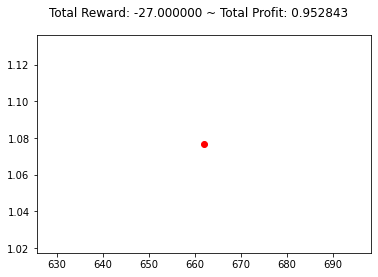

{'total_reward': -25.000000000012804, 'total_profit': 0.9527549188470723, 'position': 1}


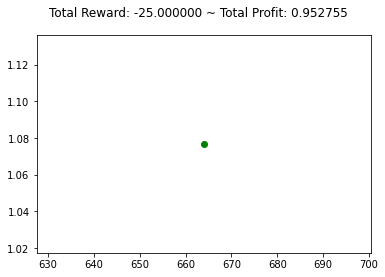

{'total_reward': -25.000000000012804, 'total_profit': 0.9527549188470723, 'position': 1}


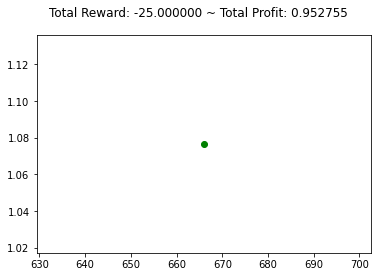

{'total_reward': -19.000000000013465, 'total_profit': 0.9528434237164496, 'position': 1}


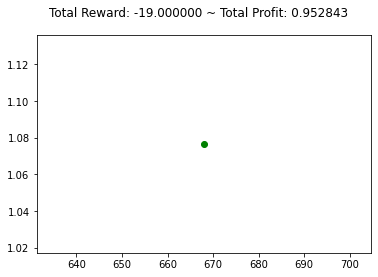

{'total_reward': -16.000000000013795, 'total_profit': 0.9528434237164496, 'position': 0}


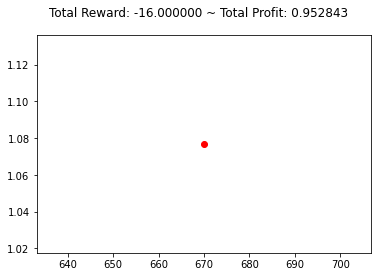

{'total_reward': -17.000000000013685, 'total_profit': 0.9524895028607652, 'position': 1}


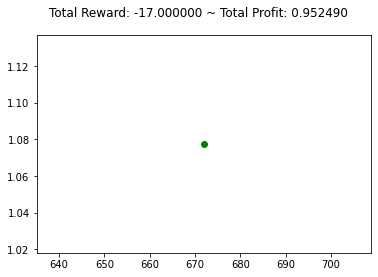

{'total_reward': -17.000000000013685, 'total_profit': 0.9524895028607652, 'position': 1}


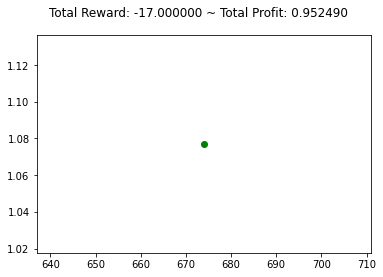

{'total_reward': -17.000000000013685, 'total_profit': 0.9524895028607652, 'position': 0}


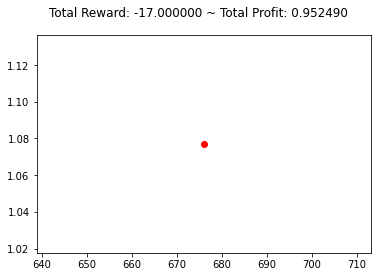

{'total_reward': -18.000000000013575, 'total_profit': 0.952224160813353, 'position': 0}


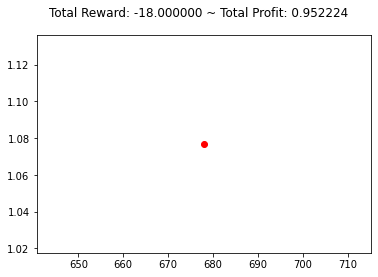

{'total_reward': -18.000000000013575, 'total_profit': 0.952224160813353, 'position': 0}


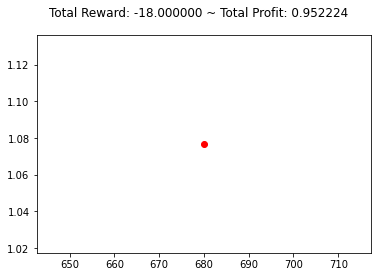

{'total_reward': -18.000000000013575, 'total_profit': 0.951958868049382, 'position': 1}


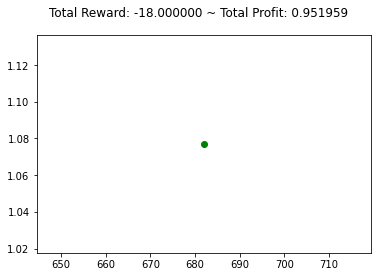

{'total_reward': -14.000000000014015, 'total_profit': 0.951958868049382, 'position': 0}


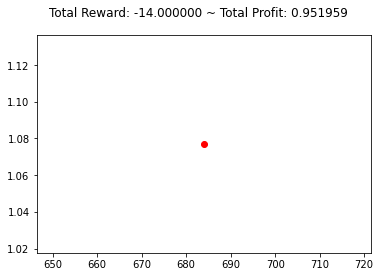

{'total_reward': -9.000000000014566, 'total_profit': 0.952047274333562, 'position': 0}


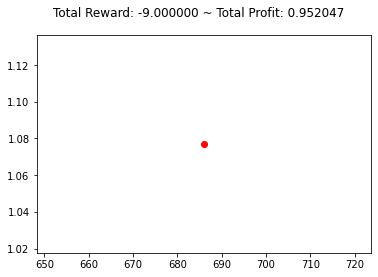

{'total_reward': -10.000000000014456, 'total_profit': 0.9516936820311169, 'position': 1}


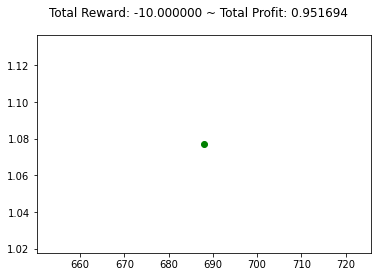

{'total_reward': -12.000000000014236, 'total_profit': 0.9516936820311169, 'position': 0}


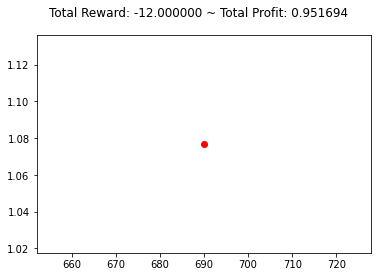

{'total_reward': -12.000000000014236, 'total_profit': 0.9516936820311169, 'position': 0}


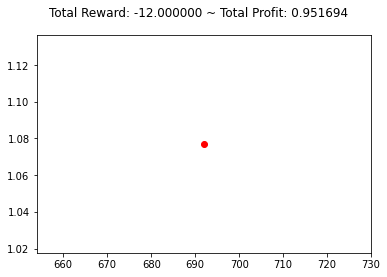

{'total_reward': -13.000000000014126, 'total_profit': 0.9513401882314954, 'position': 1}


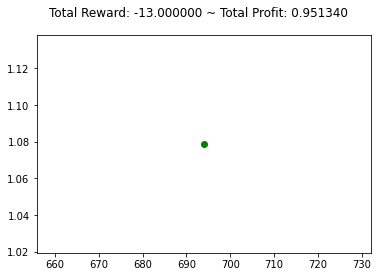

{'total_reward': 8.999999999985672, 'total_profit': 0.9513401882314954, 'position': 0}


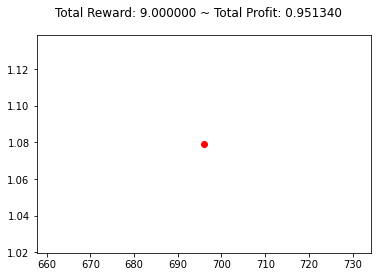

{'total_reward': 6.999999999985892, 'total_profit': 0.9510757066667939, 'position': 0}


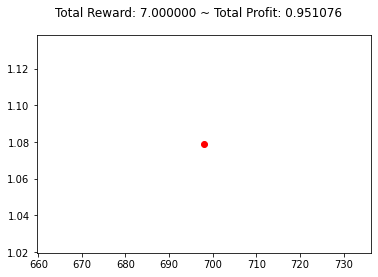

{'total_reward': 1.9999999999864428, 'total_profit': 0.950370814536598, 'position': 1}


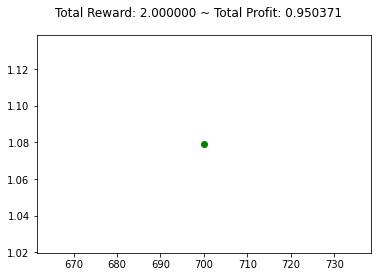

{'total_reward': -6.000000000012676, 'total_profit': 0.950370814536598, 'position': 0}


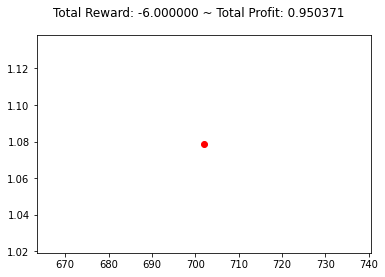

{'total_reward': -5.000000000012786, 'total_profit': 0.9501945751644078, 'position': 1}


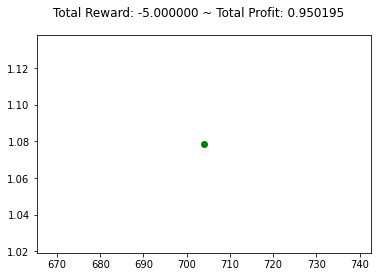

{'total_reward': -5.000000000012786, 'total_profit': 0.9501945751644078, 'position': 1}


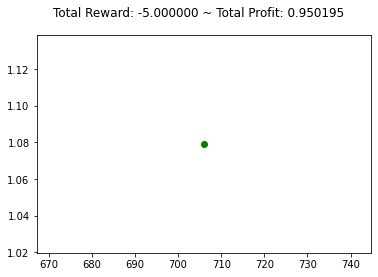

{'total_reward': -5.000000000012786, 'total_profit': 0.9501945751644078, 'position': 1}


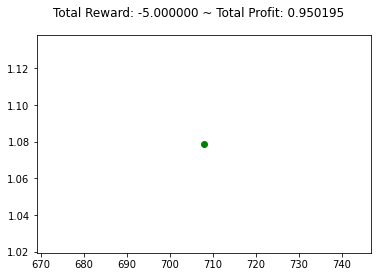

{'total_reward': 0.999999999986553, 'total_profit': 0.9501945751644078, 'position': 0}


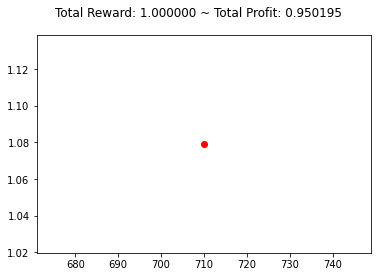

{'total_reward': 0.999999999986553, 'total_profit': 0.9501945751644078, 'position': 0}


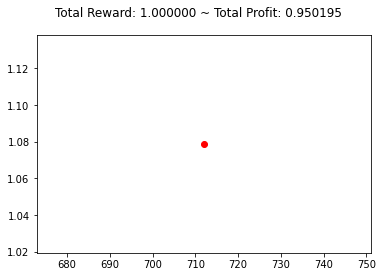

{'total_reward': 4.999999999986112, 'total_profit': 0.9502826621742496, 'position': 1}


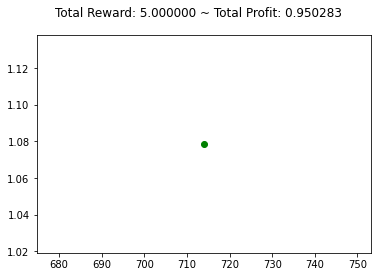

{'total_reward': 4.999999999986112, 'total_profit': 0.9502826621742496, 'position': 1}


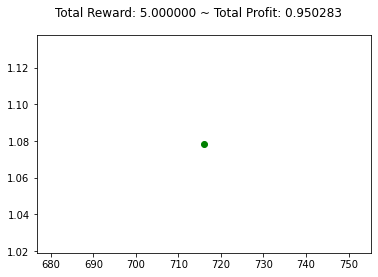

{'total_reward': -1.333688715021708e-11, 'total_profit': 0.9502826621742496, 'position': 0}


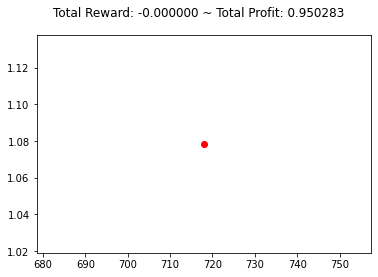

{'total_reward': -5.000000000012786, 'total_profit': 0.9496659387702798, 'position': 0}


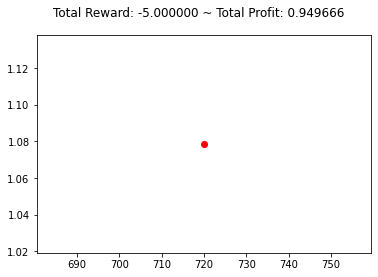

{'total_reward': -5.000000000012786, 'total_profit': 0.9496659387702798, 'position': 0}


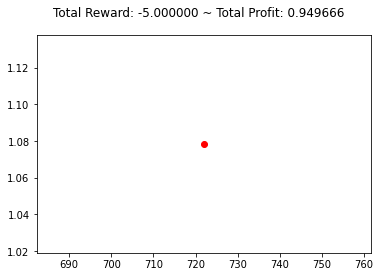

{'total_reward': -5.000000000012786, 'total_profit': 0.9496659387702798, 'position': 0}


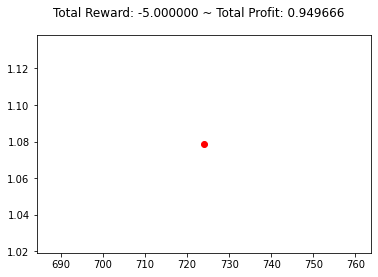

{'total_reward': -10.000000000012236, 'total_profit': 0.9489618305672991, 'position': 0}


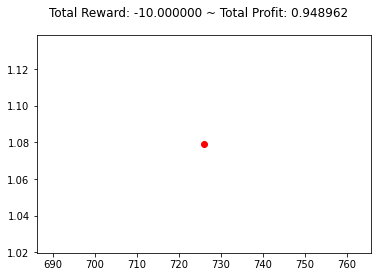

{'total_reward': -13.000000000011905, 'total_profit': 0.9484342876243358, 'position': 1}


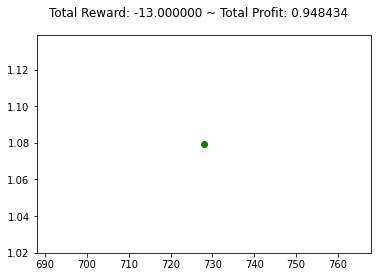

{'total_reward': -16.000000000013795, 'total_profit': 0.9478194478379521, 'position': 1}


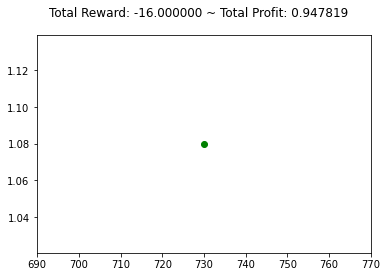

{'total_reward': -14.000000000014015, 'total_profit': 0.9478194478379521, 'position': 0}


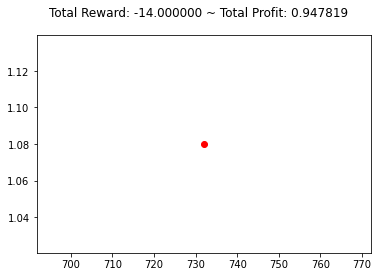

{'total_reward': -11.000000000014346, 'total_profit': 0.9474684360990993, 'position': 0}


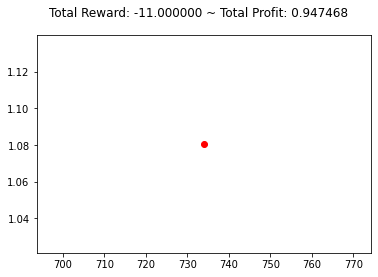

{'total_reward': -17.000000000013685, 'total_profit': 0.947205372211242, 'position': 0}


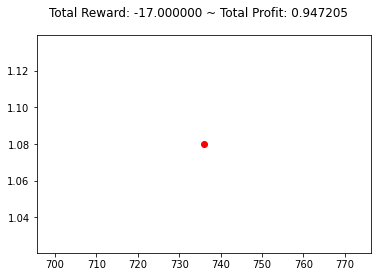

{'total_reward': -16.000000000013795, 'total_profit': 0.9470299313199267, 'position': 1}


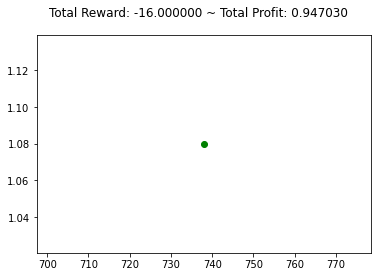

{'total_reward': -16.000000000013795, 'total_profit': 0.9470299313199267, 'position': 0}


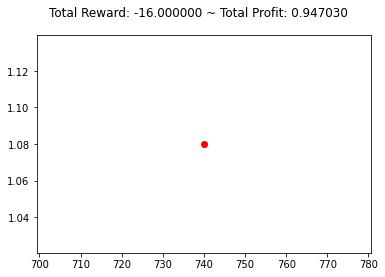

{'total_reward': -18.000000000013575, 'total_profit': 0.9466791470134837, 'position': 0}


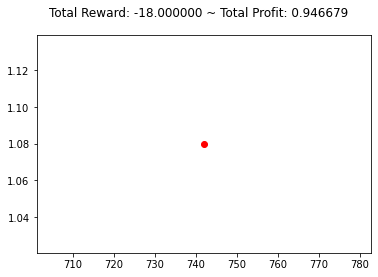

{'total_reward': -16.000000000011575, 'total_profit': 0.9465914590598886, 'position': 1}


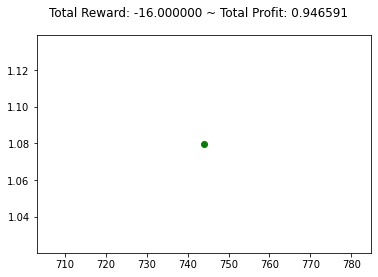

{'total_reward': -16.000000000011575, 'total_profit': 0.9465914590598886, 'position': 1}


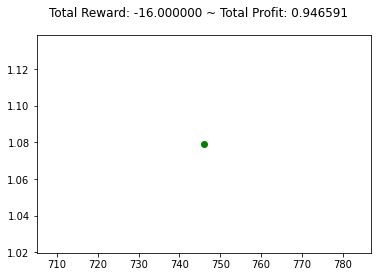

{'total_reward': -16.000000000011575, 'total_profit': 0.9465914590598886, 'position': 1}


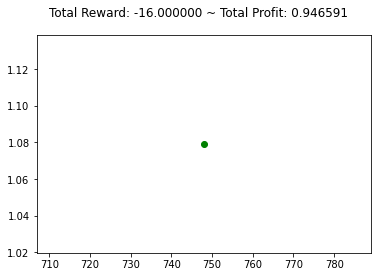

{'total_reward': -22.000000000010914, 'total_profit': 0.9465914590598886, 'position': 0}


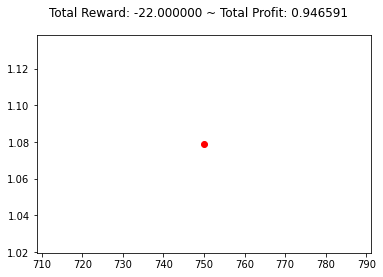

{'total_reward': -22.000000000010914, 'total_profit': 0.9463282732974068, 'position': 1}


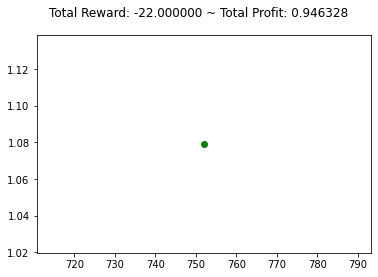

{'total_reward': -22.000000000010914, 'total_profit': 0.9463282732974068, 'position': 0}


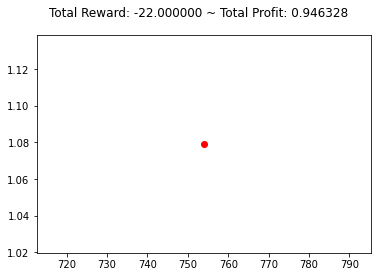

{'total_reward': -25.000000000010584, 'total_profit': 0.9458898335859087, 'position': 0}


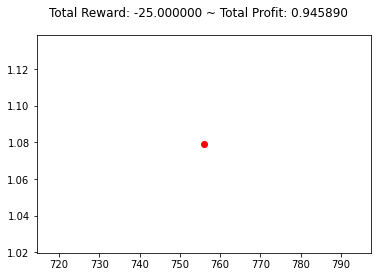

{'total_reward': -25.000000000010584, 'total_profit': 0.9458898335859087, 'position': 0}


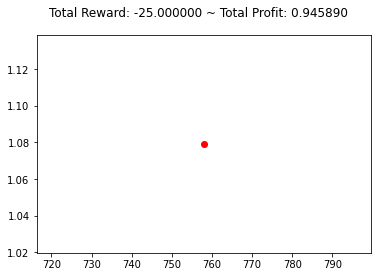

{'total_reward': -25.000000000010584, 'total_profit': 0.9456268672713172, 'position': 1}


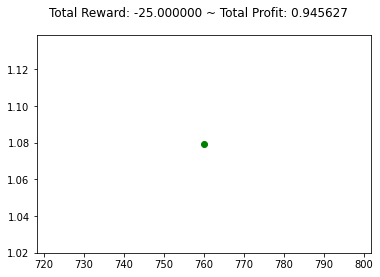

{'total_reward': -25.000000000010584, 'total_profit': 0.9456268672713172, 'position': 1}


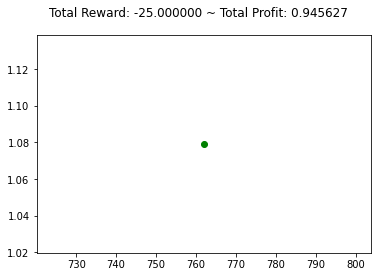

{'total_reward': -25.000000000010584, 'total_profit': 0.9455392037070944, 'position': 1}


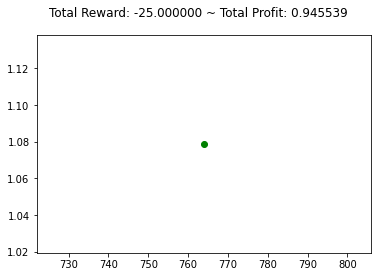

{'total_reward': -25.000000000010584, 'total_profit': 0.9455392037070944, 'position': 1}


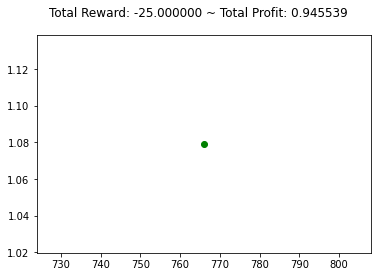

{'total_reward': -22.000000000010914, 'total_profit': 0.9452763105086588, 'position': 1}


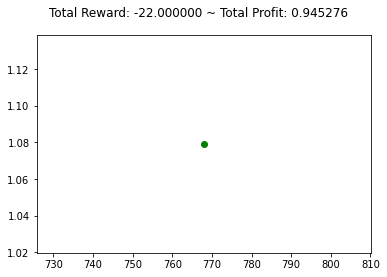

{'total_reward': -27.000000000010363, 'total_profit': 0.9446632340541458, 'position': 1}


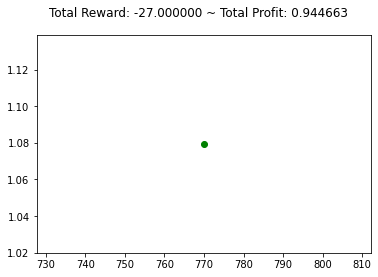

{'total_reward': -23.000000000008583, 'total_profit': 0.9446632340541458, 'position': 0}


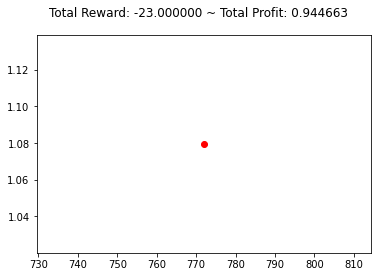

{'total_reward': -22.000000000006473, 'total_profit': 0.9444882316024873, 'position': 1}


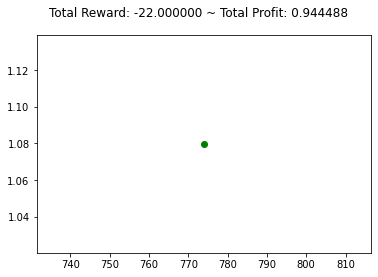

{'total_reward': -22.000000000006473, 'total_profit': 0.9444882316024873, 'position': 1}


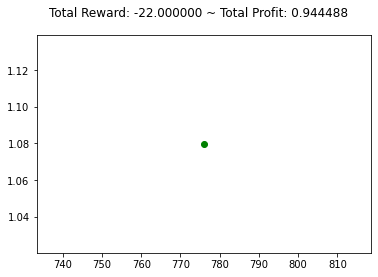

{'total_reward': -25.000000000006143, 'total_profit': 0.9444882316024873, 'position': 0}


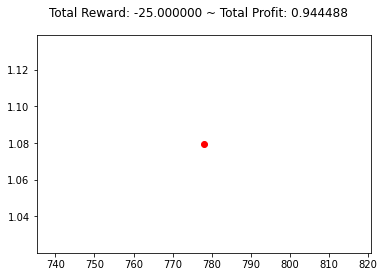

{'total_reward': -32.00000000000981, 'total_profit': 0.9438758932102285, 'position': 0}


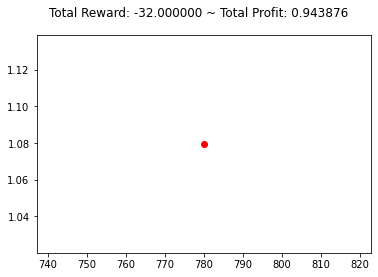

{'total_reward': -35.0000000000117, 'total_profit': 0.943351372013668, 'position': 1}


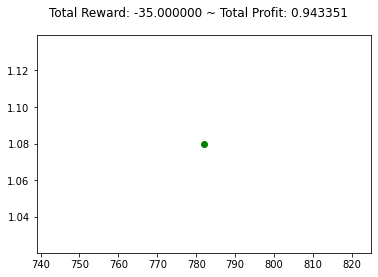

{'total_reward': -33.00000000001192, 'total_profit': 0.943351372013668, 'position': 0}


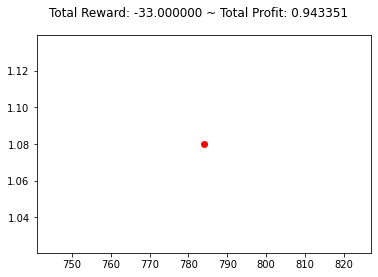

{'total_reward': -30.000000000010033, 'total_profit': 0.9433513720136683, 'position': 0}


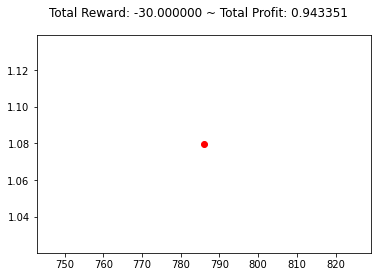

{'total_reward': -30.000000000010033, 'total_profit': 0.9430892328773176, 'position': 1}


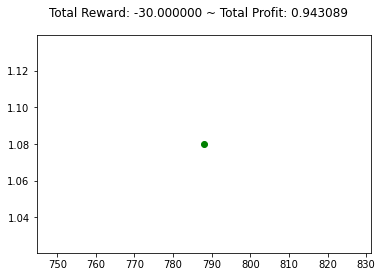

{'total_reward': -26.000000000008253, 'total_profit': 0.9430892328773176, 'position': 0}


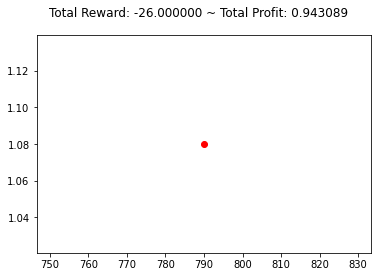

{'total_reward': -25.000000000008363, 'total_profit': 0.9429145705506434, 'position': 1}


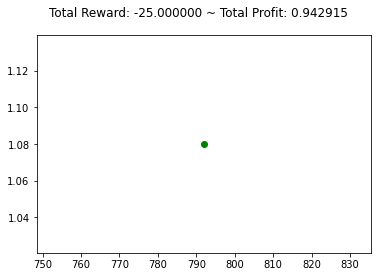

{'total_reward': -28.000000000008033, 'total_profit': 0.9420423091532792, 'position': 1}


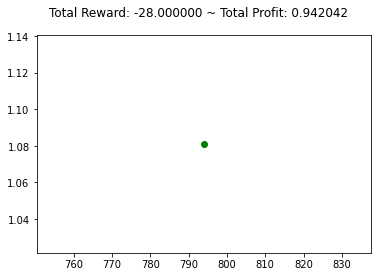

{'total_reward': -27.000000000008143, 'total_profit': 0.9420423091532792, 'position': 0}


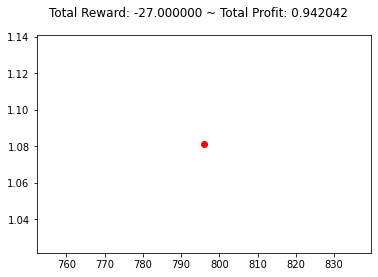

{'total_reward': -28.000000000008033, 'total_profit': 0.9416937918357975, 'position': 1}


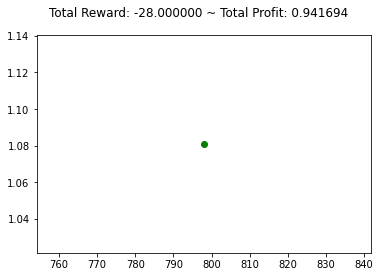

{'total_reward': -32.00000000000759, 'total_profit': 0.9416937918357975, 'position': 0}


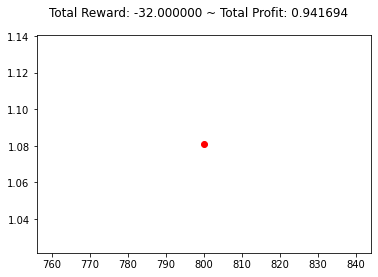

{'total_reward': -32.00000000000759, 'total_profit': 0.9414324038476861, 'position': 0}


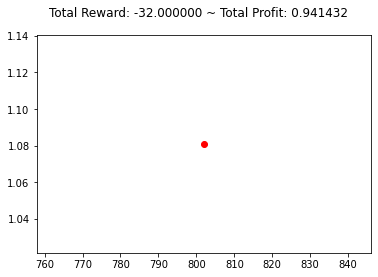

{'total_reward': -31.0000000000077, 'total_profit': 0.941258177438165, 'position': 1}


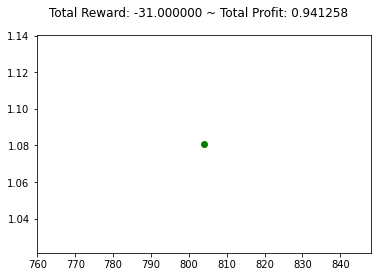

{'total_reward': -37.000000000007034, 'total_profit': 0.941258177438165, 'position': 0}


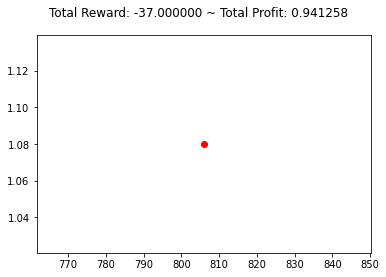

{'total_reward': -37.000000000007034, 'total_profit': 0.941258177438165, 'position': 0}


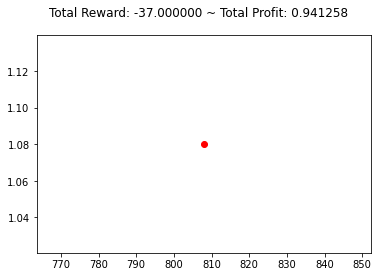

{'total_reward': -37.000000000007034, 'total_profit': 0.941258177438165, 'position': 0}


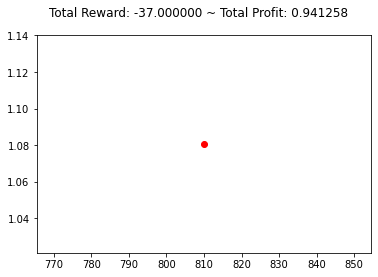

{'total_reward': -45.00000000000615, 'total_profit': 0.940387287192571, 'position': 0}


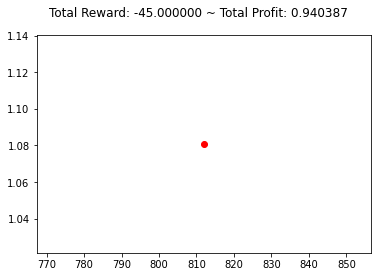

{'total_reward': -45.00000000000615, 'total_profit': 0.940387287192571, 'position': 0}


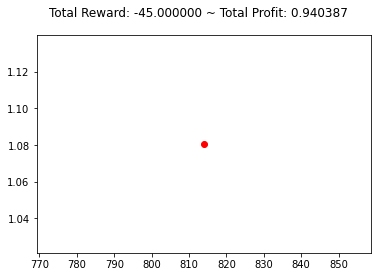

{'total_reward': -45.00000000000615, 'total_profit': 0.940387287192571, 'position': 0}


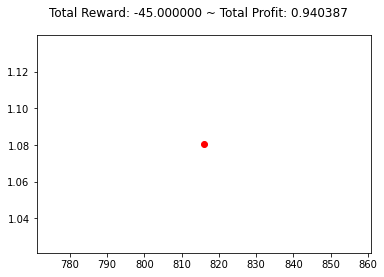

{'total_reward': -43.000000000006374, 'total_profit': 0.9403002545884811, 'position': 1}


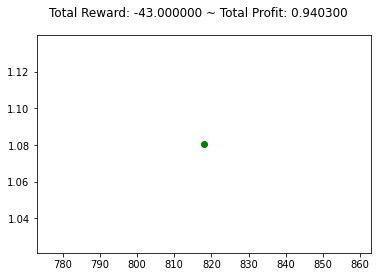

{'total_reward': -43.000000000006374, 'total_profit': 0.9403002545884811, 'position': 1}


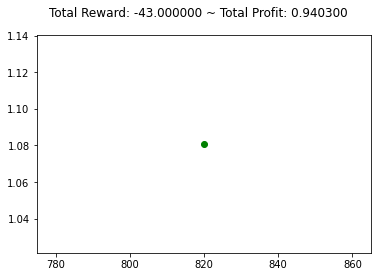

{'total_reward': -40.00000000000671, 'total_profit': 0.9400392534075258, 'position': 1}


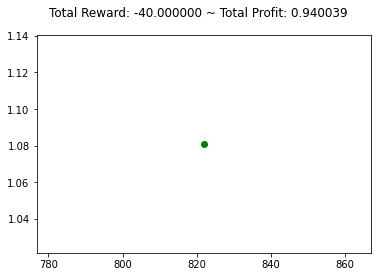

{'total_reward': -40.00000000000671, 'total_profit': 0.9400392534075258, 'position': 1}


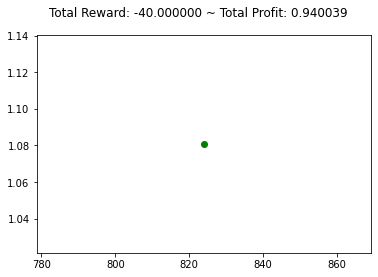

{'total_reward': -44.00000000000627, 'total_profit': 0.9400392534075258, 'position': 0}


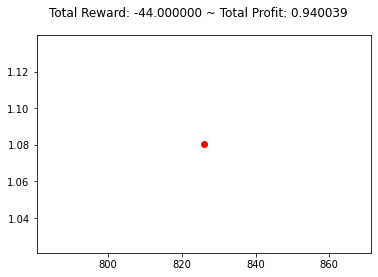

{'total_reward': -44.00000000000627, 'total_profit': 0.9400392534075258, 'position': 0}


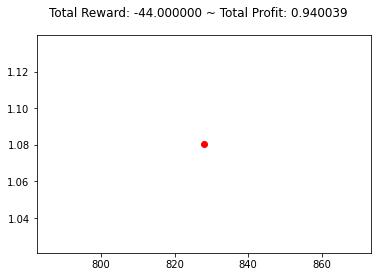

{'total_reward': -46.00000000000605, 'total_profit': 0.9396042916948628, 'position': 1}


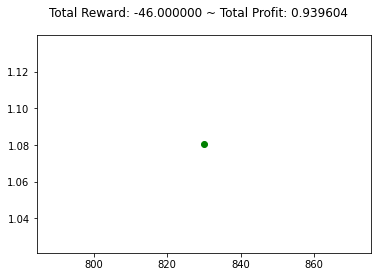

{'total_reward': -46.00000000000605, 'total_profit': 0.9396042916948628, 'position': 1}


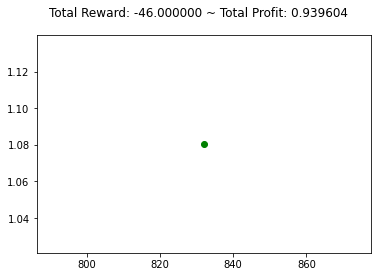

{'total_reward': -45.00000000000615, 'total_profit': 0.9393434595605901, 'position': 1}


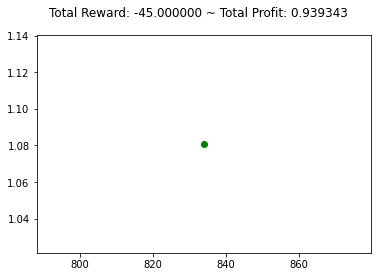

{'total_reward': -45.00000000000615, 'total_profit': 0.9393434595605901, 'position': 1}


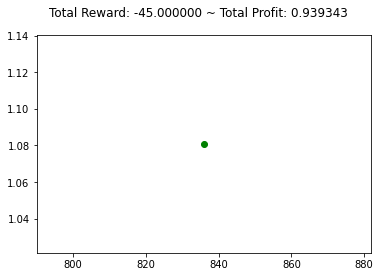

{'total_reward': -46.00000000000604, 'total_profit': 0.9391695714710749, 'position': 1}


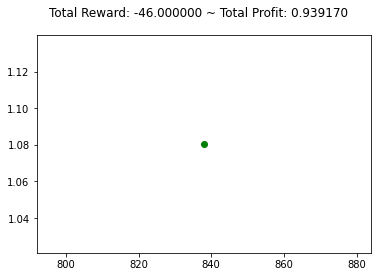

{'total_reward': -47.000000000005926, 'total_profit': 0.9391695714710749, 'position': 0}


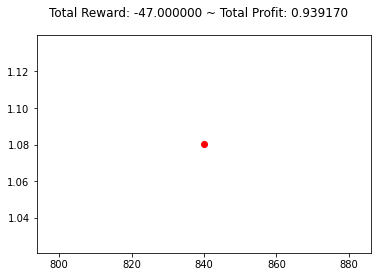

{'total_reward': -49.0000000000057, 'total_profit': 0.9388218596711967, 'position': 0}


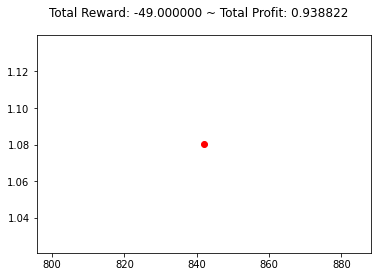

{'total_reward': -50.000000000005585, 'total_profit': 0.9384742766057872, 'position': 1}


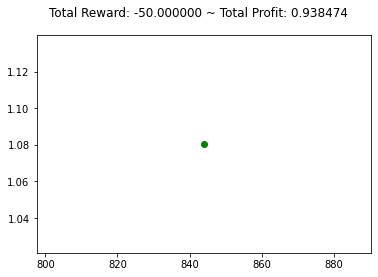

{'total_reward': -50.000000000005585, 'total_profit': 0.9384742766057872, 'position': 0}


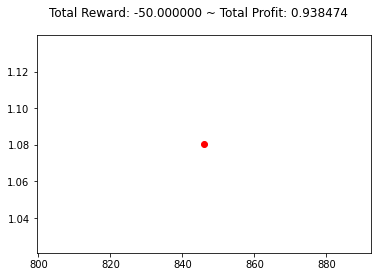

{'total_reward': -50.000000000005585, 'total_profit': 0.9384742766057872, 'position': 0}


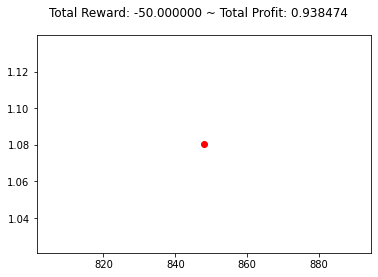

{'total_reward': -50.000000000005585, 'total_profit': 0.9382136858218353, 'position': 1}


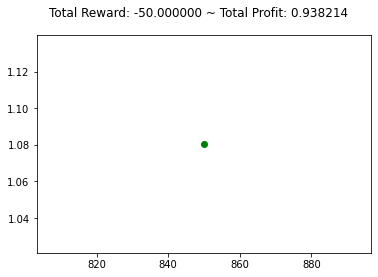

{'total_reward': -50.000000000005585, 'total_profit': 0.9382136858218353, 'position': 1}


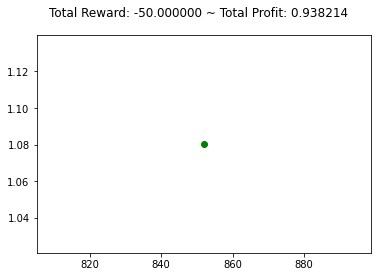

{'total_reward': -47.00000000000591, 'total_profit': 0.9382136858218354, 'position': 1}


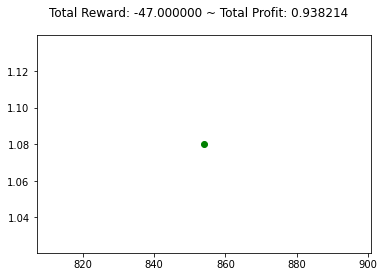

{'total_reward': -41.000000000006565, 'total_profit': 0.9382136858218354, 'position': 1}


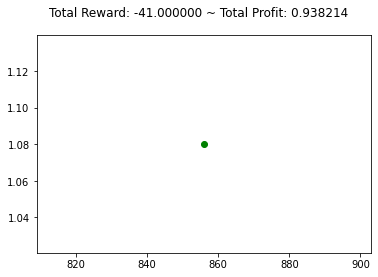

{'total_reward': -45.000000000006125, 'total_profit': 0.9382136858218354, 'position': 0}


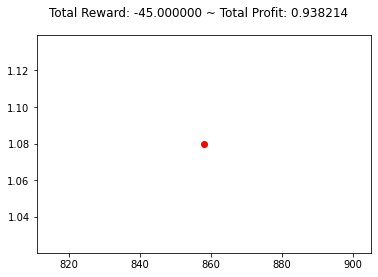

{'total_reward': -41.000000000006565, 'total_profit': 0.9379529984959611, 'position': 0}


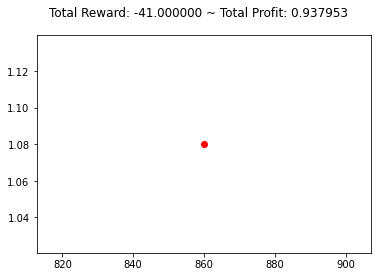

{'total_reward': -38.00000000000689, 'total_profit': 0.9379529984959611, 'position': 1}


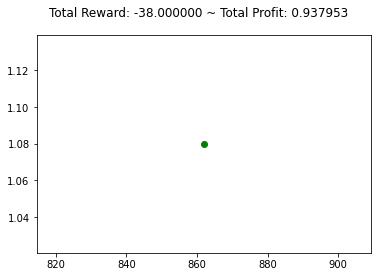

{'total_reward': -36.00000000000711, 'total_profit': 0.9379529984959611, 'position': 0}


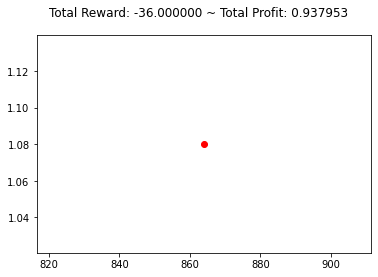

{'total_reward': -38.00000000000689, 'total_profit': 0.9372585400056356, 'position': 0}


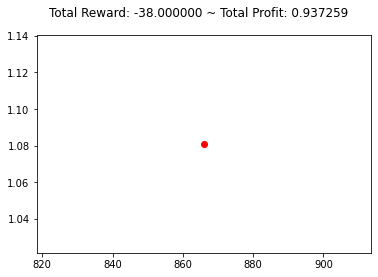

{'total_reward': -34.00000000000733, 'total_profit': 0.9373452910737591, 'position': 1}


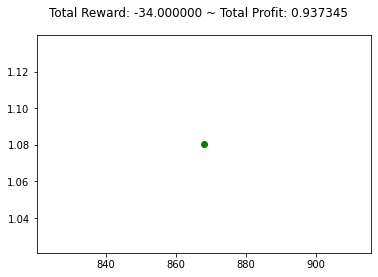

{'total_reward': -34.00000000000733, 'total_profit': 0.9373452910737591, 'position': 1}


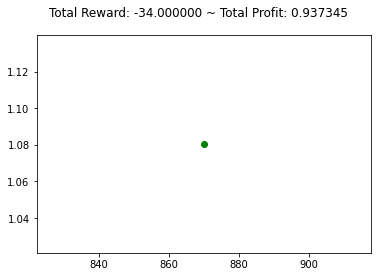

{'total_reward': -32.00000000000755, 'total_profit': 0.9373452910737591, 'position': 0}


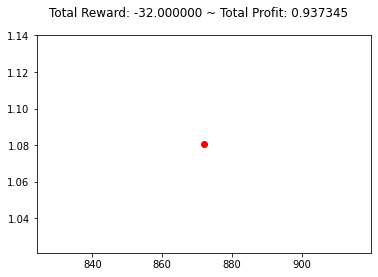

{'total_reward': -32.00000000000755, 'total_profit': 0.9370850619535276, 'position': 0}


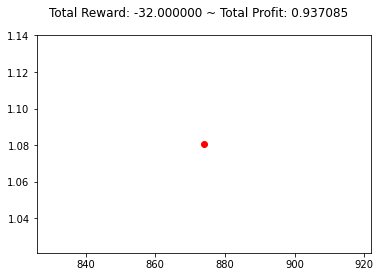

{'total_reward': -36.00000000000711, 'total_profit': 0.9364782538653061, 'position': 1}


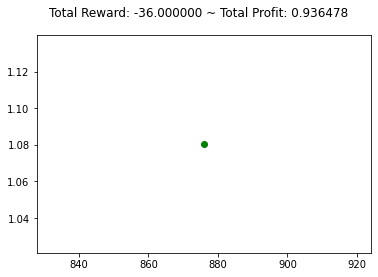

{'total_reward': -36.00000000000711, 'total_profit': 0.9364782538653061, 'position': 1}


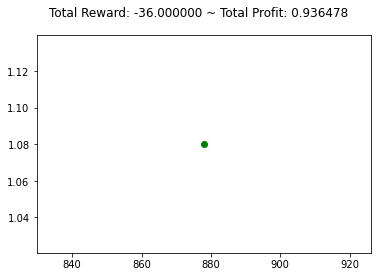

{'total_reward': -49.000000000005684, 'total_profit': 0.9364782538653061, 'position': 0}


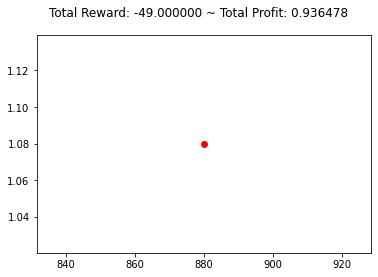

{'total_reward': -45.00000000000391, 'total_profit': 0.9365650210527301, 'position': 1}


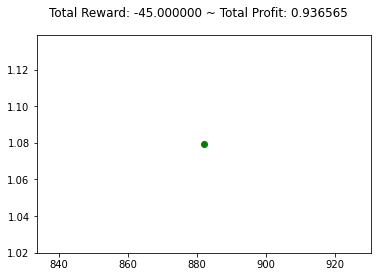

{'total_reward': -48.00000000000358, 'total_profit': 0.9365650210527301, 'position': 0}


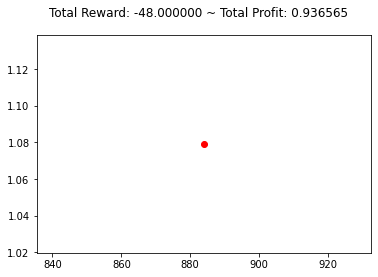

{'total_reward': -49.00000000000347, 'total_profit': 0.9361311047160675, 'position': 0}


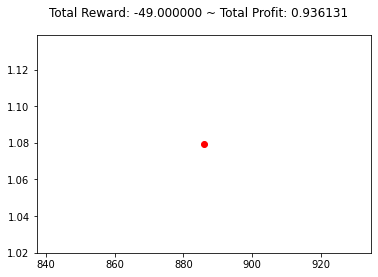

{'total_reward': -47.000000000003695, 'total_profit': 0.9359576185958459, 'position': 0}


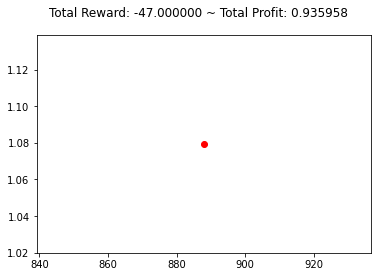

{'total_reward': -46.00000000000381, 'total_profit': 0.935784164626499, 'position': 1}


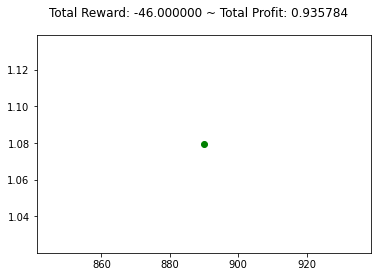

{'total_reward': -38.00000000000247, 'total_profit': 0.935784164626499, 'position': 0}


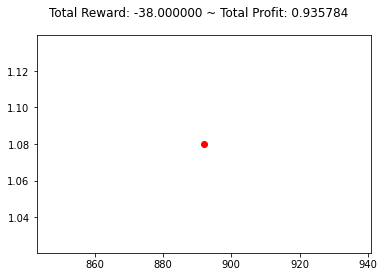

{'total_reward': -37.000000000002586, 'total_profit': 0.9356108552155117, 'position': 1}


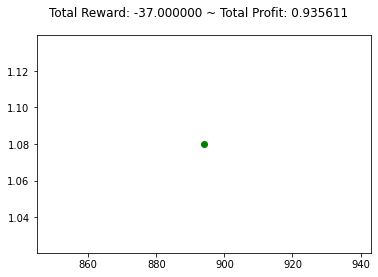

{'total_reward': -37.000000000002586, 'total_profit': 0.9352643647589928, 'position': 1}


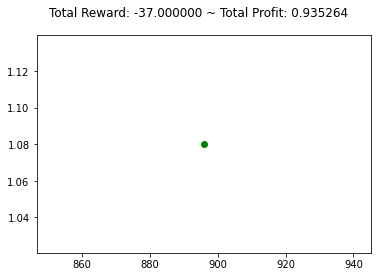

{'total_reward': -31.000000000001023, 'total_profit': 0.9356109836285413, 'position': 1}


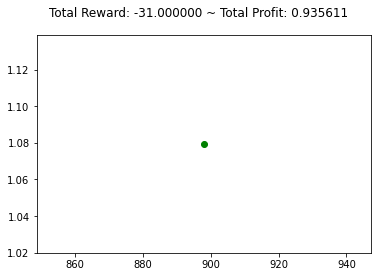

{'total_reward': -30.000000000001133, 'total_profit': 0.9356109836285413, 'position': 0}


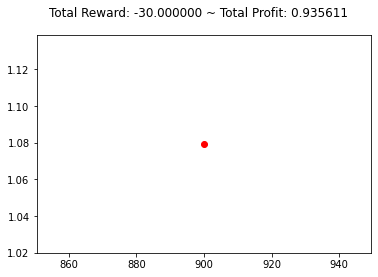

{'total_reward': -39.00000000000236, 'total_profit': 0.9345717045575848, 'position': 1}


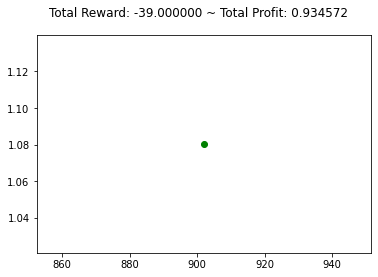

{'total_reward': -35.0000000000028, 'total_profit': 0.9345717045575848, 'position': 0}


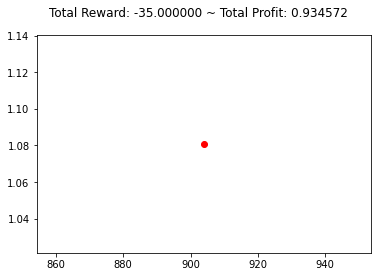

{'total_reward': -29.00000000000346, 'total_profit': 0.9348312837737383, 'position': 1}


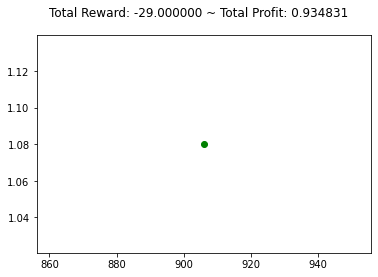

{'total_reward': -29.00000000000346, 'total_profit': 0.9348312837737383, 'position': 0}


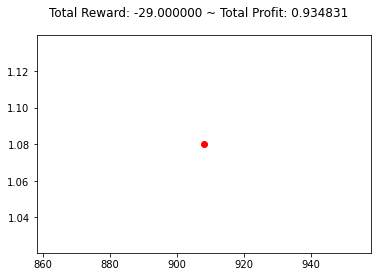

{'total_reward': -29.00000000000346, 'total_profit': 0.9348312837737383, 'position': 0}


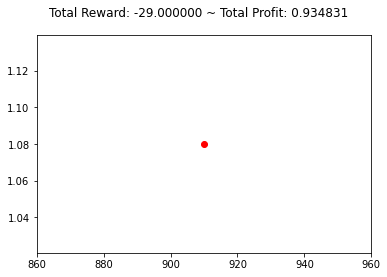

{'total_reward': -36.000000000002686, 'total_profit': 0.9339663399508537, 'position': 1}


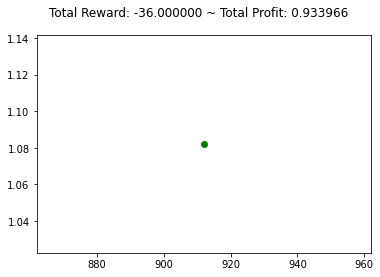

{'total_reward': -24.000000000001787, 'total_profit': 0.9339663399508537, 'position': 0}


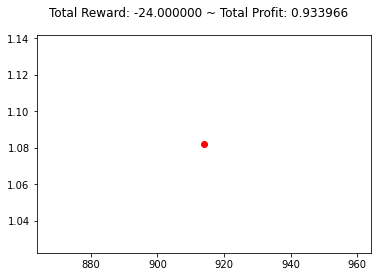

{'total_reward': -23.000000000001897, 'total_profit': 0.9337936869626015, 'position': 1}


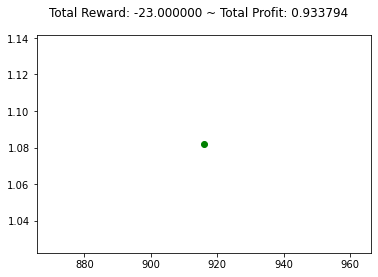

{'total_reward': -23.000000000001897, 'total_profit': 0.9337936869626015, 'position': 1}


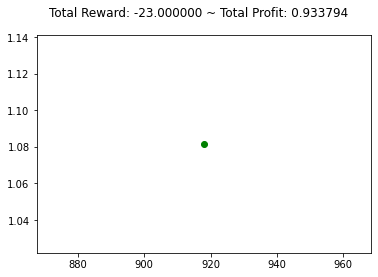

{'total_reward': -29.000000000003457, 'total_profit': 0.9337936869626015, 'position': 0}


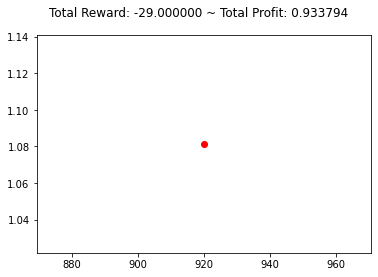

{'total_reward': -29.000000000003457, 'total_profit': 0.9337936869626015, 'position': 0}


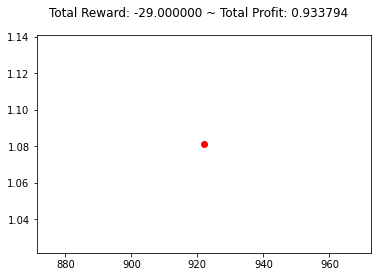

{'total_reward': -24.000000000004007, 'total_profit': 0.933966483721847, 'position': 1}


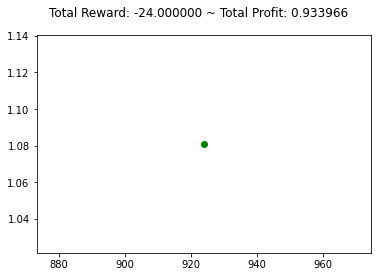

{'total_reward': -26.000000000003787, 'total_profit': 0.9335344918237333, 'position': 1}


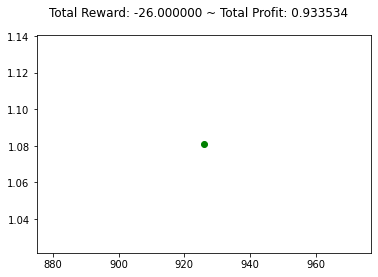

{'total_reward': -29.000000000003457, 'total_profit': 0.9335344918237333, 'position': 0}


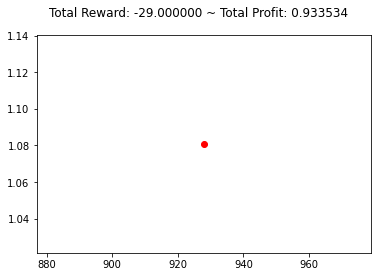

{'total_reward': -32.000000000003126, 'total_profit': 0.9330163413194833, 'position': 1}


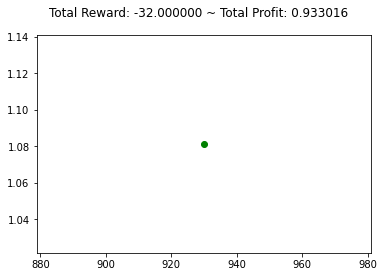

{'total_reward': -34.000000000002906, 'total_profit': 0.9330163413194833, 'position': 0}


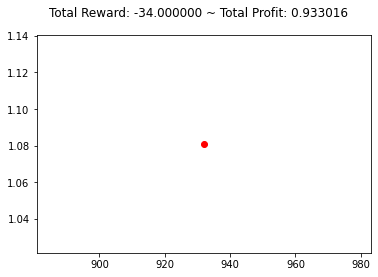

{'total_reward': -27.000000000003677, 'total_profit': 0.9333618709338966, 'position': 1}


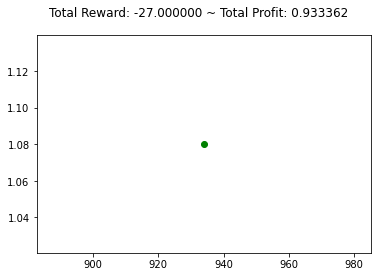

{'total_reward': -25.000000000003897, 'total_profit': 0.9333618709338966, 'position': 0}


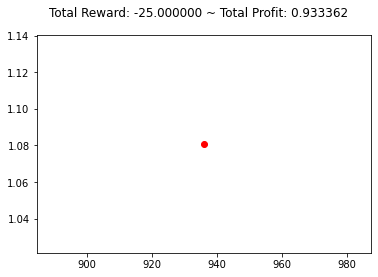

{'total_reward': -30.000000000003347, 'total_profit': 0.932671003523879, 'position': 0}


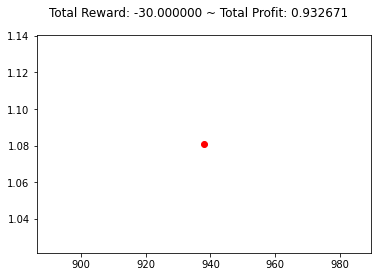

{'total_reward': -35.0000000000028, 'total_profit': 0.9319809667137253, 'position': 0}


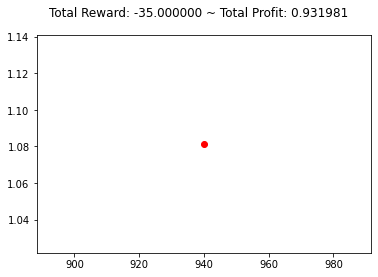

{'total_reward': -34.00000000000291, 'total_profit': 0.9318085691986099, 'position': 1}


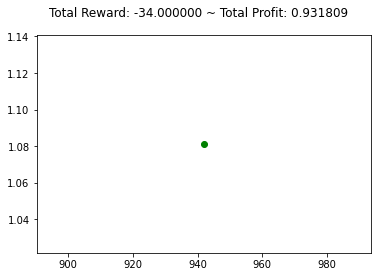

{'total_reward': -34.00000000000291, 'total_profit': 0.9318085691986099, 'position': 1}


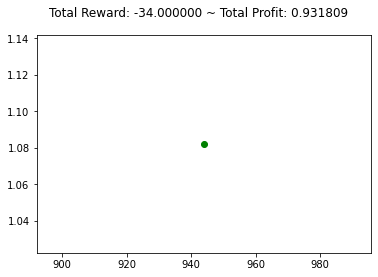

{'total_reward': -29.000000000001243, 'total_profit': 0.9318085691986099, 'position': 0}


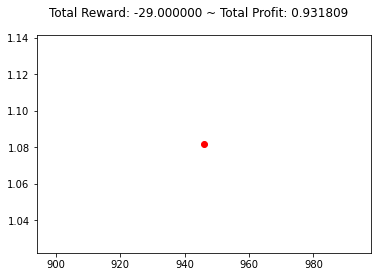

{'total_reward': -31.000000000001023, 'total_profit': 0.9313779339415629, 'position': 1}


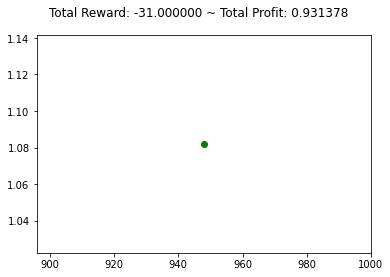

{'total_reward': -36.00000000000269, 'total_profit': 0.9313779339415629, 'position': 0}


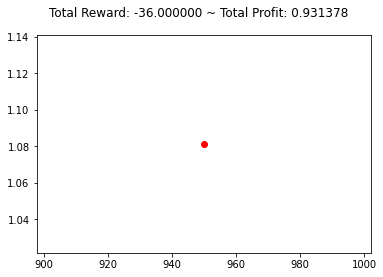

{'total_reward': -36.00000000000269, 'total_profit': 0.9313779339415629, 'position': 0}


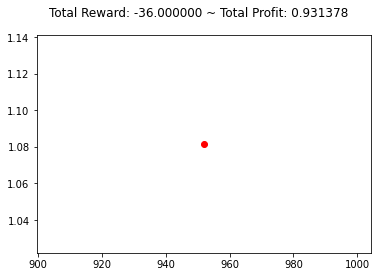

{'total_reward': -37.000000000002586, 'total_profit': 0.9310334575905905, 'position': 0}


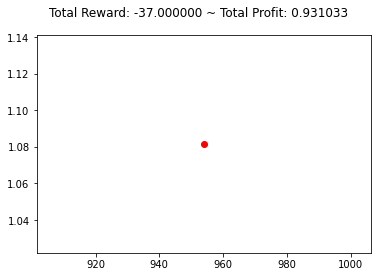

{'total_reward': -38.00000000000247, 'total_profit': 0.9310334575905905, 'position': 0}


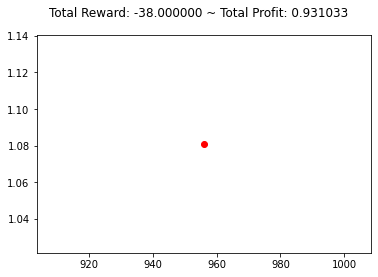

{'total_reward': -35.0000000000028, 'total_profit': 0.9307750286145754, 'position': 0}


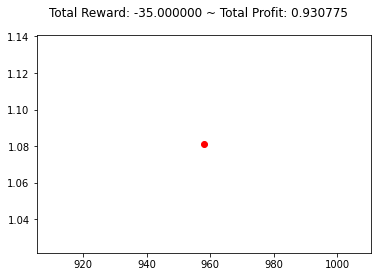

{'total_reward': -31.00000000000324, 'total_profit': 0.9311196324755951, 'position': 0}


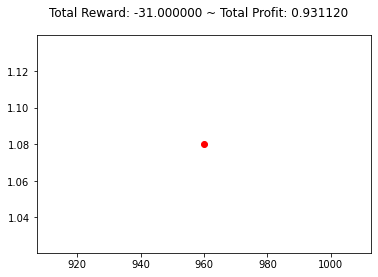

{'total_reward': -31.00000000000324, 'total_profit': 0.9311196324755951, 'position': 0}


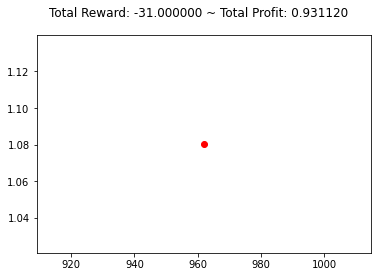

{'total_reward': -36.000000000002686, 'total_profit': 0.9304302971933626, 'position': 1}


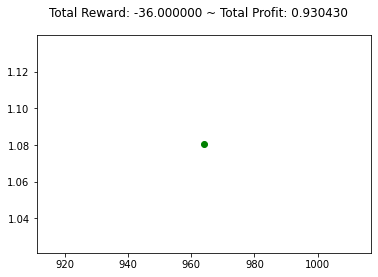

{'total_reward': -39.00000000000236, 'total_profit': 0.9304302971933626, 'position': 0}


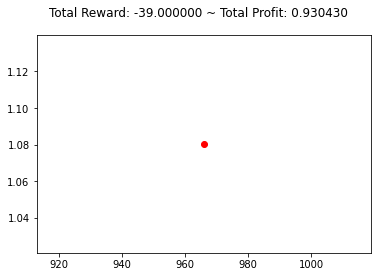

{'total_reward': -41.00000000000214, 'total_profit': 0.9301719161055556, 'position': 0}


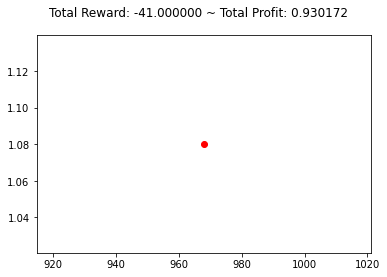

{'total_reward': -45.0000000000017, 'total_profit': 0.9297414005468657, 'position': 0}


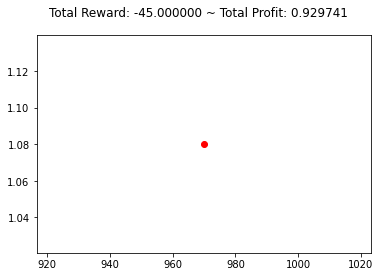

{'total_reward': -45.0000000000017, 'total_profit': 0.9297414005468657, 'position': 0}


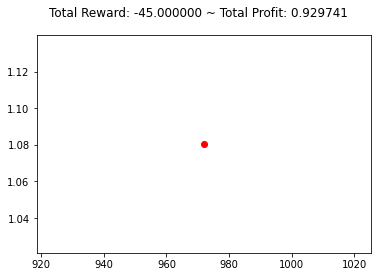

{'total_reward': -45.0000000000017, 'total_profit': 0.9294831629576017, 'position': 1}


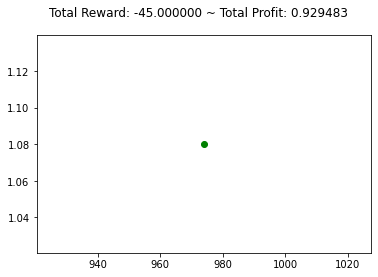

{'total_reward': -45.0000000000017, 'total_profit': 0.9294831629576017, 'position': 1}


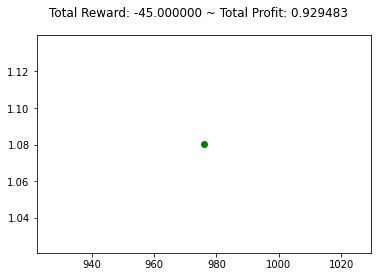

{'total_reward': -45.0000000000017, 'total_profit': 0.9294831629576017, 'position': 1}


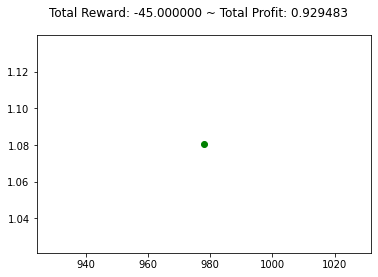

{'total_reward': -34.000000000002906, 'total_profit': 0.9297413527250898, 'position': 1}


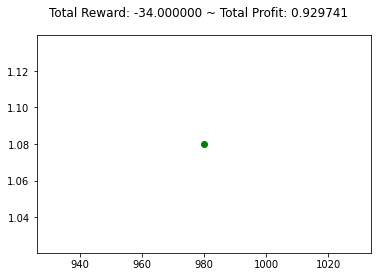

{'total_reward': -34.000000000002906, 'total_profit': 0.9297413527250898, 'position': 1}


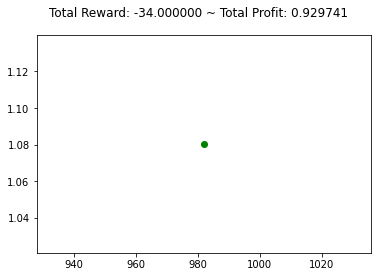

{'total_reward': -30.000000000003347, 'total_profit': 0.9297413527250898, 'position': 0}


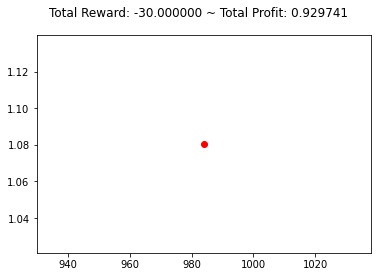

{'total_reward': -30.000000000003347, 'total_profit': 0.9294831868552107, 'position': 1}


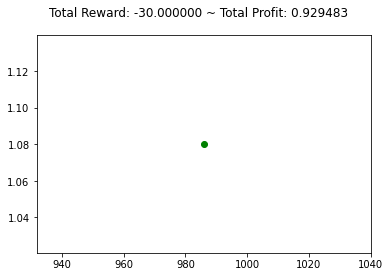

{'total_reward': -30.000000000003347, 'total_profit': 0.9294831868552107, 'position': 0}


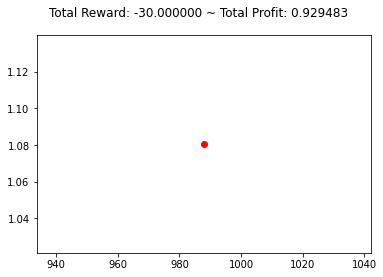

{'total_reward': -24.000000000004007, 'total_profit': 0.9297414244511142, 'position': 1}


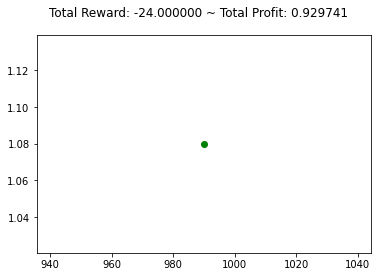

{'total_reward': -24.000000000004007, 'total_profit': 0.9297414244511142, 'position': 0}


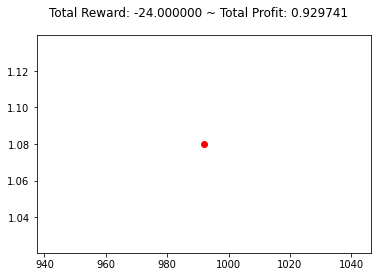

{'total_reward': -32.000000000003126, 'total_profit': 0.9287949913890226, 'position': 1}


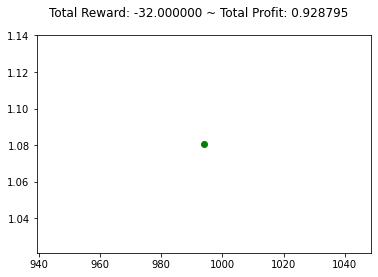

{'total_reward': -37.00000000000257, 'total_profit': 0.9285370166668518, 'position': 1}


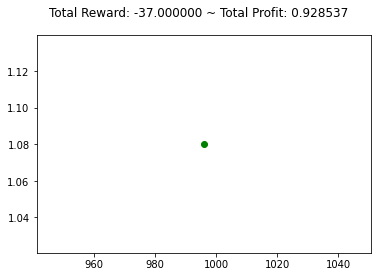

{'total_reward': -39.00000000000235, 'total_profit': 0.9285370166668518, 'position': 0}


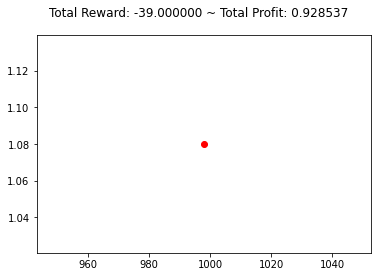

{'total_reward': -43.00000000000191, 'total_profit': 0.9279353542474621, 'position': 1}


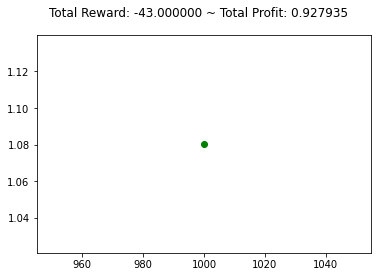

{'total_reward': -44.000000000001805, 'total_profit': 0.927763514367046, 'position': 1}


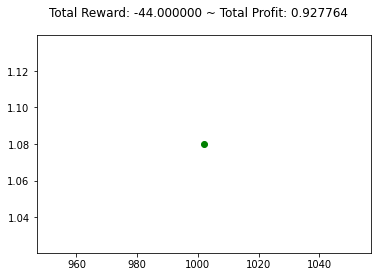

{'total_reward': -45.00000000000169, 'total_profit': 0.9274199300639753, 'position': 1}


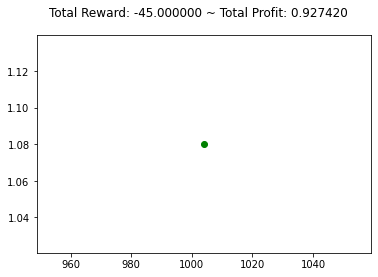

{'total_reward': -45.00000000000169, 'total_profit': 0.9274199300639753, 'position': 0}


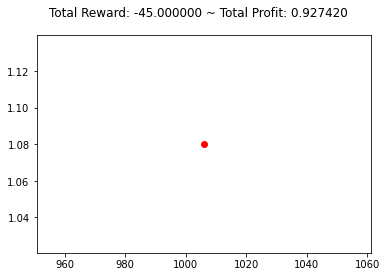

{'total_reward': -50.00000000000114, 'total_profit': 0.9267333337803819, 'position': 1}


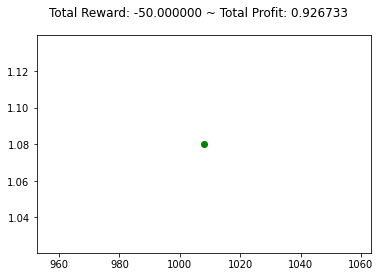

{'total_reward': -57.00000000000036, 'total_profit': 0.9263044097158718, 'position': 1}


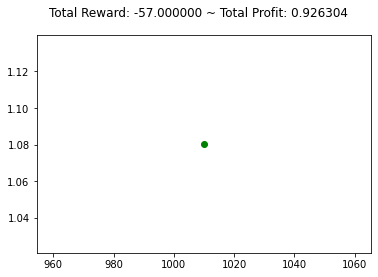

{'total_reward': -57.00000000000036, 'total_profit': 0.9260471743896526, 'position': 1}


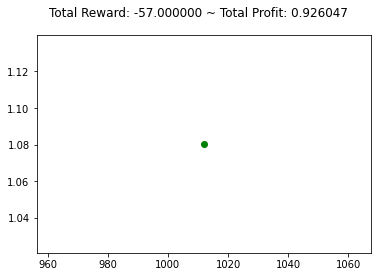

{'total_reward': -59.00000000000014, 'total_profit': 0.9260471743896526, 'position': 0}


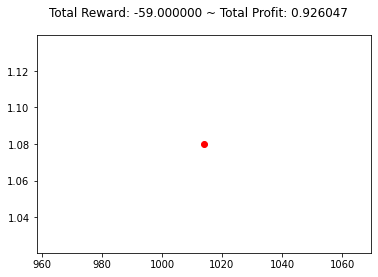

{'total_reward': -57.00000000000036, 'total_profit': 0.9257899628793138, 'position': 0}


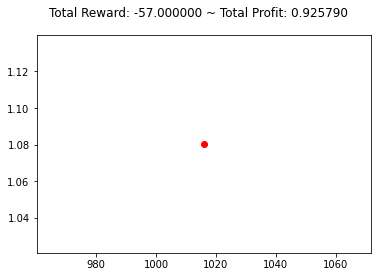

{'total_reward': -57.00000000000036, 'total_profit': 0.9255328704153095, 'position': 1}


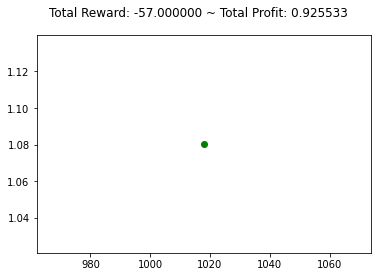

{'total_reward': -58.000000000000256, 'total_profit': 0.9253614754393068, 'position': 1}


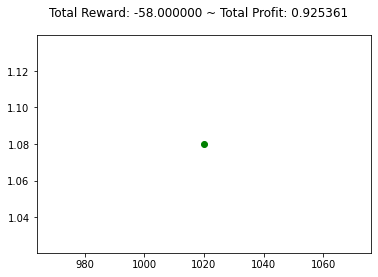

{'total_reward': -51.00000000000102, 'total_profit': 0.9254471649916208, 'position': 1}


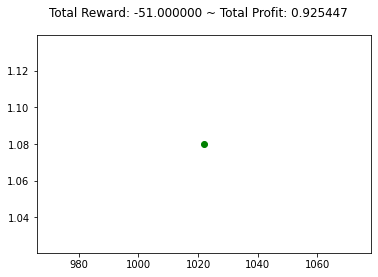

{'total_reward': -53.0000000000008, 'total_profit': 0.9254471649916208, 'position': 0}


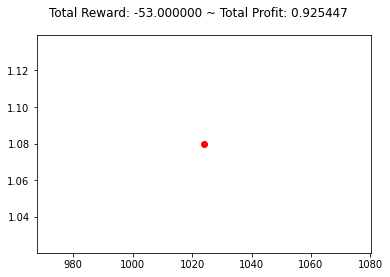

{'total_reward': -50.99999999999658, 'total_profit': 0.925275722389733, 'position': 0}


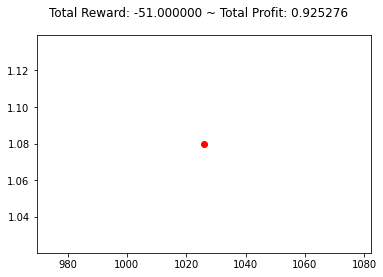

{'total_reward': -50.99999999999658, 'total_profit': 0.9250186299411668, 'position': 1}


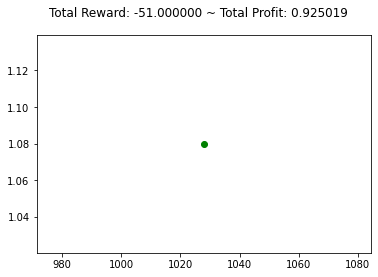

{'total_reward': -49.99999999999669, 'total_profit': 0.9250186299411668, 'position': 0}


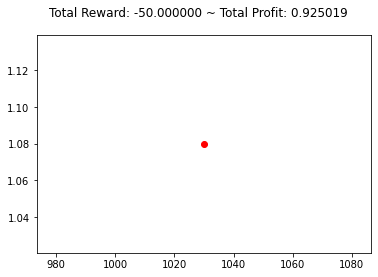

{'total_reward': -49.99999999999891, 'total_profit': 0.9248472825983973, 'position': 0}


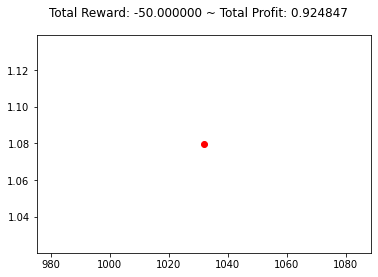

{'total_reward': -47.99999999999913, 'total_profit': 0.9247616009898557, 'position': 1}


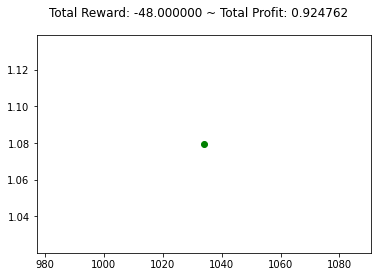

{'total_reward': -47.99999999999913, 'total_profit': 0.9247616009898557, 'position': 1}


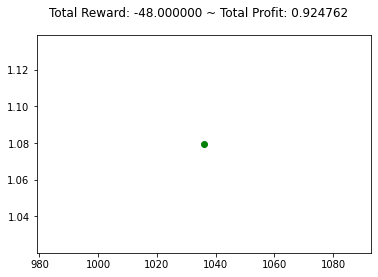

{'total_reward': -50.999999999998806, 'total_profit': 0.9247616009898557, 'position': 0}


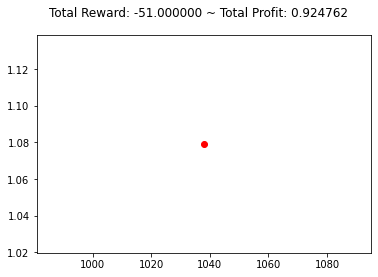

{'total_reward': -52.999999999998586, 'total_profit': 0.9243331929471476, 'position': 1}


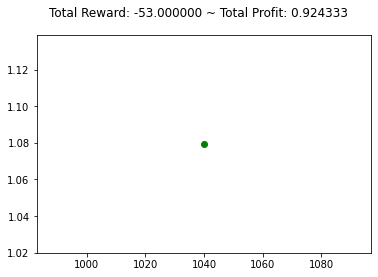

{'total_reward': -47.999999999996916, 'total_profit': 0.9243331929471476, 'position': 0}


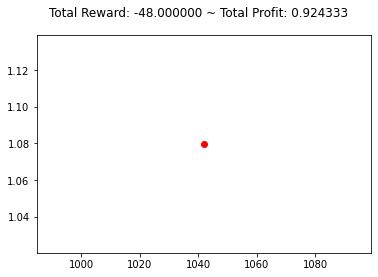

{'total_reward': -42.99999999999524, 'total_profit': 0.9245901425004133, 'position': 0}


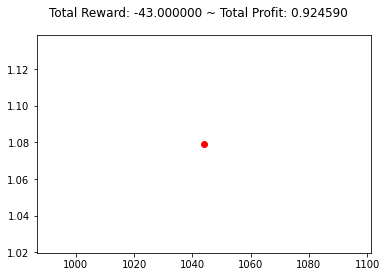

{'total_reward': -42.99999999999524, 'total_profit': 0.9245901425004133, 'position': 0}


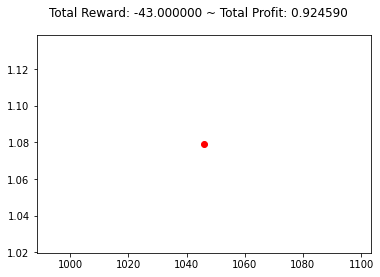

{'total_reward': -42.99999999999524, 'total_profit': 0.9245901425004133, 'position': 0}


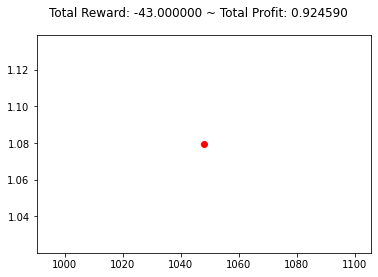

{'total_reward': -47.999999999994685, 'total_profit': 0.923905007159546, 'position': 1}


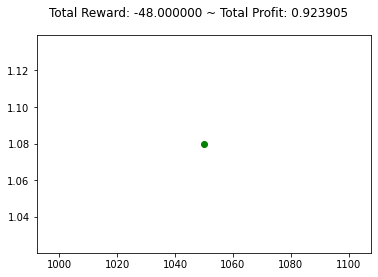

{'total_reward': -50.99999999999436, 'total_profit': 0.923905007159546, 'position': 0}


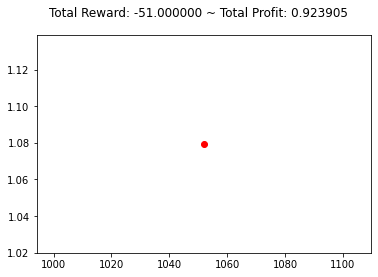

{'total_reward': -53.99999999999403, 'total_profit': 0.9233915364256671, 'position': 0}


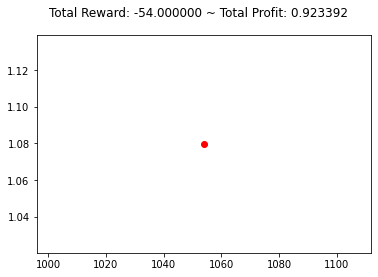

{'total_reward': -56.99999999999592, 'total_profit': 0.9228784936236896, 'position': 0}


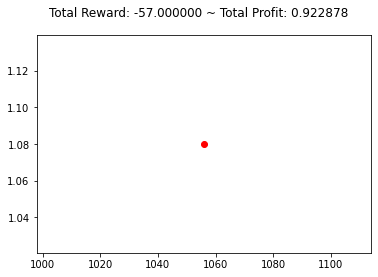

{'total_reward': -56.99999999999592, 'total_profit': 0.9228784936236896, 'position': 0}


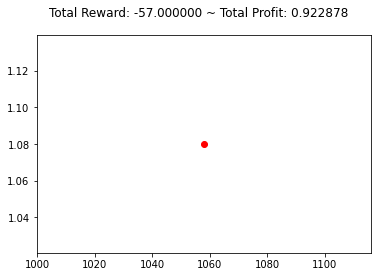

{'total_reward': -56.99999999999592, 'total_profit': 0.9228784936236896, 'position': 0}


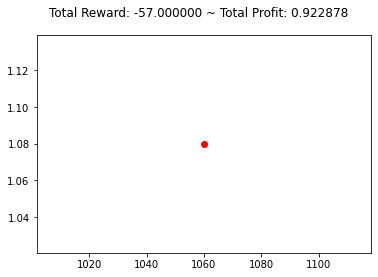

{'total_reward': -56.99999999999592, 'total_profit': 0.9228784936236896, 'position': 0}


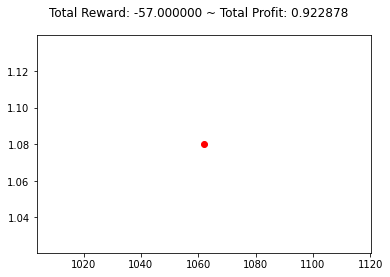

{'total_reward': -56.99999999999592, 'total_profit': 0.9228784936236896, 'position': 0}


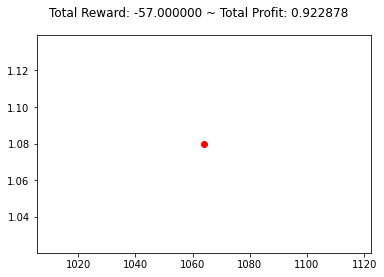

{'total_reward': -51.99999999999425, 'total_profit': 0.9230494920475592, 'position': 1}


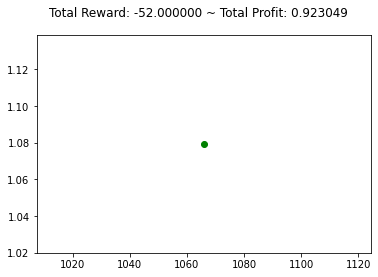

{'total_reward': -54.99999999999392, 'total_profit': 0.9230494920475592, 'position': 0}


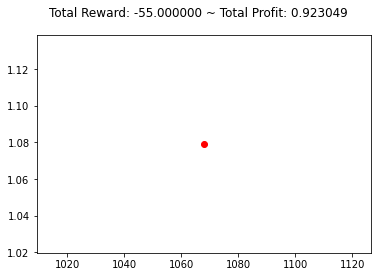

{'total_reward': -54.99999999999392, 'total_profit': 0.9227928755638095, 'position': 1}


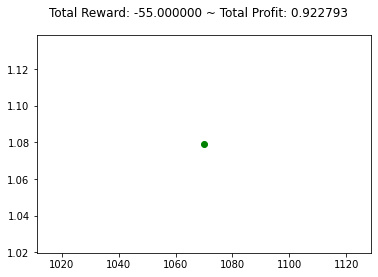

{'total_reward': -54.99999999999392, 'total_profit': 0.9227928755638095, 'position': 0}


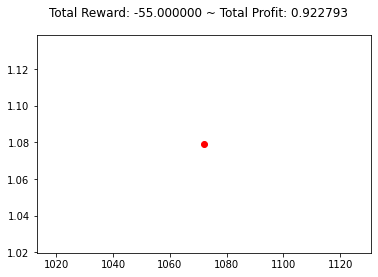

{'total_reward': -53.99999999999403, 'total_profit': 0.922536330421868, 'position': 0}


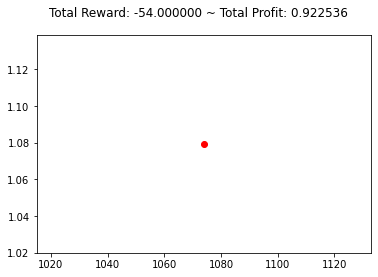

{'total_reward': -53.99999999999403, 'total_profit': 0.9222798803670806, 'position': 1}


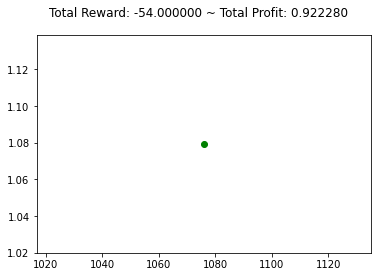

{'total_reward': -55.99999999999381, 'total_profit': 0.9222798803670806, 'position': 0}


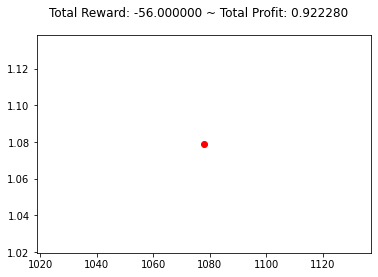

{'total_reward': -55.99999999999381, 'total_profit': 0.9222798803670806, 'position': 0}


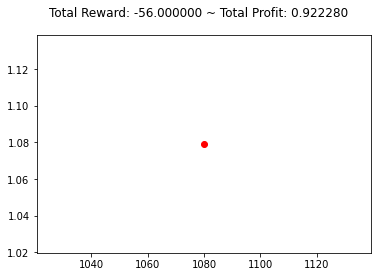

{'total_reward': -55.99999999999381, 'total_profit': 0.9220234540796756, 'position': 1}


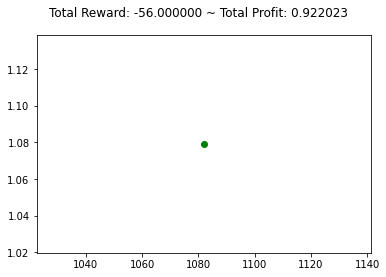

{'total_reward': -55.99999999999381, 'total_profit': 0.9220234540796756, 'position': 1}


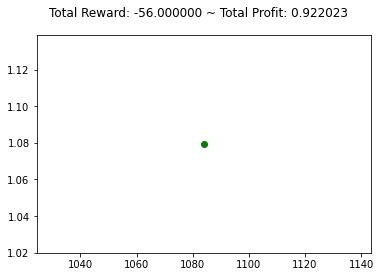

{'total_reward': -55.99999999999381, 'total_profit': 0.9220234540796756, 'position': 1}


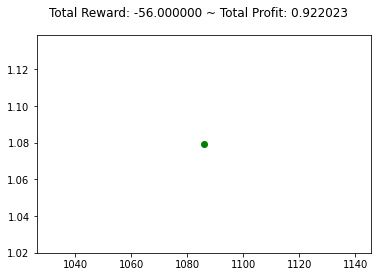

{'total_reward': -50.99999999999436, 'total_profit': 0.9218525982557009, 'position': 1}


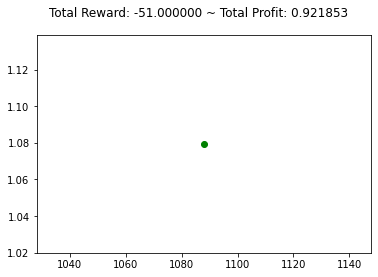

{'total_reward': -50.99999999999436, 'total_profit': 0.921596362010471, 'position': 1}


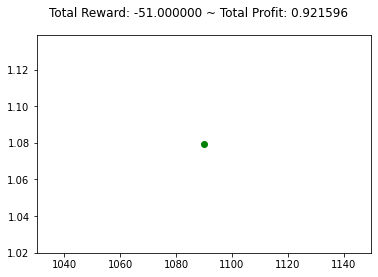

{'total_reward': -49.99999999999447, 'total_profit': 0.921596362010471, 'position': 0}


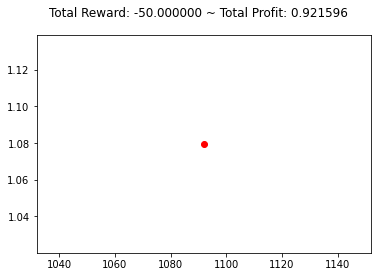

{'total_reward': -52.99999999999636, 'total_profit': 0.9210842217703984, 'position': 1}


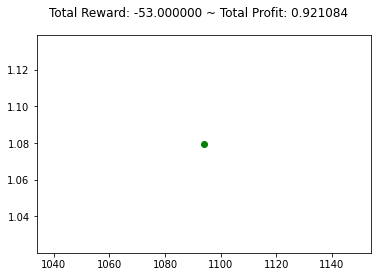

{'total_reward': -59.99999999999781, 'total_profit': 0.9210842217703984, 'position': 0}


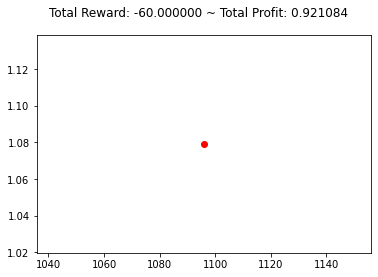

{'total_reward': -57.999999999998025, 'total_profit': 0.9207427949436834, 'position': 0}


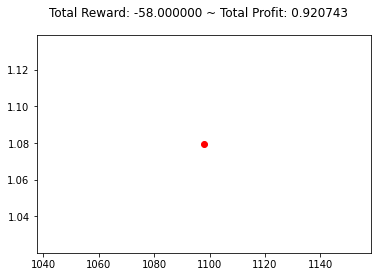

{'total_reward': -57.999999999998025, 'total_profit': 0.9207427949436834, 'position': 0}


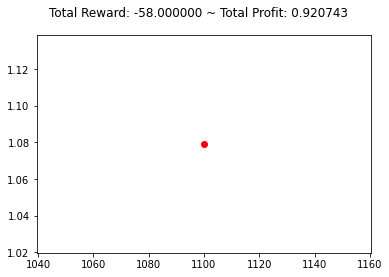

{'total_reward': -54.99999999999835, 'total_profit': 0.9207427949436834, 'position': 1}


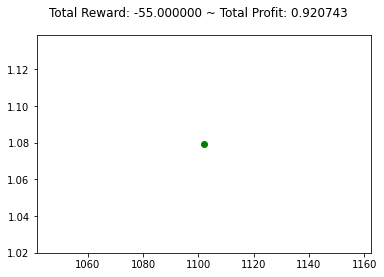

{'total_reward': -49.999999999998906, 'total_profit': 0.9207427949436834, 'position': 0}


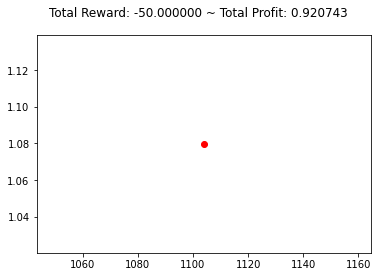

{'total_reward': -49.999999999998906, 'total_profit': 0.9207427949436834, 'position': 0}


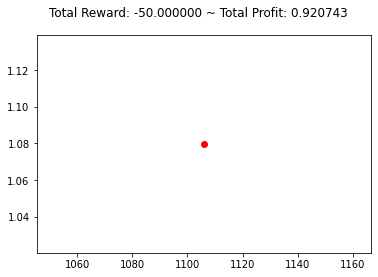

{'total_reward': -55.0000000000028, 'total_profit': 0.9204016843407589, 'position': 0}


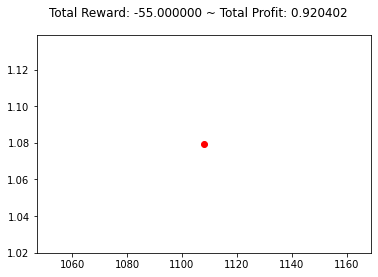

{'total_reward': -55.0000000000028, 'total_profit': 0.9204016843407589, 'position': 0}


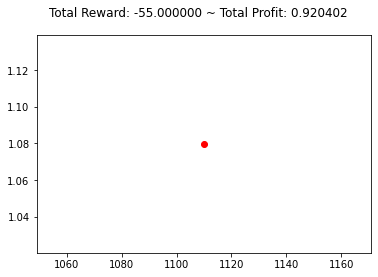

{'total_reward': -58.00000000000247, 'total_profit': 0.9198901606184502, 'position': 0}


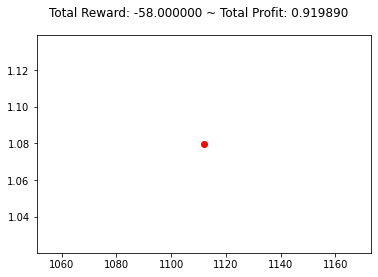

{'total_reward': -60.000000000004476, 'total_profit': 0.9194642066637276, 'position': 1}


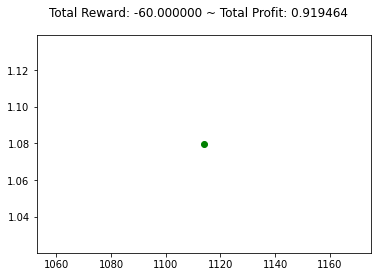

{'total_reward': -64.00000000000625, 'total_profit': 0.9194642066637276, 'position': 0}


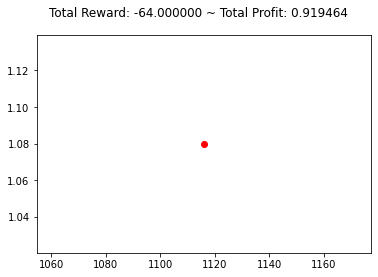

{'total_reward': -66.00000000000603, 'total_profit': 0.9190383710733869, 'position': 1}


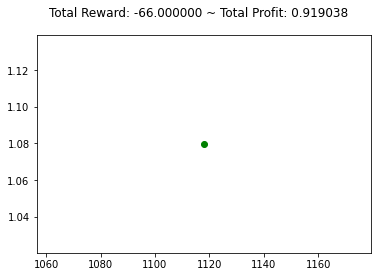

{'total_reward': -66.00000000000603, 'total_profit': 0.9190383710733869, 'position': 0}


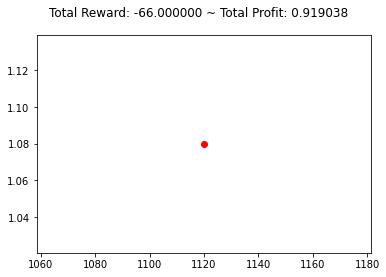

{'total_reward': -66.00000000000603, 'total_profit': 0.9190383710733869, 'position': 0}


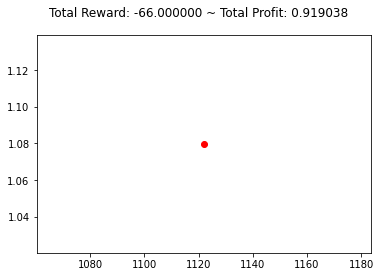

{'total_reward': -64.00000000000625, 'total_profit': 0.918953227626002, 'position': 1}


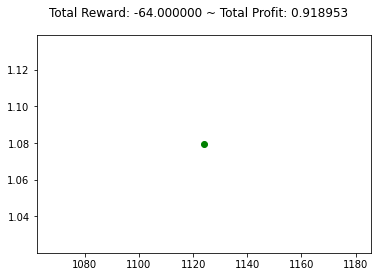

{'total_reward': -64.00000000000847, 'total_profit': 0.9185277075168955, 'position': 1}


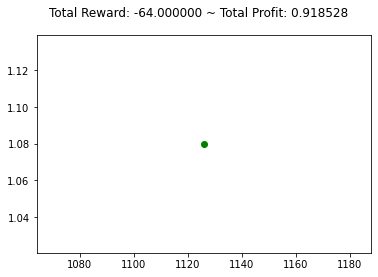

{'total_reward': -64.00000000000847, 'total_profit': 0.9185277075168955, 'position': 1}


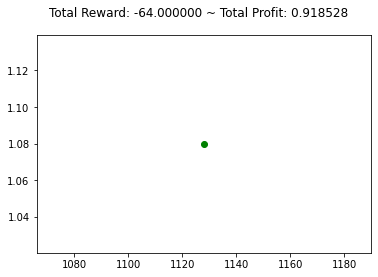

{'total_reward': -64.00000000000847, 'total_profit': 0.9185277075168955, 'position': 1}


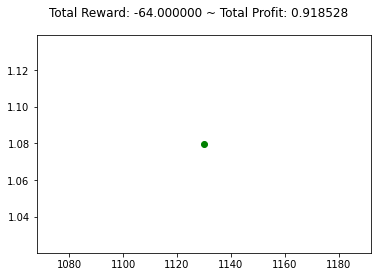

{'total_reward': -64.00000000001069, 'total_profit': 0.9184426113794565, 'position': 1}


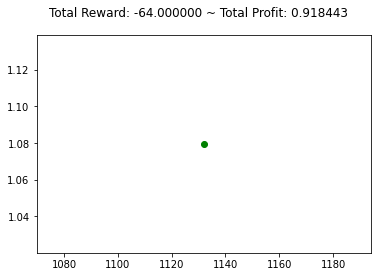

{'total_reward': -62.00000000001091, 'total_profit': 0.9184426113794565, 'position': 0}


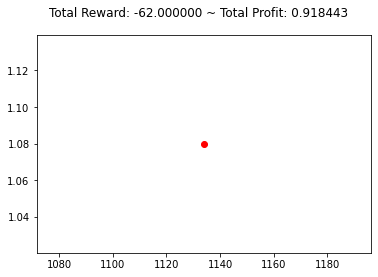

{'total_reward': -62.00000000001313, 'total_profit': 0.9181023529330807, 'position': 0}


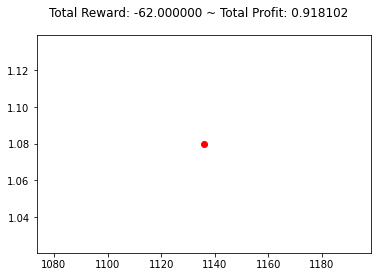

{'total_reward': -60.00000000001336, 'total_profit': 0.9179322867382241, 'position': 0}


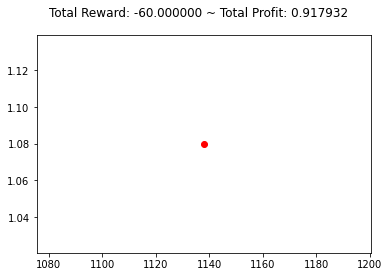

{'total_reward': -60.00000000001336, 'total_profit': 0.9179322867382241, 'position': 0}


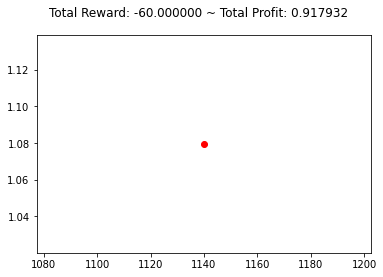

{'total_reward': -54.0000000000118, 'total_profit': 0.9180173277134641, 'position': 0}


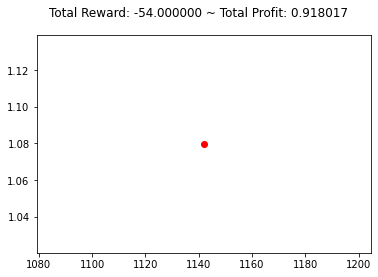

{'total_reward': -54.0000000000118, 'total_profit': 0.9180173277134641, 'position': 0}


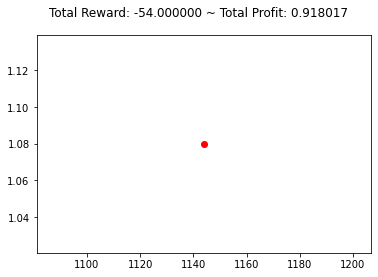

{'total_reward': -56.0000000000138, 'total_profit': 0.9175922409716074, 'position': 1}


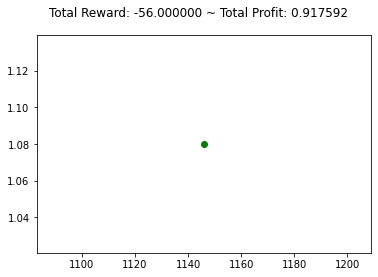

{'total_reward': -56.0000000000138, 'total_profit': 0.9175922409716074, 'position': 1}


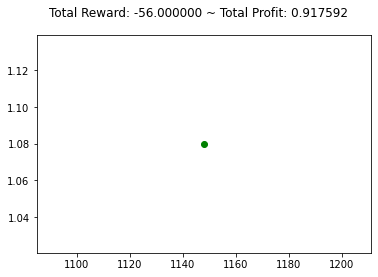

{'total_reward': -55.00000000001391, 'total_profit': 0.9173373306351953, 'position': 1}


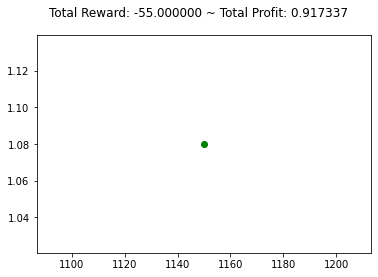

{'total_reward': -53.00000000001414, 'total_profit': 0.9171674376209097, 'position': 1}


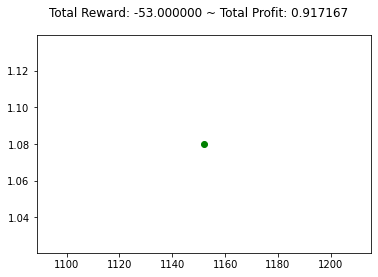

{'total_reward': -52.00000000001425, 'total_profit': 0.9171674376209097, 'position': 0}


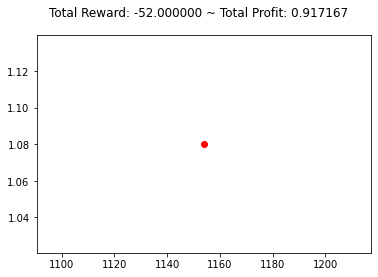

{'total_reward': -52.00000000001425, 'total_profit': 0.9169975760712068, 'position': 0}


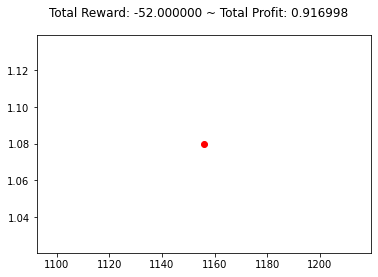

{'total_reward': -53.00000000001414, 'total_profit': 0.9166579158893118, 'position': 1}


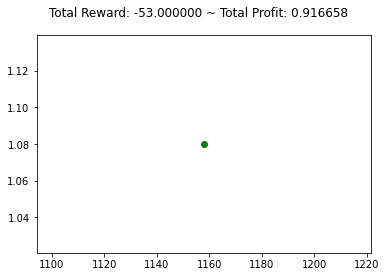

{'total_reward': -57.0000000000137, 'total_profit': 0.9161487086404149, 'position': 1}


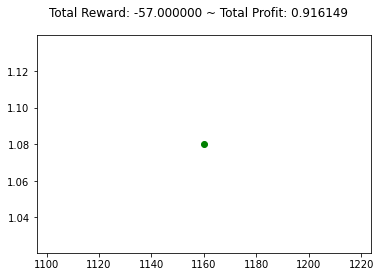

{'total_reward': -59.00000000001348, 'total_profit': 0.9161487086404149, 'position': 0}


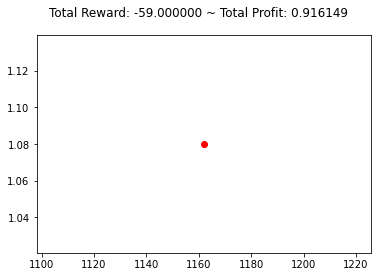

{'total_reward': -59.00000000001348, 'total_profit': 0.9161487086404149, 'position': 0}


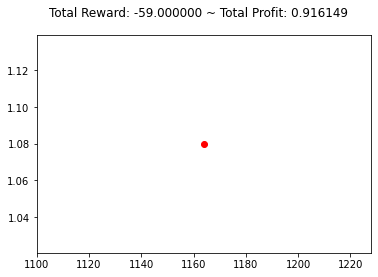

{'total_reward': -60.00000000001337, 'total_profit': 0.9158093943038814, 'position': 1}


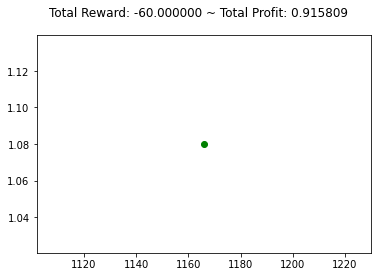

{'total_reward': -62.000000000013145, 'total_profit': 0.9154702056393245, 'position': 1}


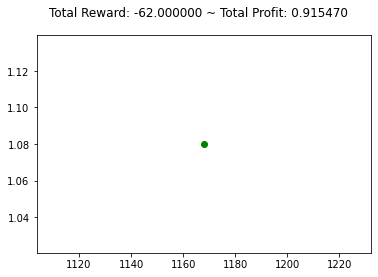

{'total_reward': -62.000000000013145, 'total_profit': 0.9154702056393245, 'position': 0}


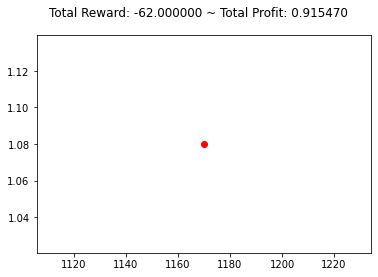

{'total_reward': -63.00000000001303, 'total_profit': 0.915131173992018, 'position': 0}


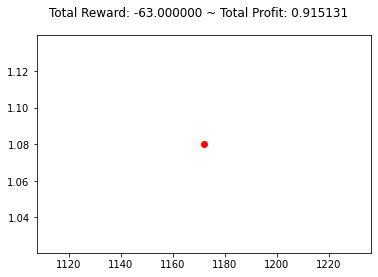

{'total_reward': -61.00000000001325, 'total_profit': 0.9150464317775545, 'position': 1}


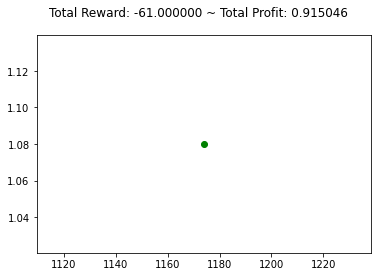

{'total_reward': -59.00000000001347, 'total_profit': 0.9150464317775545, 'position': 0}


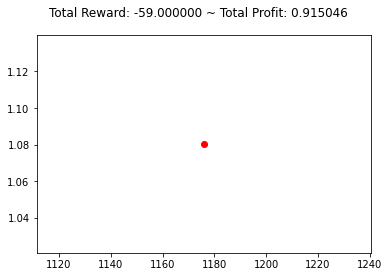

{'total_reward': -61.00000000001325, 'total_profit': 0.9146229168132958, 'position': 1}


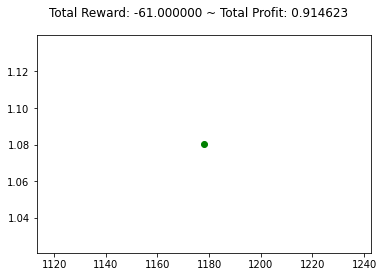

{'total_reward': -65.00000000001282, 'total_profit': 0.9141995978663305, 'position': 1}


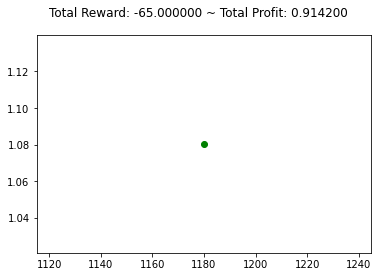

{'total_reward': -62.000000000013145, 'total_profit': 0.9141995978663305, 'position': 0}


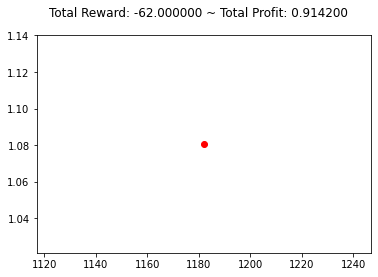

{'total_reward': -57.0000000000137, 'total_profit': 0.9143688784140328, 'position': 1}


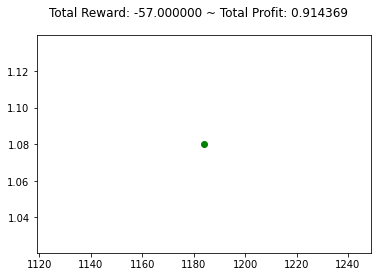

{'total_reward': -55.00000000001392, 'total_profit': 0.9143688784140328, 'position': 0}


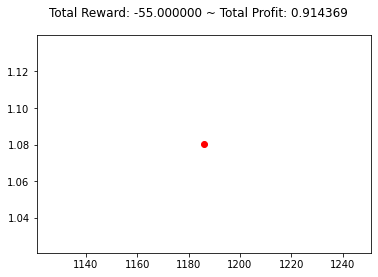

{'total_reward': -59.000000000013486, 'total_profit': 0.9140303486552716, 'position': 0}


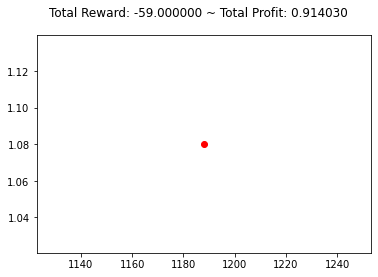

{'total_reward': -58.0000000000136, 'total_profit': 0.9138610837758909, 'position': 1}


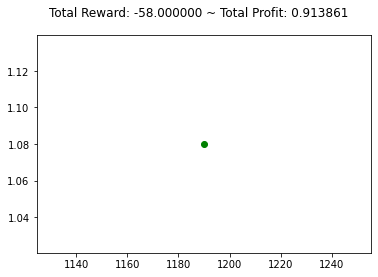

{'total_reward': -59.000000000013486, 'total_profit': 0.9135226480444676, 'position': 1}


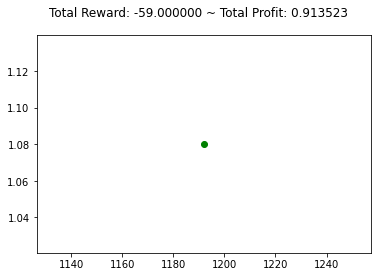

{'total_reward': -59.000000000013486, 'total_profit': 0.9135226480444676, 'position': 0}


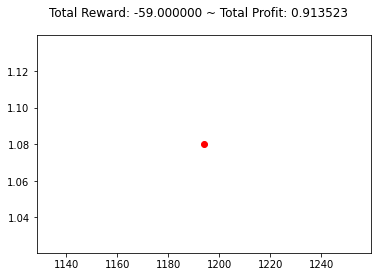

{'total_reward': -59.000000000013486, 'total_profit': 0.9132689152471216, 'position': 1}


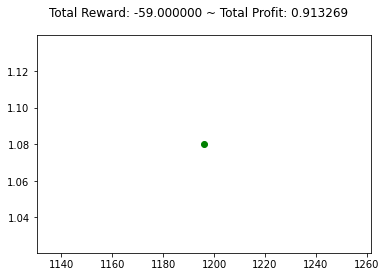

{'total_reward': -59.000000000013486, 'total_profit': 0.9130152529245829, 'position': 1}


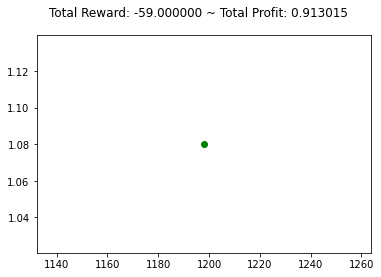

{'total_reward': -56.00000000001381, 'total_profit': 0.9130152529245829, 'position': 0}


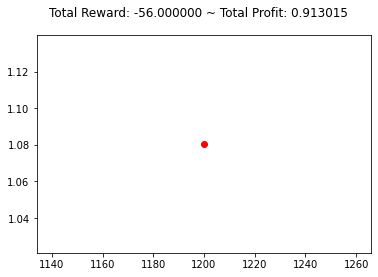

{'total_reward': -56.00000000001381, 'total_profit': 0.912761731473382, 'position': 1}


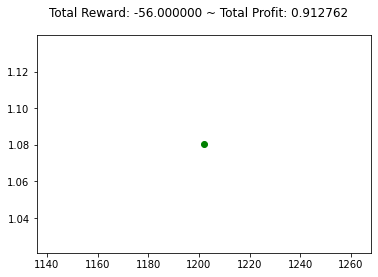

{'total_reward': -56.00000000001381, 'total_profit': 0.912761731473382, 'position': 1}


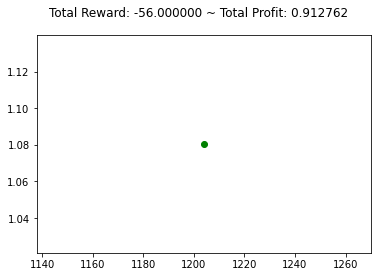

{'total_reward': -52.00000000001425, 'total_profit': 0.9126772477884992, 'position': 1}


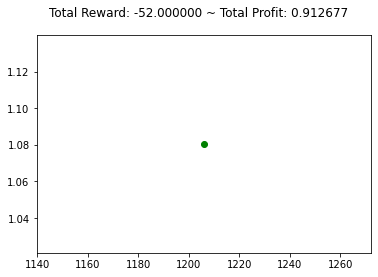

{'total_reward': -51.00000000001437, 'total_profit': 0.9126772477884992, 'position': 0}


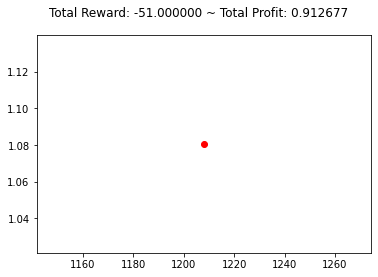

{'total_reward': -53.00000000001415, 'total_profit': 0.9122549857140159, 'position': 0}


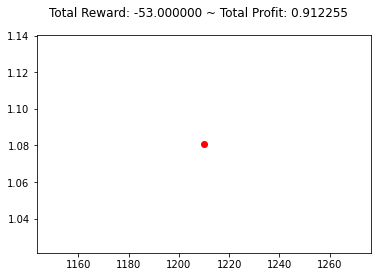

{'total_reward': -53.00000000001415, 'total_profit': 0.9122549857140159, 'position': 0}


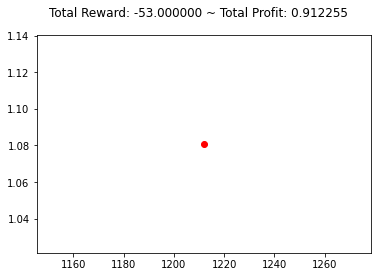

{'total_reward': -53.00000000001415, 'total_profit': 0.9120017456883712, 'position': 1}


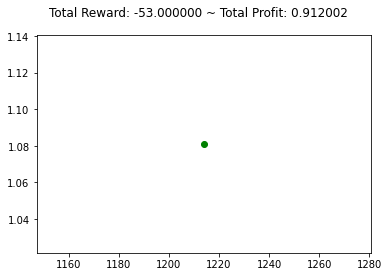

{'total_reward': -49.00000000001459, 'total_profit': 0.9120017456883712, 'position': 0}


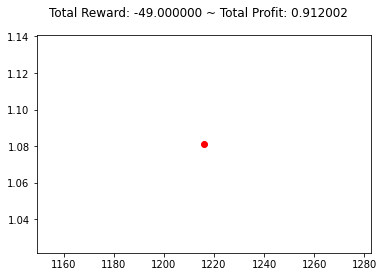

{'total_reward': -52.00000000001426, 'total_profit': 0.9116643421568551, 'position': 0}


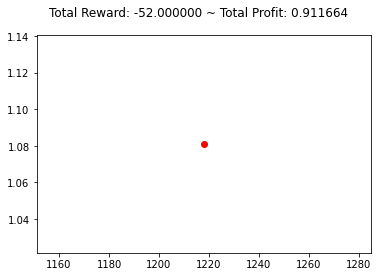

{'total_reward': -50.00000000001448, 'total_profit': 0.911579991273976, 'position': 1}


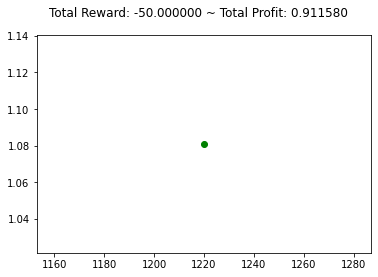

{'total_reward': -50.00000000001448, 'total_profit': 0.911579991273976, 'position': 1}


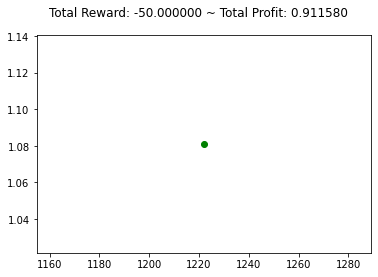

{'total_reward': -50.00000000001448, 'total_profit': 0.911579991273976, 'position': 1}


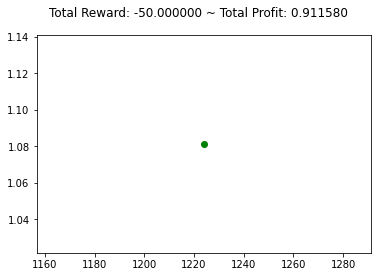

{'total_reward': -46.00000000001492, 'total_profit': 0.911579991273976, 'position': 0}


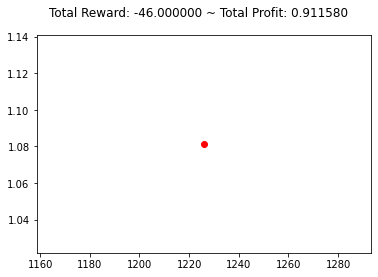

{'total_reward': -46.00000000001492, 'total_profit': 0.911579991273976, 'position': 0}


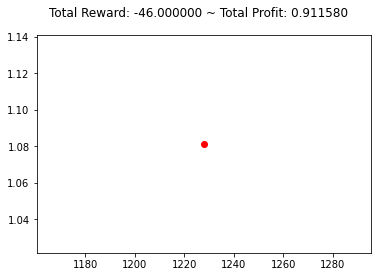

{'total_reward': -46.00000000001492, 'total_profit': 0.9113270556493163, 'position': 1}


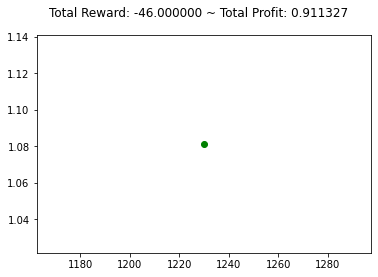

{'total_reward': -47.00000000001481, 'total_profit': 0.9113270556493163, 'position': 0}


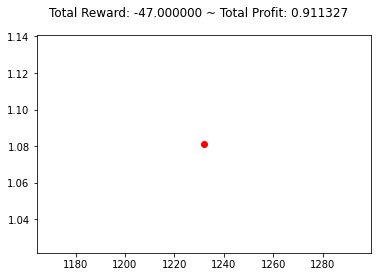

{'total_reward': -47.00000000001481, 'total_profit': 0.9113270556493163, 'position': 0}


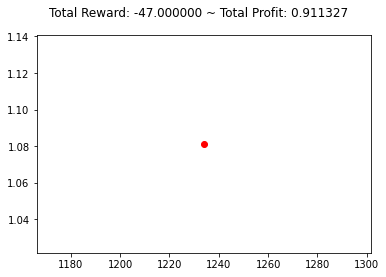

{'total_reward': -47.00000000001481, 'total_profit': 0.9113270556493163, 'position': 0}


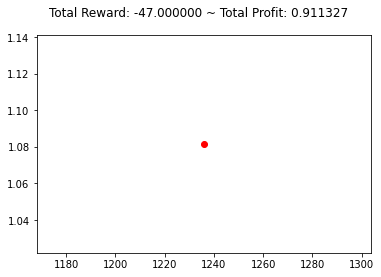

{'total_reward': -52.00000000001425, 'total_profit': 0.910737199949867, 'position': 0}


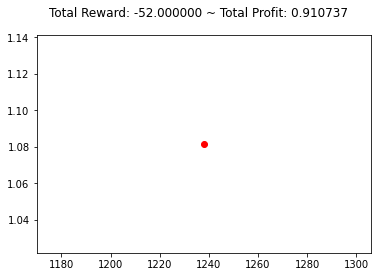

{'total_reward': -49.00000000001458, 'total_profit': 0.910737199949867, 'position': 1}


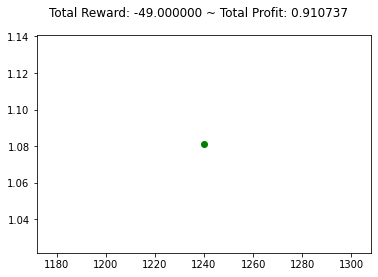

{'total_reward': -49.00000000001458, 'total_profit': 0.910737199949867, 'position': 0}


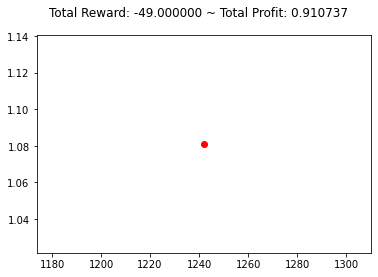

{'total_reward': -49.00000000001458, 'total_profit': 0.910737199949867, 'position': 0}


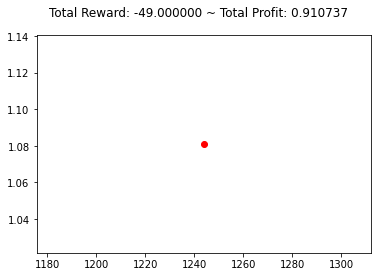

{'total_reward': -50.00000000001447, 'total_profit': 0.9104002642488127, 'position': 1}


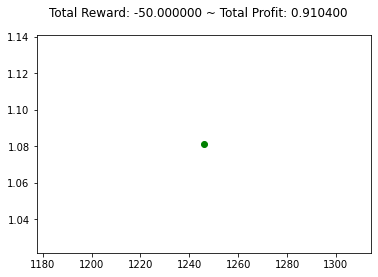

{'total_reward': -49.00000000001458, 'total_profit': 0.9104002642488127, 'position': 0}


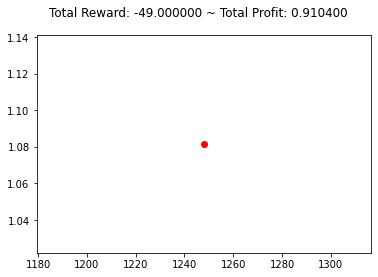

{'total_reward': -49.00000000001458, 'total_profit': 0.9104002642488127, 'position': 0}


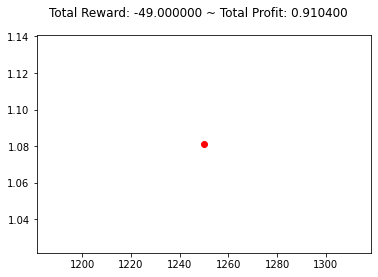

{'total_reward': -49.00000000001458, 'total_profit': 0.9104002642488127, 'position': 0}


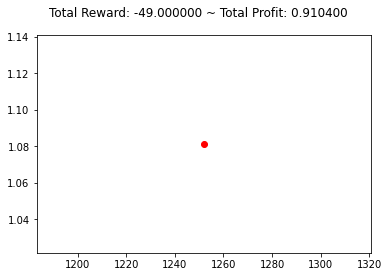

{'total_reward': -49.00000000001458, 'total_profit': 0.9101476793239309, 'position': 1}


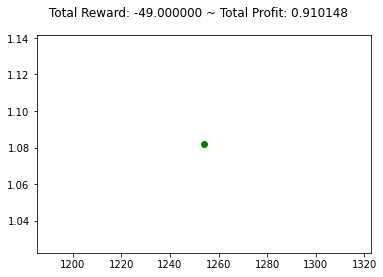

{'total_reward': -42.00000000001313, 'total_profit': 0.9101476793239309, 'position': 0}


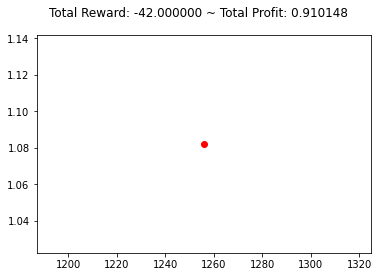

{'total_reward': -40.00000000001336, 'total_profit': 0.9099794294525335, 'position': 0}


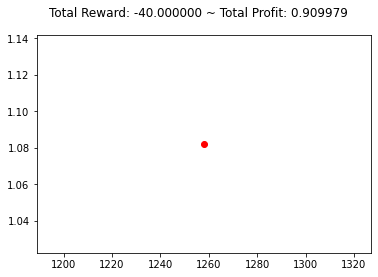

{'total_reward': -38.00000000001358, 'total_profit': 0.9098953122932201, 'position': 0}


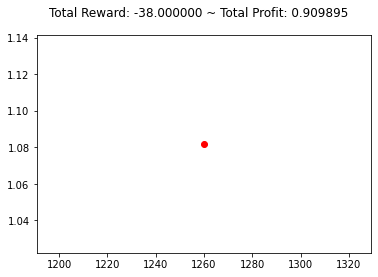

{'total_reward': -38.00000000001358, 'total_profit': 0.9098953122932201, 'position': 0}


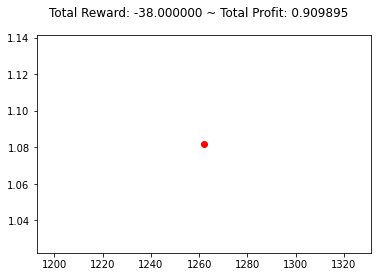

{'total_reward': -38.00000000001358, 'total_profit': 0.9096429841422791, 'position': 1}


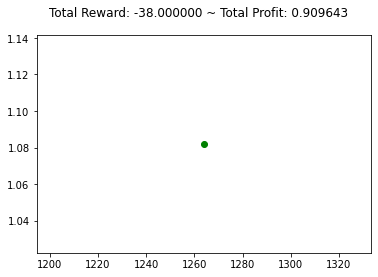

{'total_reward': -39.00000000001347, 'total_profit': 0.9093066709953552, 'position': 1}


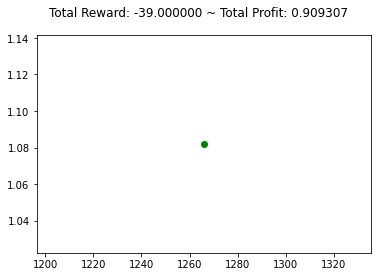

{'total_reward': -38.000000000013586, 'total_profit': 0.9093066709953552, 'position': 0}


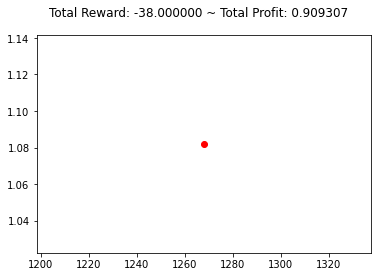

{'total_reward': -38.000000000013586, 'total_profit': 0.9090545526947096, 'position': 1}


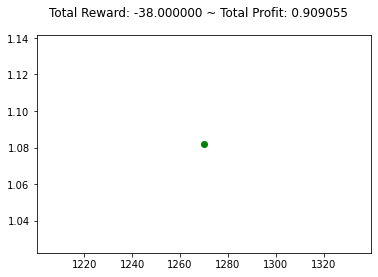

{'total_reward': -38.000000000013586, 'total_profit': 0.9090545526947096, 'position': 0}


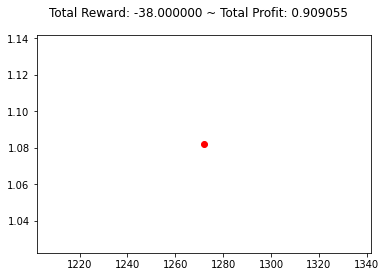

{'total_reward': -36.000000000013806, 'total_profit': 0.9089705210296426, 'position': 1}


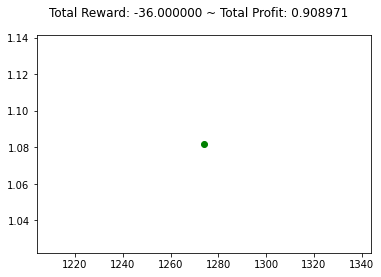

{'total_reward': -37.0000000000137, 'total_profit': 0.9089705210296426, 'position': 0}


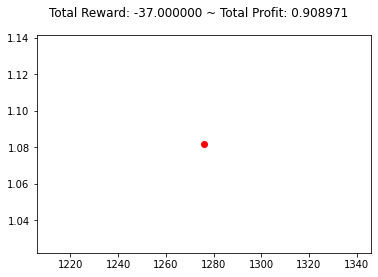

{'total_reward': -38.000000000013586, 'total_profit': 0.9086344254404285, 'position': 0}


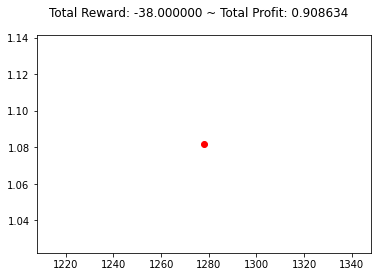

{'total_reward': -41.00000000001326, 'total_profit': 0.9082145389222028, 'position': 0}


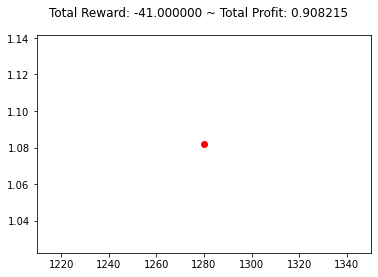

{'total_reward': -41.00000000001326, 'total_profit': 0.9082145389222028, 'position': 0}


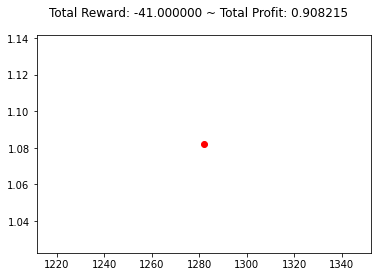

{'total_reward': -41.00000000001326, 'total_profit': 0.9082145389222028, 'position': 0}


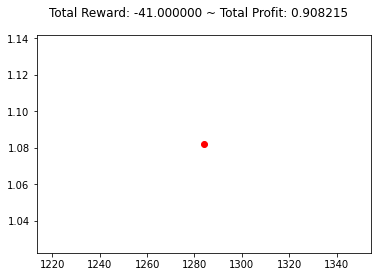

{'total_reward': -43.00000000001304, 'total_profit': 0.9077948852215643, 'position': 0}


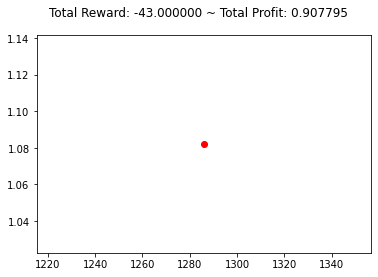

{'total_reward': -43.00000000001304, 'total_profit': 0.9075432093454285, 'position': 0}


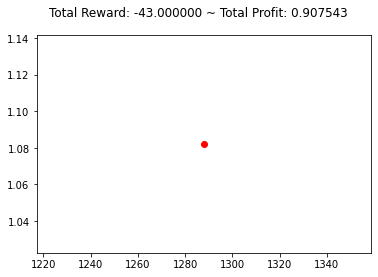

{'total_reward': -44.00000000001293, 'total_profit': 0.9072916032435863, 'position': 0}


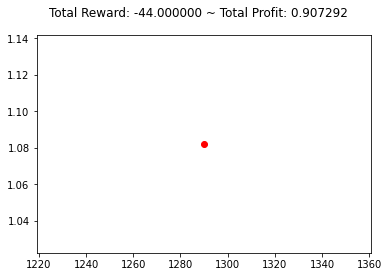

{'total_reward': -44.00000000001293, 'total_profit': 0.9072916032435863, 'position': 0}


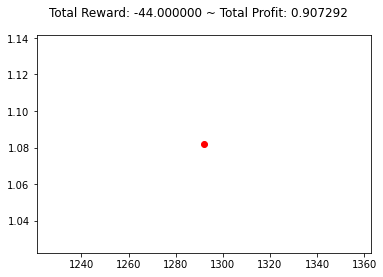

{'total_reward': -43.000000000013046, 'total_profit': 0.9071238813463234, 'position': 1}


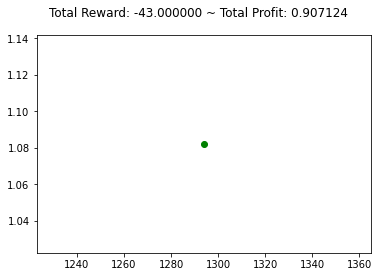

{'total_reward': -42.00000000001316, 'total_profit': 0.9071238813463234, 'position': 0}


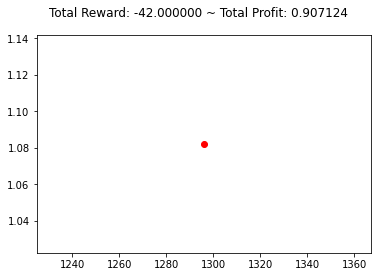

{'total_reward': -42.00000000001316, 'total_profit': 0.9071238813463234, 'position': 0}


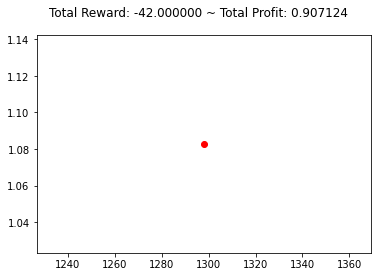

{'total_reward': -48.00000000001249, 'total_profit': 0.9064534895633423, 'position': 0}


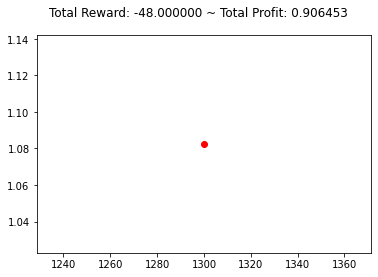

{'total_reward': -48.00000000001249, 'total_profit': 0.9064534895633423, 'position': 0}


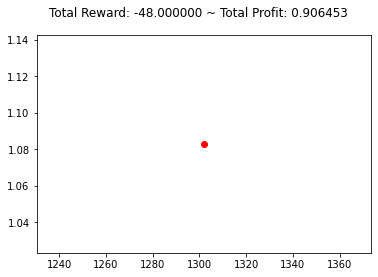

{'total_reward': -51.000000000012164, 'total_profit': 0.9059511601149836, 'position': 1}


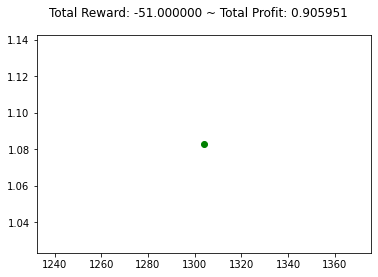

{'total_reward': -51.000000000012164, 'total_profit': 0.9059511601149836, 'position': 1}


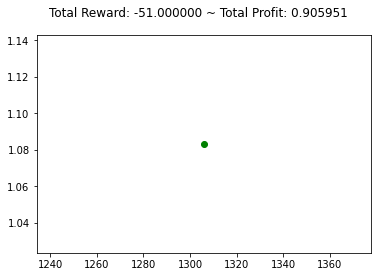

{'total_reward': -50.00000000001228, 'total_profit': 0.9059511601149836, 'position': 0}


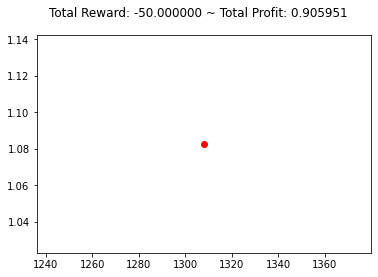

{'total_reward': -49.00000000001239, 'total_profit': 0.9057838097575226, 'position': 1}


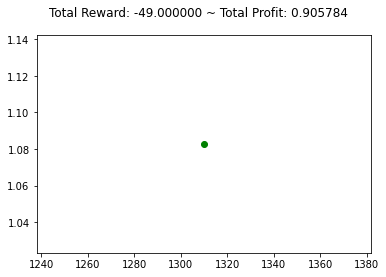

{'total_reward': -49.00000000001239, 'total_profit': 0.9057838097575226, 'position': 0}


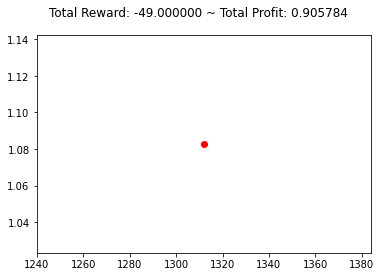

{'total_reward': -49.00000000001239, 'total_profit': 0.9055328305916158, 'position': 1}


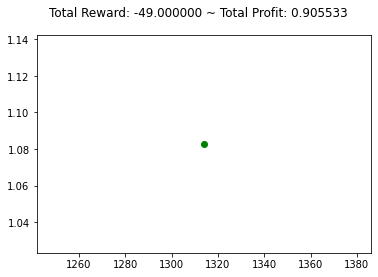

{'total_reward': -49.00000000001239, 'total_profit': 0.9055328305916158, 'position': 1}


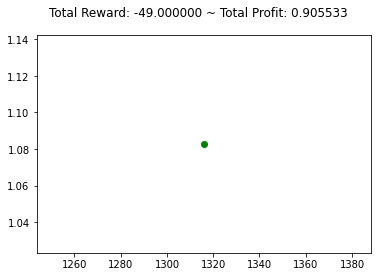

{'total_reward': -49.00000000001239, 'total_profit': 0.9055328305916158, 'position': 0}


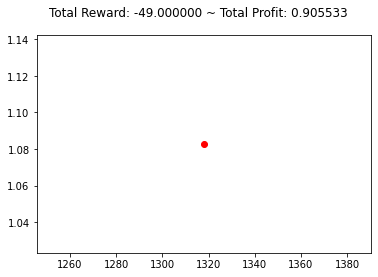

{'total_reward': -49.00000000001239, 'total_profit': 0.9052819209682875, 'position': 1}


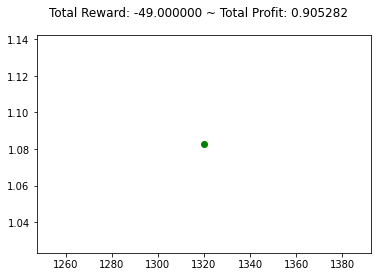

{'total_reward': -49.00000000001239, 'total_profit': 0.9050310808682687, 'position': 1}


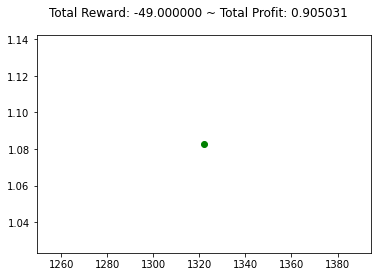

{'total_reward': -49.00000000001239, 'total_profit': 0.9050310808682687, 'position': 0}


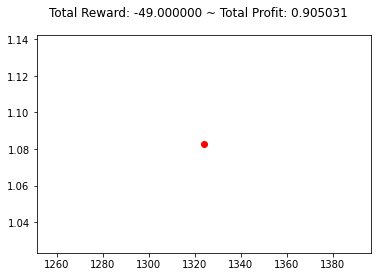

{'total_reward': -49.00000000001239, 'total_profit': 0.9047803102722952, 'position': 0}


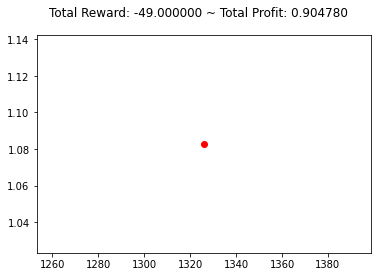

{'total_reward': -49.00000000001239, 'total_profit': 0.9045296091611087, 'position': 1}


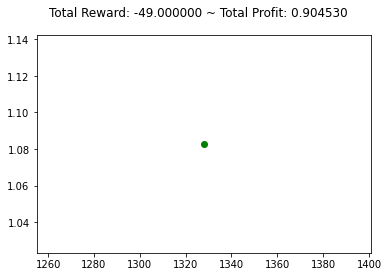

{'total_reward': -49.00000000001239, 'total_profit': 0.9045296091611087, 'position': 1}


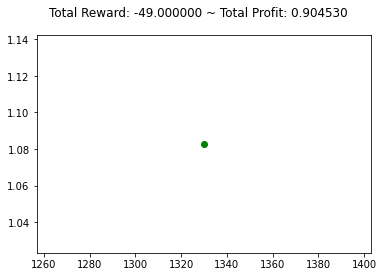

{'total_reward': -49.00000000001239, 'total_profit': 0.9045296091611087, 'position': 0}


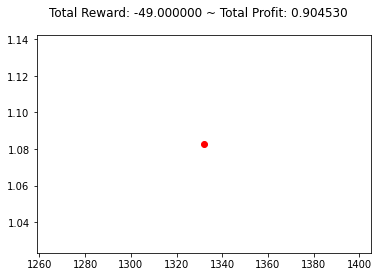

{'total_reward': -49.00000000001239, 'total_profit': 0.9042789775154558, 'position': 1}


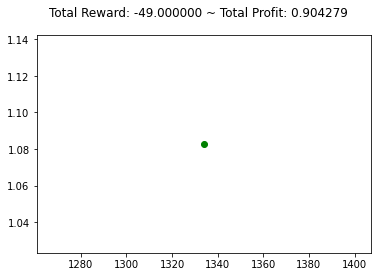

{'total_reward': -49.00000000001239, 'total_profit': 0.9040284153160888, 'position': 1}


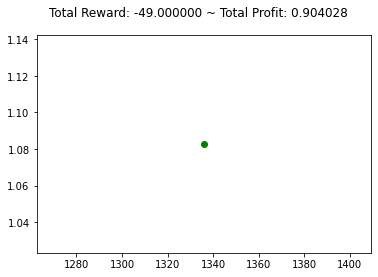

{'total_reward': -49.00000000001239, 'total_profit': 0.9040284153160888, 'position': 0}


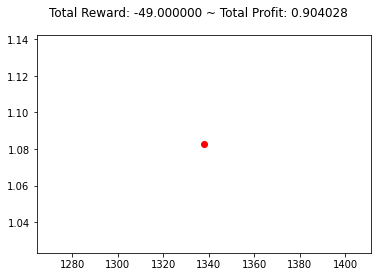

{'total_reward': -49.00000000001239, 'total_profit': 0.9037779225437652, 'position': 0}


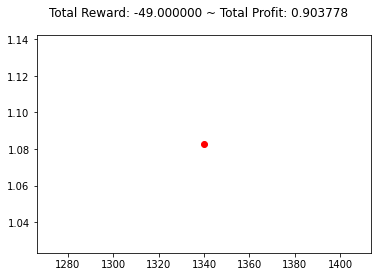

{'total_reward': -49.00000000001239, 'total_profit': 0.9035274991792478, 'position': 1}


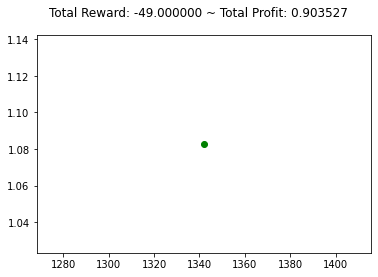

{'total_reward': -49.00000000001239, 'total_profit': 0.9032771452033046, 'position': 1}


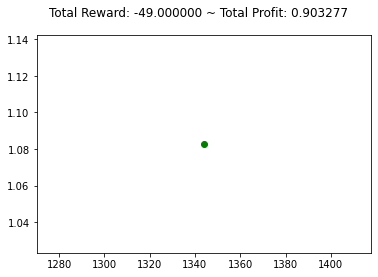

{'total_reward': -49.00000000001239, 'total_profit': 0.9032771452033046, 'position': 0}


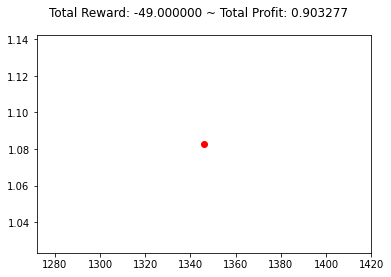

{'total_reward': -49.00000000001239, 'total_profit': 0.9030268605967091, 'position': 0}


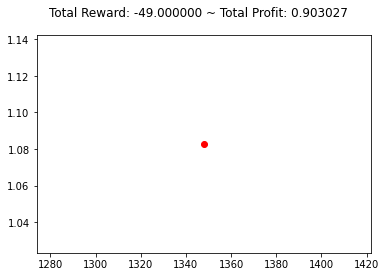

{'total_reward': -49.00000000001239, 'total_profit': 0.9030268605967091, 'position': 0}


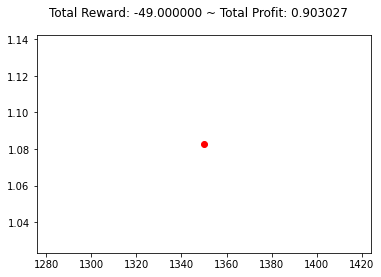

{'total_reward': -49.00000000001239, 'total_profit': 0.9027766453402402, 'position': 0}


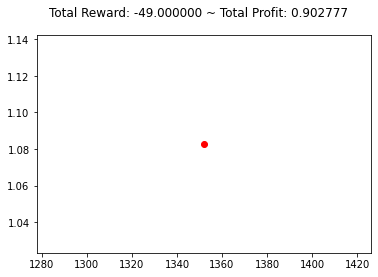

{'total_reward': -49.00000000001239, 'total_profit': 0.9025264994146818, 'position': 1}


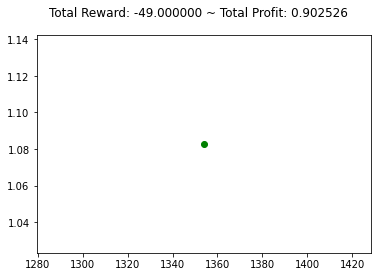

{'total_reward': -49.00000000001239, 'total_profit': 0.9022764228008234, 'position': 1}


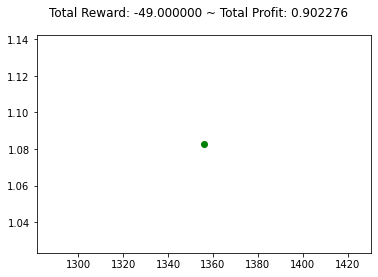

{'total_reward': -49.00000000001239, 'total_profit': 0.9022764228008234, 'position': 0}


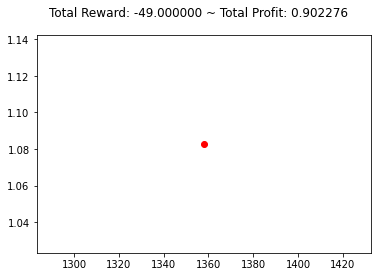

{'total_reward': -49.00000000001239, 'total_profit': 0.90202641547946, 'position': 0}


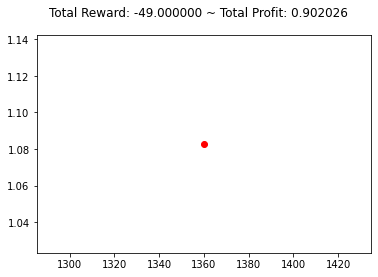

{'total_reward': -49.00000000001239, 'total_profit': 0.9017764774313916, 'position': 0}


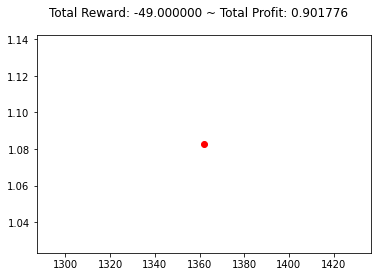

{'total_reward': -49.00000000001239, 'total_profit': 0.9015266086374233, 'position': 1}


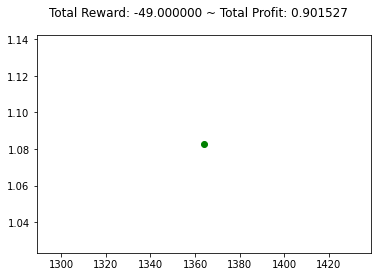

{'total_reward': -49.00000000001239, 'total_profit': 0.9015266086374233, 'position': 0}


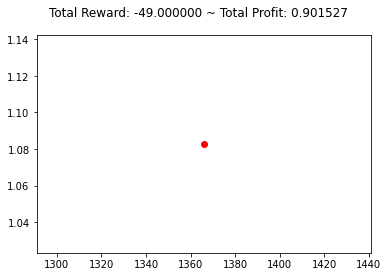

{'total_reward': -49.00000000001239, 'total_profit': 0.9015266086374233, 'position': 0}


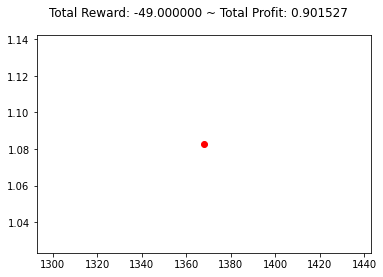

{'total_reward': -49.00000000001239, 'total_profit': 0.9012768090783662, 'position': 0}


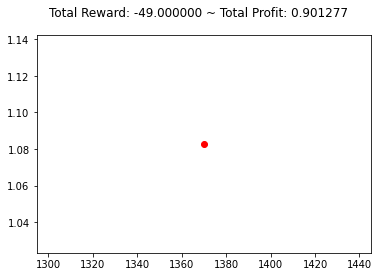

{'total_reward': -49.00000000001239, 'total_profit': 0.9012768090783662, 'position': 0}


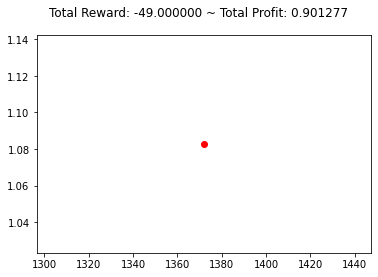

{'total_reward': -49.00000000001239, 'total_profit': 0.9012768090783662, 'position': 0}


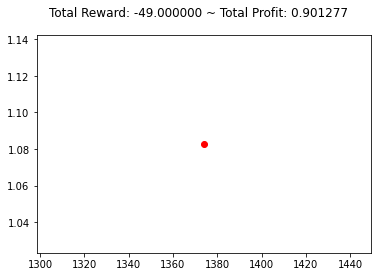

{'total_reward': -49.00000000001239, 'total_profit': 0.9010270787350361, 'position': 0}


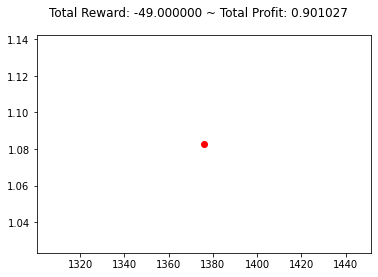

{'total_reward': -49.00000000001239, 'total_profit': 0.9007774175882545, 'position': 0}


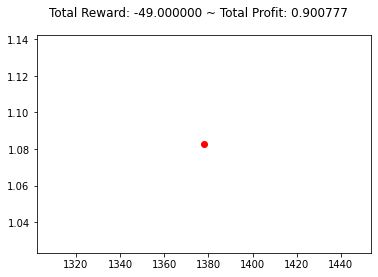

{'total_reward': -49.00000000001239, 'total_profit': 0.9005278256188479, 'position': 0}


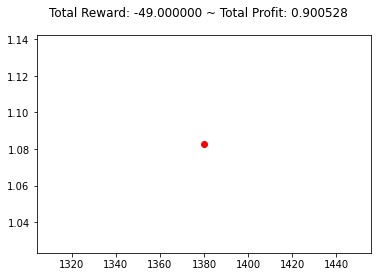

{'total_reward': -49.00000000001239, 'total_profit': 0.9002783028076485, 'position': 1}


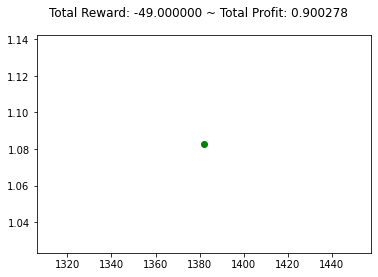

{'total_reward': -49.00000000001239, 'total_profit': 0.9002783028076485, 'position': 0}


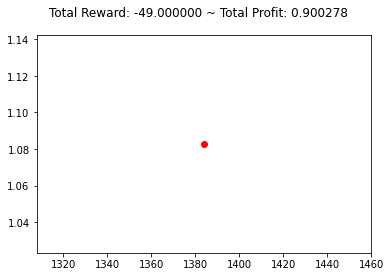

{'total_reward': -49.00000000001239, 'total_profit': 0.9000288491354935, 'position': 1}


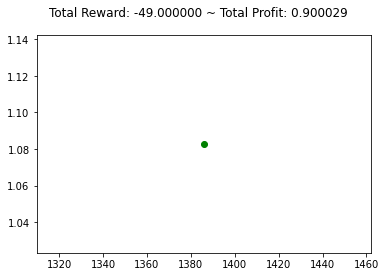

{'total_reward': -49.00000000001239, 'total_profit': 0.8997794645832256, 'position': 1}


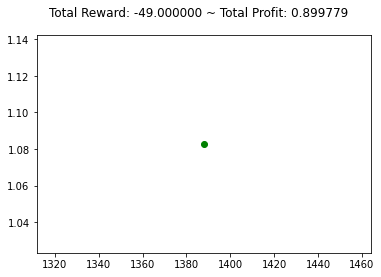

{'total_reward': -49.00000000001239, 'total_profit': 0.8997794645832256, 'position': 1}


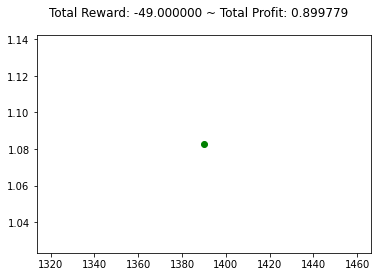

{'total_reward': -49.00000000001239, 'total_profit': 0.8997794645832256, 'position': 0}


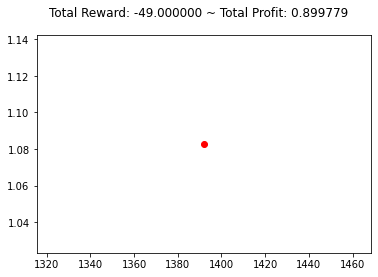

{'total_reward': -49.00000000001239, 'total_profit': 0.8995301491316924, 'position': 1}


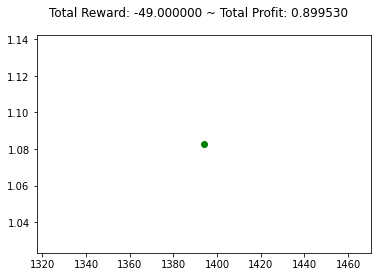

{'total_reward': -49.00000000001239, 'total_profit': 0.8995301491316924, 'position': 0}


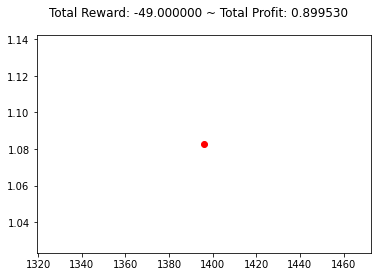

{'total_reward': -49.00000000001239, 'total_profit': 0.8992809027617473, 'position': 0}


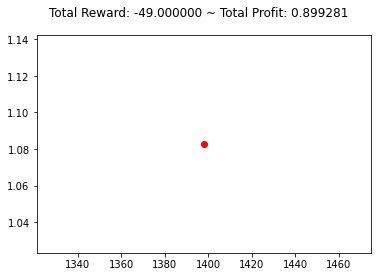

{'total_reward': -49.00000000001239, 'total_profit': 0.8992809027617473, 'position': 0}


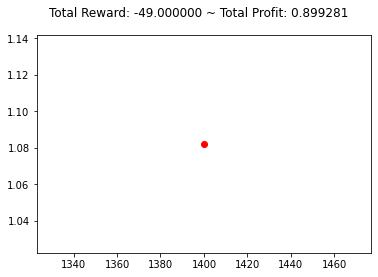

{'total_reward': -41.00000000001327, 'total_profit': 0.8996965053603062, 'position': 1}


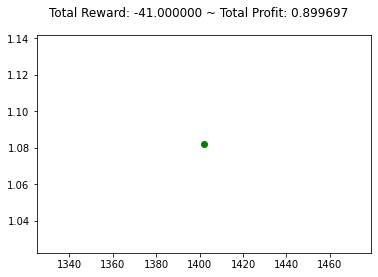

{'total_reward': -40.00000000001339, 'total_profit': 0.8996965053603062, 'position': 0}


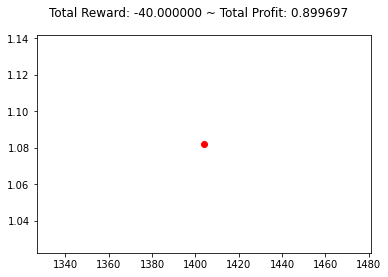

{'total_reward': -40.00000000001339, 'total_profit': 0.8994470516157516, 'position': 1}


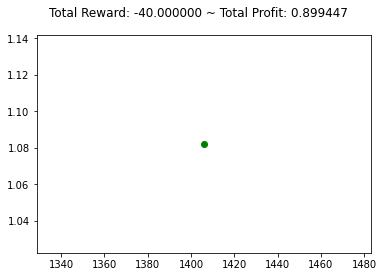

{'total_reward': -40.00000000001339, 'total_profit': 0.8994470516157516, 'position': 1}


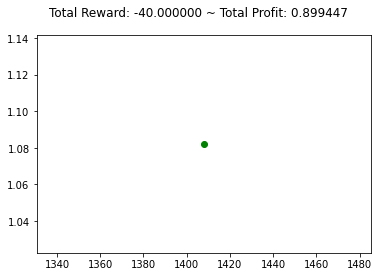

{'total_reward': -37.00000000001371, 'total_profit': 0.8994470516157516, 'position': 0}


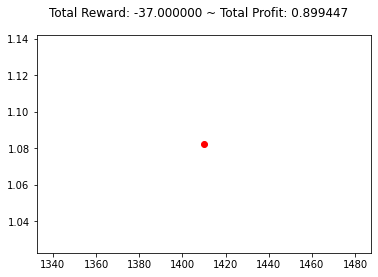

{'total_reward': -38.0000000000136, 'total_profit': 0.8991146617223238, 'position': 1}


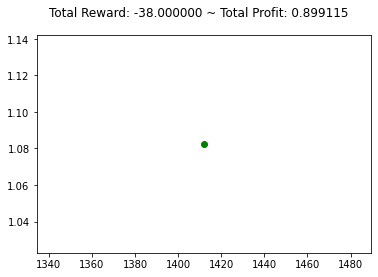

{'total_reward': -35.00000000001393, 'total_profit': 0.8991146617223238, 'position': 1}


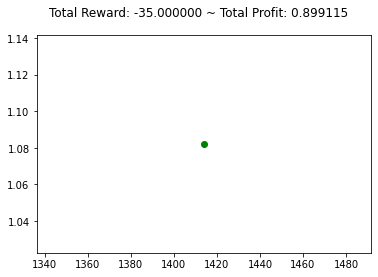

{'total_reward': -35.00000000001393, 'total_profit': 0.8991146617223238, 'position': 0}


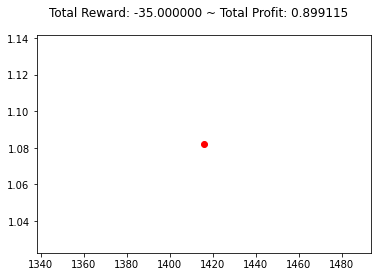

{'total_reward': -35.00000000001393, 'total_profit': 0.8988653923400887, 'position': 0}


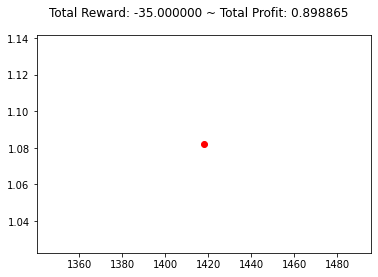

{'total_reward': -35.00000000001393, 'total_profit': 0.8988653923400887, 'position': 0}


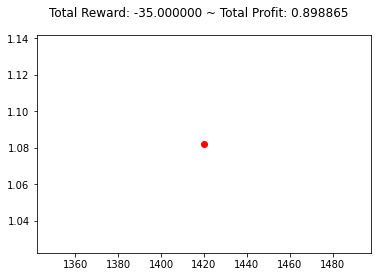

{'total_reward': -35.00000000001393, 'total_profit': 0.8988653923400887, 'position': 0}


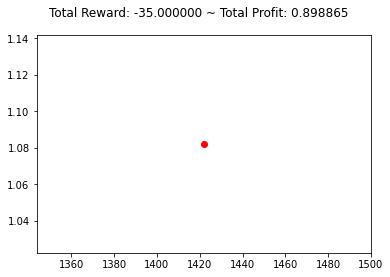

{'total_reward': -34.00000000001404, 'total_profit': 0.8986992434690462, 'position': 1}


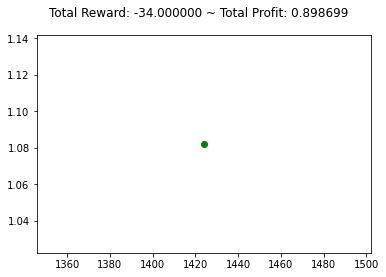

{'total_reward': -34.00000000001404, 'total_profit': 0.8986992434690462, 'position': 0}


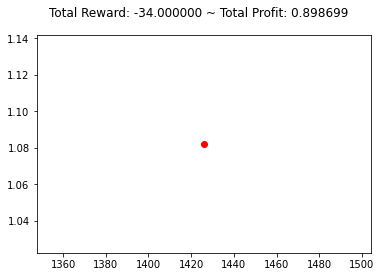

{'total_reward': -33.000000000014154, 'total_profit': 0.8984500662296371, 'position': 0}


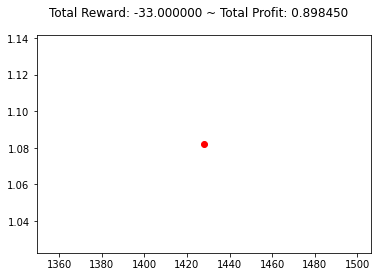

{'total_reward': -33.000000000014154, 'total_profit': 0.8984500662296371, 'position': 0}


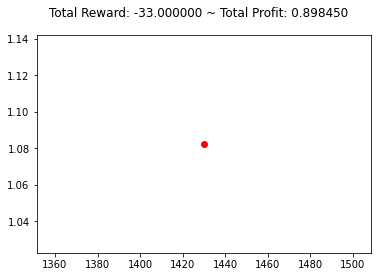

{'total_reward': -33.000000000014154, 'total_profit': 0.8982009810989939, 'position': 0}


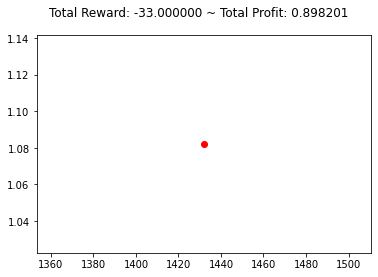

{'total_reward': -32.00000000001427, 'total_profit': 0.898034955039641, 'position': 1}


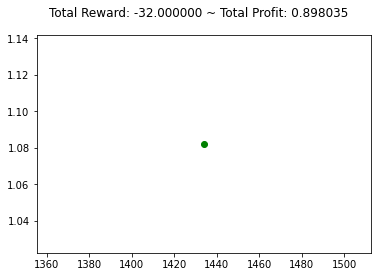

{'total_reward': -32.00000000001427, 'total_profit': 0.898034955039641, 'position': 0}


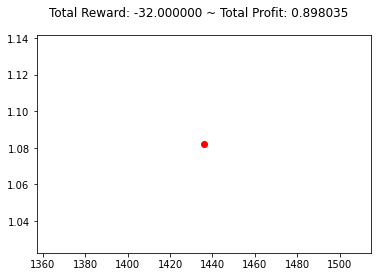

{'total_reward': -33.000000000014154, 'total_profit': 0.8977029949786339, 'position': 1}


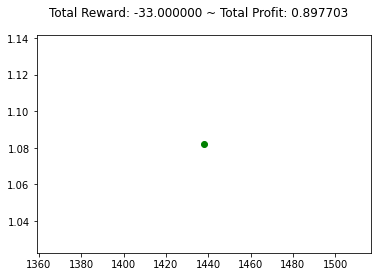

{'total_reward': -33.000000000014154, 'total_profit': 0.8977029949786339, 'position': 1}


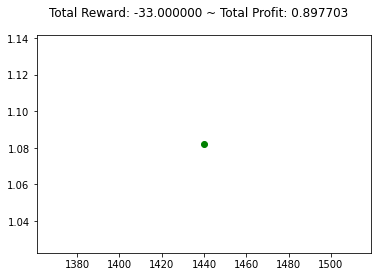

{'total_reward': -31.000000000014374, 'total_profit': 0.8977029949786339, 'position': 0}


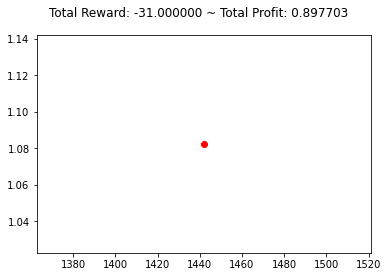

{'total_reward': -29.000000000014595, 'total_profit': 0.8976200356407744, 'position': 1}


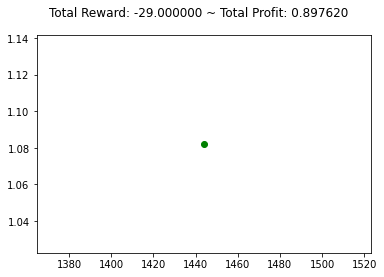

{'total_reward': -30.000000000014484, 'total_profit': 0.8976200356407744, 'position': 0}


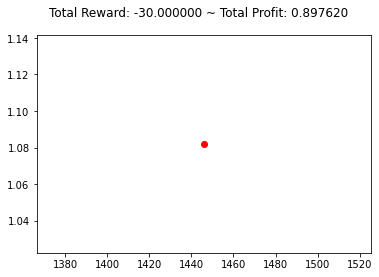

{'total_reward': -29.000000000014595, 'total_profit': 0.8974541016291946, 'position': 0}


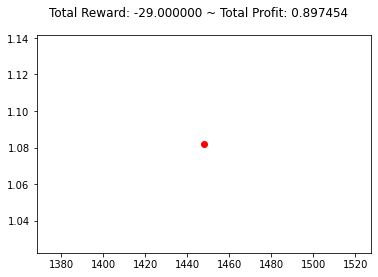

{'total_reward': -29.000000000014595, 'total_profit': 0.8971223256211986, 'position': 0}


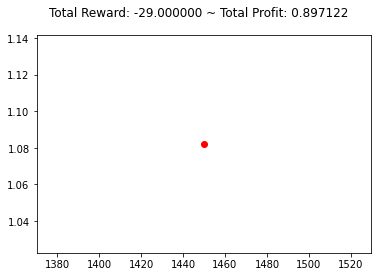

{'total_reward': -29.000000000014595, 'total_profit': 0.8968736085916391, 'position': 1}


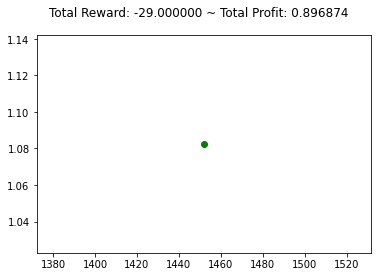

{'total_reward': -26.000000000014925, 'total_profit': 0.8968736085916391, 'position': 0}


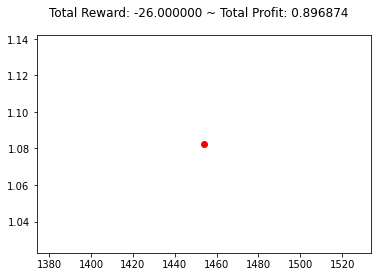

{'total_reward': -27.000000000014815, 'total_profit': 0.89662502943183, 'position': 0}


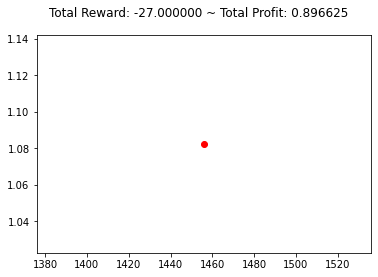

{'total_reward': -27.000000000014815, 'total_profit': 0.89662502943183, 'position': 0}


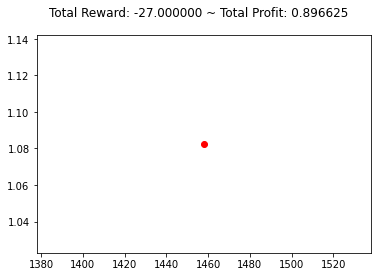

{'total_reward': -29.000000000014595, 'total_profit': 0.8962108839216999, 'position': 1}


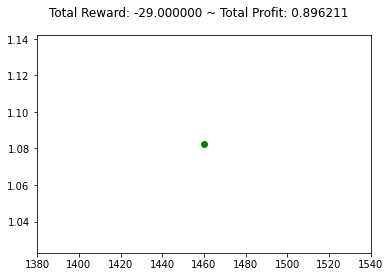

{'total_reward': -30.000000000014484, 'total_profit': 0.8962108839216999, 'position': 0}


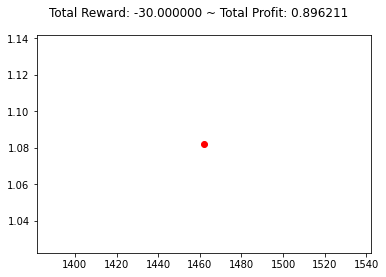

{'total_reward': -24.000000000015145, 'total_profit': 0.8964594171673798, 'position': 1}


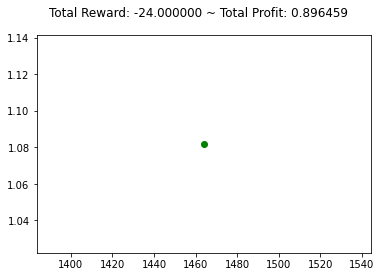

{'total_reward': -22.000000000015365, 'total_profit': 0.8964594171673798, 'position': 0}


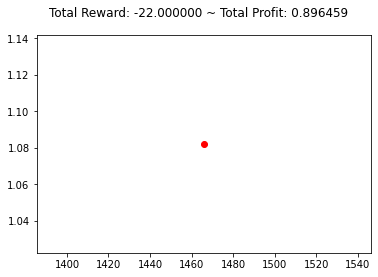

{'total_reward': -22.000000000015365, 'total_profit': 0.8962108609518991, 'position': 1}


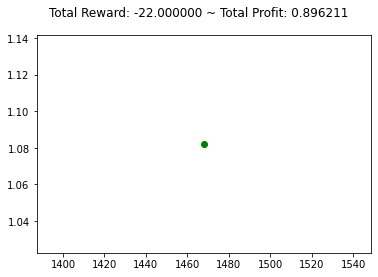

{'total_reward': -23.000000000015255, 'total_profit': 0.8962108609518991, 'position': 0}


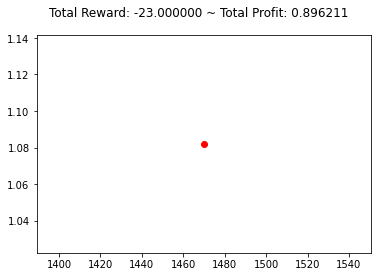

{'total_reward': -24.000000000015145, 'total_profit': 0.8959623506845125, 'position': 0}


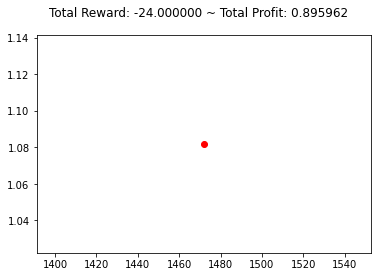

{'total_reward': -23.000000000015255, 'total_profit': 0.8957966924889529, 'position': 1}


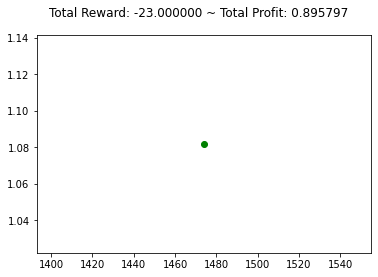

{'total_reward': -23.000000000015255, 'total_profit': 0.8955482511394598, 'position': 1}


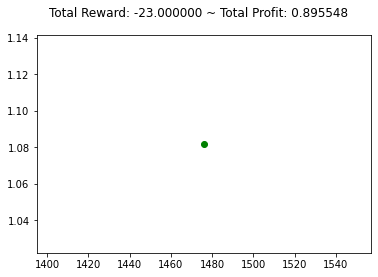

{'total_reward': -23.000000000015255, 'total_profit': 0.8952998786929943, 'position': 1}


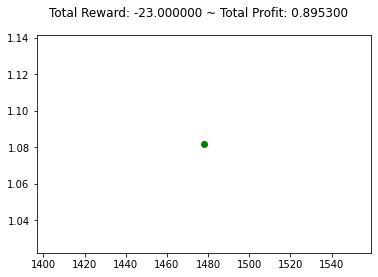

{'total_reward': -23.000000000015255, 'total_profit': 0.8950515751304466, 'position': 1}


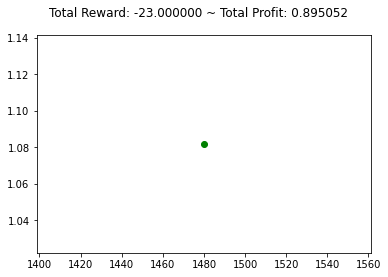

{'total_reward': -22.000000000015365, 'total_profit': 0.8948033633791626, 'position': 1}


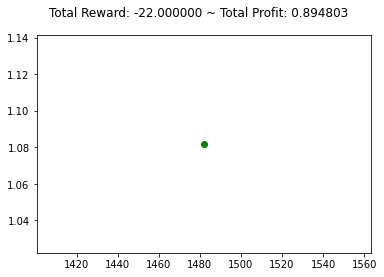

{'total_reward': -23.000000000015255, 'total_profit': 0.8948033633791626, 'position': 0}


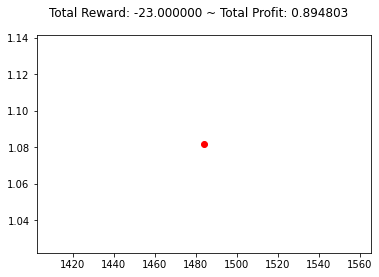

{'total_reward': -22.000000000015365, 'total_profit': 0.8945551975207787, 'position': 0}


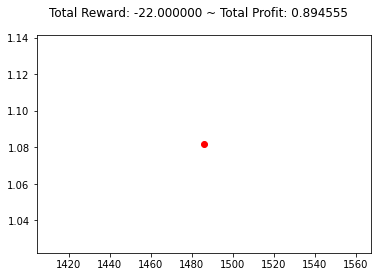

{'total_reward': -22.000000000015365, 'total_profit': 0.894307123422742, 'position': 1}


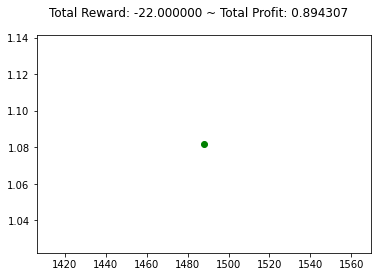

{'total_reward': -21.000000000015476, 'total_profit': 0.8941417712690168, 'position': 1}


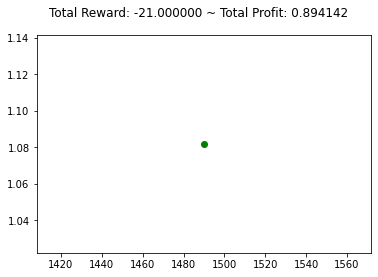

{'total_reward': -23.000000000017476, 'total_profit': 0.8941417712690168, 'position': 0}


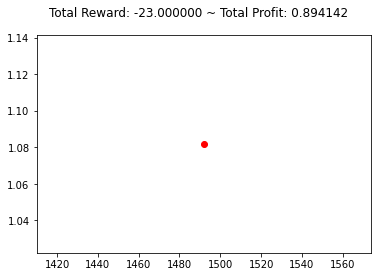

{'total_reward': -25.000000000019476, 'total_profit': 0.8937284673163177, 'position': 0}


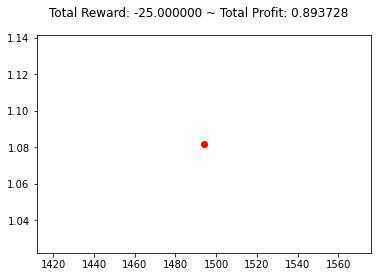

KeyboardInterrupt: 

In [6]:
start_window = 1
end_window = 1000

window_size = 2
results_dict = dict()


env = gym.make('forex-v0',
             df = df,
             window_size = window_size,
             frame_bound = (window_size, df.shape[0]),
             unit_side = 'left'
            )

observation = env.reset()
t = 0
while True:
    t += 1
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(info)
    if done:
        print("Finished after {} timesteps".format(t+1))
        break

In [ ]:
results_dict

In [ ]:
def test_returns(num_tests=10, window_min=1, window_max=1000):
    max_profits_dict = dict()
    profits_dict = dict()
    for x in range(0,num_tests):
        for y in range(window_min, window_max):
            env = gym.make('forex-v0',
                     df = df,
                     window_size = y,
                     frame_bound = (y, df.shape[0]),
                     unit_side = 'left'
                    )
            observation = env.reset()
            i = 0
            while True:
                action = env.action_space.sample()
                observation, reward, done, info = env.step(action)
        #         if i % window_size == 0:
        #             print("info {}:".format(i), info)
                i += 1
                if done:
        #             print("final info:", info)
                    break
                profits_dict[y] = info['total_profit']
        max_profits_dict[max(profits_dict, key=profits_dict.get)] = profits_dict[max(profits_dict, key=profits_dict.get)]
        print("test:{}: best window val: {}, profit: {}".format(x, max(profits_dict, key=profits_dict.get), profits_dict[max(profits_dict, key=profits_dict.get)]))
    return max_profits_dict, info

In [43]:
test = test_returns(1,1,100)


test:0: best window val: 88, profit: 0.5631561560930929


AssertionError: 

In [44]:
test

({88: 0.5631561560930929},
 {'total_reward': 60.99999999995566,
  'total_profit': 0.5533511743111873,
  'position': 1})

In [26]:
info

NameError: name 'info' is not defined

In [27]:
for x in range(1,10):
    print(env.action_space.sample())

0
0
0
0
1
0
1
1
1
